### Setup packages 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=1163a108bf4509736ad69bc6934f3873a155a6951b514d448cc2d01720fbfc92
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 148 µs (started: 2022-06-15 13:04:47 +00:00)


In [3]:
from plotnine import *
from plotnine.themes import *

time: 1.81 s (started: 2022-06-15 13:04:47 +00:00)


In [4]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp

time: 2.68 s (started: 2022-06-15 13:04:49 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [5]:
paper_name = "dgm_hjb"

time: 857 µs (started: 2022-06-15 13:04:51 +00:00)


In [6]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 622 ms (started: 2022-06-15 13:04:51 +00:00)


In [7]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 8.09 ms (started: 2022-06-15 13:04:52 +00:00)


In [8]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb


time: 2.96 s (started: 2022-06-15 13:04:52 +00:00)


In [9]:
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint as pp

time: 2.04 s (started: 2022-06-15 13:04:55 +00:00)


### Shared functions across models

In [10]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 23.6 ms (started: 2022-06-15 13:04:57 +00:00)


In [11]:
# plot_report(train)
# plot_activation_mean(train)

time: 646 µs (started: 2022-06-15 13:04:57 +00:00)


In [12]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()

time: 1.33 ms (started: 2022-06-15 13:04:57 +00:00)


In [13]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 42 ms (started: 2022-06-15 13:04:57 +00:00)


In [14]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 86.7 ms (started: 2022-06-15 13:04:57 +00:00)


In [15]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 8.05 ms (started: 2022-06-15 13:04:57 +00:00)


In [16]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 10.9 ms (started: 2022-06-15 13:04:57 +00:00)


In [17]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 2.02 ms (started: 2022-06-15 13:04:57 +00:00)


In [18]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 1.86 ms (started: 2022-06-15 13:04:57 +00:00)


In [19]:
def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        wgamma = getattr(eqObject,"wgamma")
        wgamma_str = str(wgamma).replace('.','p')
        model_id_str = model_id_str + f"_wgamma{wgamma_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 34.1 ms (started: 2022-06-15 13:04:57 +00:00)


In [20]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        wgamma = getattr(eqObject,"wgamma")
        wgamma_str = str(wgamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{wgamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 33.3 ms (started: 2022-06-15 13:04:57 +00:00)


### Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

##### Closed form terminal utility functions

In [21]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1):
  return(-1*torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1):
  return(-np.exp(-gamma_discount*x))

from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))

time: 2.58 ms (started: 2022-06-15 13:04:57 +00:00)


#### MertonUtilityNet

In [22]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5 + 1  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act(self.fc_input(x))
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 12.7 ms (started: 2022-06-15 13:04:57 +00:00)


#### MertonPiNet

In [28]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out 
        

time: 17.6 ms (started: 2022-06-15 13:07:39 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [29]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)
        # return torch.pow(self.final_layer(s), 1)


time: 88.6 ms (started: 2022-06-15 13:07:40 +00:00)


#### MertonMatchPiNet

[Matching Paper by hand](https://arxiv.org/abs/1912.01455v3)

In [30]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 27.1 ms (started: 2022-06-15 13:07:41 +00:00)


#### PiEquation

In [31]:
class PiEquation():

    def __init__(self , pi_net, du_dx, d2u_dx2):
        self.pi_net = pi_net
        self.wgamma = 0.0001
        self.du_dx = Variable(du_dx, requires_grad=False)
        self.d2u_dx2 = Variable(d2u_dx2, requires_grad=False)

    def criterion(self, x_internal, grads):
      #  time, wealth, mu, r, sigma
      du_dx = Variable(grads[1], requires_grad=False)   # the derivatives with respect to u are held constant when finding pi 
      d2u_dx2 = Variable(grads[2], requires_grad=False) # du_dt is grads[0], not relevant here

      pi_net_preds = self.pi_net(x_internal)
      pi_net_preds = pi_net_preds.reshape(-1,1)
      
      x_internal_const = Variable(x_internal.clone(), requires_grad=False)
      
      intC = None
      # pdb.set_trace()
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        # pdb.set_trace()
        
        # pi * (mu-r)
        loss_1 = pi_net_preds*(x_internal_const[:,2].reshape(-1,1) - x_internal_const[:,3].reshape(-1,1))
        
        # r * wealth
        loss_2 = x_internal_const[:,3].reshape(-1,1)*x_internal_const[:,1].reshape(-1,1)
        
        # sigma^2 * pi^2
        loss_3 = (x_internal_const[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
        
        intC_loss = -(loss_1 +loss_2)*du_dx - 0.5*loss_3*d2u_dx2

        # # r*x
        # loss_1 = x_internal_const[:,3].reshape(-1,1) * x_internal_const[:,1].reshape(-1,1)

        # # (mu - r)^2/sigma^2
        # loss_2 = ((x_internal_const[:,2].reshape(-1,1) - x_internal_const[:,3].reshape(-1,1))**2) / (x_internal_const[:,4].reshape(-1,1)**2)

      return  1.0*intC_loss

    def calculatePiLoss(self, x_internal, grads, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal, grads)
        
        return_losses = []
        
        if not keep_batch:
          loss_pi = torch.mean(Ls)           
          return loss_pi          
        else:
          return Ls


time: 33.6 ms (started: 2022-06-15 13:07:42 +00:00)


#### TrainInternalPiWithDGM


In [32]:
class TrainInternalPiWithDGM():
    
    def __init__(self , u_equation, pi_equation, pi_equation_traget, BATCH_SIZE , epoch, lr, debug = False, loss_multiply = 1.0):
        self.BATCH_SIZE = BATCH_SIZE
        self.u_model = u_equation        
        
        self.pi_model = pi_equation
        self.pi_model_traget = pi_equation_traget
        
        self.debug = debug  
        self.hook_interval = 20      
        
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.pi_model.pi_net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        

        self.epoch = epoch
        self.lr = lr

        self.loss_multiply = loss_multiply

    def get_utility_function_derivatives(self, u_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( u_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(u_net_val),
                                  create_graph=True,
                                  retain_graph=True)
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(du_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dx),
                                      retain_graph=True
                                      )[0][:,1].reshape(-1,1)

        d2u_dx2 = torch.sign(d2u_dx2) * torch.maximum(torch.abs(d2u_dx2), 1e-6*torch.ones_like(d2u_dx2))

        return du_dt, du_dx, d2u_dx2 # + 1e-7
        
    def train(self , eqLossFn = 'calculatePiLoss', sample_method_X = "U"):
        
        if self.validation_sample is not None:
          self.validation_losses = np.ones((self.epoch, 3 ), dtype='float32') * np.nan
        
        self.train_losses = np.ones((self.epoch, 1 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        
        try:
            loss_calc_method = getattr(self.pi_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.pi_model.__class__.__name__, eqLossFn))
        
        for e in range(self.epoch):
            sample_batch = self.u_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            loss_avg = 0.0
            # pdb.set_trace()
            x_internal = Variable(sample_batch[0], requires_grad=True)
            x_terminal = Variable(sample_batch[1], requires_grad=True)
            
            utility_net_val = self.u_model.u_net(x_internal)
            du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(utility_net_val, x_internal)

            utility_net_val_terminal = self.u_model.u_net(x_terminal)
            du_dt_terminal, du_dx_terminal, d2u_dx2_terminal = self.get_utility_function_derivatives(utility_net_val_terminal, x_terminal)

            du_dt = (du_dt + du_dt_terminal)/2.0
            du_dx = (du_dx + du_dx_terminal)/2.0
            d2u_dx2 = (d2u_dx2 + d2u_dx2_terminal)/2.0

            loss  = loss_calc_method(x_internal, [du_dt, du_dx, d2u_dx2], keep_batch = False )            
            # print(f"Pi Net Epoch {e} Loss {round(loss.item(),5)}")

            self.train_losses[e,:] = [ to_cpu_detach(loss) ]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                     loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=0.5) ], 
                                                                                                     keep_batch = False )
              validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                      *to_cpu_detach(losses_ABS_validation),
                                      *to_cpu_detach(losses_Huber_valiation)]
              self.validation_losses[e,:] = validation_loss_list
            
            if self.use_early_stop:
              loss_to_check = loss
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                # print(f"Pi Early Stop at epoch {e}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            optimizer.zero_grad()
            loss_avg = loss_avg + float(loss.item())

            # print('self.epoch:', e)
            loss.backward()
            # for param in self.pi_model.pi_net.parameters():
            #   print('pi grad', param.grad)
            optimizer.step()
            
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                # print("Pi Epoch {} - lr {} -  key loss: {}".format(e , self.lr , loss))

        self.stop_epoch = e
        self.pi_model_traget.pi_net.load_state_dict(self.pi_model.pi_net.state_dict())

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)


time: 156 ms (started: 2022-06-15 13:07:45 +00:00)


#### MertonEquation

In [33]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_target, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth, gamma_discount=1)):

        self.u_net = u_net
        self.pi_net = pi_net
        self.pi_net_target = pi_net_target

        self.wgamma = 0.0001
        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 1.0

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        self.loss_multiply = 1.0

        self.FORCE_MU = None
        self.FORCE_R = None
        self.FORCE_SIGMA = None

        self.epoch_of_u = None
        self.adapt_pi_epochs = False
        self.start_adapt_epochs = [ [500, 1000, 2000, 5000 ], [4, 8, 10 ,20] ]
        self.was_loss_beaten = False

        self.pi_net.train()

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size, range_multiplier = 1.0):
      mu_candidate = -self.MAX_MU*range_multiplier*torch.rand([size, 1])+self.MAX_MU*range_multiplier
      r_candidate = -self.MAX_MU*range_multiplier*torch.rand([size, 1])+self.MAX_MU*range_multiplier
      return (mu_candidate, r_candidate)

      # r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      # mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      # return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size, range_multiplier)
            sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([size, 1])+self.MAX_SIGMA*range_multiplier
            mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( torch.rand([size,1])*self.T , # Time
                                                   -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier, # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size, range_multiplier)
            sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([size, 1])+self.MAX_SIGMA*range_multiplier
            mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1) + self.T , # Time
                                                   -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier, # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      internal_strata_xts = []
      terminal_strata_xts = []
      
      if sample_method_X in ["U"]:
          range_multiplier = 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]

          total_strat_processed = 0

          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):
              
            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)

              range_multiplier = 1.0

              ### internal samples of Time, Wealth, Mu, R, Sigma
              internal_stratum_t_sample = tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])
              internal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_internal, stratum_r_sample_internal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal)
              x_internal_stratum = self.to_device(torch.cat(( internal_stratum_t_sample , # Time
                                                              internal_stratum_x_sample, # Wealth
                                                              stratum_mu_sample_internal, # mu
                                                              stratum_r_sample_internal, # R
                                                               # Sigma
                                                            ) , dim = 1 ),to_cpu)
              if not internal_strata_xts: 
                internal_strata_xts = [ x_internal_stratum ] 
              else:
                internal_strata_xts.append(x_internal_stratum) 

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_terminal, stratum_r_sample_terminal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal)
              x_terminal_stratum = self.to_device(torch.cat(( torch.zeros(num_samples_in_stratum, 1) + self.T , # Time
                                                      terminal_stratum_x_sample, # Wealth
                                                      stratum_mu_sample_terminal, # mu
                                                      stratum_r_sample_terminal, # R
                                                      stratum_sigma_sample_terminal # Sigma
                                                    ) , dim = 1 ),to_cpu)
              if not terminal_strata_xts:
                terminal_strata_xts = [ x_terminal_stratum ] # terminal_stratum_xt[None,:,:]
              else:
                terminal_strata_xts.append(x_terminal_stratum) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

              total_strat_processed += 1 
              # print((len(internal_strata_xts),xbreaks_used[stratum_x_count],tbreaks_used[stratum_t_count]))

          # pdb.set_trace()
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def get_num_pi_epochs(self):
      if self.adapt_pi_epochs and self.was_loss_beaten:
        if any([ i < self.epoch_of_u for i in self.start_adapt_epochs[0] ]):
          return self.pi_net_epoch * self.start_adapt_epochs[1][[i for i in range(len(self.start_adapt_epochs[0])) if self.start_adapt_epochs[0][i] < self.epoch_of_u][-1]] 
      return self.pi_net_epoch

    def get_utility_function_derivatives(self, u_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( u_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(u_net_val),
                                  create_graph=True,
                                  retain_graph=True)
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(du_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dx),
                                      retain_graph=True
                                      )[0][:,1].reshape(-1,1)
        
        d2u_dx2 = torch.sign(d2u_dx2) * torch.maximum(torch.abs(d2u_dx2), 1e-6*torch.ones_like(d2u_dx2))                                      

        return du_dt, du_dx, d2u_dx2 

    def criterion(self, x_internal, x_terminal, loss_transforms = [torch.square], util_network=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()
        x_internal_before = x_internal.clone()
        x_terminal_before = x_terminal.clone()

        # pi_used = self.pi_net_target(x_internal).detach().reshape(-1,1)
        # G(time, wealth, mu, r, sigma, pi)

        x_internal =  Variable(x_internal, requires_grad=True)
        x_terminal =  Variable(x_terminal, requires_grad=True)
        
        u_net_val = util_network(x_internal)
        u_net_val_terminal = util_network(x_terminal)
       
        du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(u_net_val, x_internal)
        du_dt_terminal, du_dx_terminal, d2u_dx2_terminal = self.get_utility_function_derivatives(u_net_val_terminal, x_terminal)
        
        du_dt = (du_dt + du_dt_terminal)/2.0
        du_dx = (du_dx + du_dx_terminal)/2.0
        d2u_dx2 = (d2u_dx2 + d2u_dx2_terminal)/2.0

        pi_model = PiEquation(self.pi_net, du_dx, d2u_dx2)
        pi_model_target = PiEquation(self.pi_net_target, None, None)                
        
        pi_trainer = TrainInternalPiWithDGM(self, pi_model, pi_model_target, 
                                            x_internal.shape[0], # batch size
                                            self.get_num_pi_epochs(), # number of epochs for Pi
                                            self.pi_net_lr, debug=True, loss_multiply=1.0)
        pi_trainer.use_early_stop = True
        pi_trainer.early_stop_patience = min(200,math.ceil(self.pi_net_epoch/10.0))
        pi_trainer.train()
        

        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          # pdb.set_trace()
          pi_net_preds = self.pi_net_target(x_internal_before)
          pi_net_preds = pi_net_preds.detach().reshape(-1,1)
          
          x_internal =  Variable(x_internal_before.clone(), requires_grad=True)
          
          u_net_val = util_network(x_internal)
          du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(u_net_val, x_internal)

          x_internal_const = x_internal.detach().clone()
          # x_internal_const = x_internal.clone()
          
          # pi*(mu-r)
          intC_loss_1 = pi_net_preds*(x_internal_const[:,2].reshape(-1,1)-x_internal_const[:,3].reshape(-1,1)) 
          
          # r * wealth
          intC_loss_2 =  x_internal_const[:,3].reshape(-1,1)*x_internal_const[:,1].reshape(-1,1)  
          
          # sigma^2 * pi^2
          intC_loss_3 = (x_internal_const[:,4].reshape(-1,1)**2)*(pi_net_preds**2)

          intC_loss = du_dt + (intC_loss_1 + intC_loss_2)*du_dx + 0.5*intC_loss_3*d2u_dx2

          # eps = 1e-3
          # intC_loss = torch.abs((intC_loss-eps)/eps)
          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 
        
        
        # print('mu:', x_internal[:,2].reshape(-1,1))
        # print('r:', x_internal[:,3].reshape(-1,1))
        # print('wealth:', x_internal[:,1].reshape(-1,1))
        # print('sigma^2', x_internal[:,4].reshape(-1,1)**2)
        # print('pi:', pi_net_preds)

        # Terminal Condition - should be equal (both in- and out of the money)
        x_terminal_before = x_terminal.clone()

        x_terminal =  Variable(x_terminal_before, requires_grad=True)
        # print('non terminal pred', u_net_val)
        # print('terminal utility pred', util_network(x_terminal))
        # print('utility target', self.g(x_terminal))
        # print('----------------------')
        # print('g terminal:', self.g(x_terminal))
        # print('unet:', util_network(x_terminal))
        # print('diff:', (self.g(x_terminal)-util_network(x_terminal)) )
        # print('perecentage error:', (self.g(x_terminal)-util_network(x_terminal))/(self.g(x_terminal) + 1e-7))
        # print('------------------------------')
        
        terminal_target = self.g(x_terminal)
        util_net_pred = util_network(x_terminal)

        err1 = torch.abs((util_net_pred-terminal_target)/(util_net_pred+1e-7) )
        err2 = torch.abs((util_net_pred-terminal_target)/(terminal_target+1e-7) )
        terC = torch.where(torch.abs(terminal_target) < torch.abs(util_net_pred), err2, err1)

        terC = terminal_target - util_net_pred

        terC = [ loss_transform(terC) for loss_transform in loss_transforms ]
        
        # print('mean d2u_dx2:', d2u_dx2.mean(),'max d2u_dx2:', d2u_dx2.max())
        # print('mean du_dx:', du_dx.mean(),'max du_dx:', d2u_dx2.max())
        # print('mean du_dt:', du_dt.mean(),'max d2u_dx2:', d2u_dx2.max())
        
        
        return  intC , terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        x_terminal = Variable( x_terminal , requires_grad=True)
        # print('MertonEquation calling self.criterion')
        Ls = self.criterion(x_internal , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC , terC  = Ls

        return_losses = []
        # print('internal Loss', torch.mean(intC[0]))
        # print('external Loss', torch.mean(terC[0]))

        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc])
            return_losses.append( [ loss_equalWeightedByType , 
                                    torch.mean(intC[lc]) , torch.mean(terC[lc]), 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = 100*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ transformed_loss , 
                                    100*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses

    

time: 1.31 s (started: 2022-06-15 13:07:48 +00:00)


#### TrainHJBMertonWithDGM

In [34]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  pi_used.detach_()
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1),requires_grad=requires_grad)
  return before_x, new_x

time: 3.36 ms (started: 2022-06-15 13:07:51 +00:00)


In [39]:
class TrainHJBMertonWithDGM():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0
        self.stop_epoch = 0
        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        

        self.net.train()
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*(1-t))
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1)*(1.0 - x[:,0].reshape(-1,1)))
      #  0.5*(1-t)*[(mu - r)/sigma]^2
      part_b = 0.5*(1.0 - x[:,0].reshape(-1,1))* ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5):
        
        if self.validation_sample is not None:
          self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        # self.model.adapt_pi_epochs = True

        for e in range(epoch):
            # pdb.set_trace()

            batch_size_used = self.BATCH_SIZE
        # self.adapt_pi_epochs = False
        # self.start_adapt_epochs = [ [500, 1000, 2000, 5000 ], [4, 8, 10 ,20] ]
        # self.was_loss_beaten = False
            if self.model.adapt_pi_epochs and self.model.was_loss_beaten:
              batch_size_used = batch_size_used*2

            sample_batch = self.model.sample(sample_method_X = sample_method_X, size=batch_size_used)

            self.model.epoch_of_u = e
            losses_L2, losses_ABS = loss_calc_method(sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False, util_network =self.net )
            
            # pdb.set_trace()
            loss , internal , terminal , losses_equalWeightedByType = losses_L2
            loss_abs , internal_abs , terminal_abs , losses_equalWeightedByType_abs = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = [ to_cpu_detach(loss) , to_cpu_detach(internal) , to_cpu_detach(terminal) , 
                                       to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs), 
                                       to_cpu_detach(losses_equalWeightedByType_abs)]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                     loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                                                                                     keep_batch = False,
                                                                                                     util_network =self.net)
              validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                      *to_cpu_detach(losses_ABS_validation),
                                      *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
              self.validation_losses[e,:] = validation_loss_list
              # pdb.set_trace()
              # print(f"Epoch {e} - Pi Pred (0.47) {self.model.pi_net(self.validation_sample[0]).item()}")

            
            if self.use_early_stop or self.model.adapt_pi_epochs:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.model.was_loss_beaten = True
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
                self.model.was_loss_beaten = False
              if self.early_stop_counter>=self.early_stop_patience and self.use_early_stop:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
          
            
            before_params = list(self.net.parameters())[0].clone()
            # print('before_params', before_params)
            optimizer.zero_grad()
            
            loss_avg = loss_avg + float(loss.item())
            loss.backward()
            # for param in self.net.parameters():
            #   print('grad:', param.grad)
            optimizer.step()
            # scheduler.step(loss)
            after_params = list(self.net.parameters())[0].clone()
            # print('after_params', after_params)
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                
                loss_avg = loss_avg/self.hook_interval
                
                sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
                x_internal , x_terminal = sample_batch
                
                # pdb.set_trace()
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                print(f"Epoch {e} - lr {lr} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                print('internal loss:', internal , 'terminal loss:', terminal)
                

                # plot the fitted value function vs the closed form (ideally straight line...)
                u_internal_sample = x_internal.clone()
                mask = (u_internal_sample[:,0] > 0.1) & (u_internal_sample[:,4] > 0.1)
                u_internal_sample = u_internal_sample[mask.reshape(-1),:]
                
                gamma = 1
                time = u_internal_sample[:,0].cpu().detach()
                wealth = u_internal_sample[:,1].cpu().detach()
                mu = u_internal_sample[:,2].cpu().detach()
                r = u_internal_sample[:,3].cpu().detach()
                sigma = u_internal_sample[:,4].cpu().detach()
                
                u_internal_sample = Variable(u_internal_sample, requires_grad=True)
                unet_preds = self.net(u_internal_sample)
                du_dt, du_dx, d2u_dx2 = self.model.get_utility_function_derivatives(unet_preds, u_internal_sample)
                
                pi_pred_example = self.model.pi_net(u_internal_sample.detach())
                
                print('mean pi', pi_pred_example.mean(), 'max pi', pi_pred_example.max(), 'min pi', pi_pred_example.min())
                print('mean d2u_dx2:', d2u_dx2.mean(),'max abs d2u_dx2:', torch.abs(d2u_dx2).max(), 'min abs d2u_dx2:', torch.abs(d2u_dx2).min())
                print('mean du_dx:', du_dx.mean(),'max abs du_dx:', torch.abs(du_dx).max(), 'min abs du_dx:', torch.abs(du_dx).min())
                print('mean du_dt:', du_dt.mean(),'max abs d2u_dx2:', torch.abs(du_dt).max(), 'min abs d2u_dx2:', torch.abs(du_dt).min())

                u_net_results = unet_preds.detach().cpu().numpy().reshape(-1).tolist()
                htx_results = self.Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
                dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
                
                print(ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point())
                
                dataf = pd.DataFrame( { 'pi_net': self.model.pi_net(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )

                print(ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point())
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal = self.validation_sample
                    xinternal_before, xinternal_expanded = attach_pi_used(xinternal, self.model.pi_net, requires_grad=False)
                    xterminal_before, xterminal_expanded = attach_pi_used(xterminal, self.model.pi_net, requires_grad=False)

                    xinternal_res = self.model.u_net(xinternal_expanded).detach()
                    xterminal_res = self.model.u_net(xterminal_expanded).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 3*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1), dtype='float32') * np.nan
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None # np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count])  

              # pdb.set_trace()
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method(sample_batch, 
                                                                       loss_transforms = [ key_loss_func, torch.abs ], 
                                                                       keep_batch = False )
              # if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
              #   pdb.set_trace()
              #   pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs ,losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                print('internal loss:', internal , 'terminal loss:', terminal)
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e


time: 1.14 s (started: 2022-06-15 14:44:02 +00:00)


### Test Case

#### Test Case NO Stratification

Epoch 0 - lr 0.0005 - key loss: 2.22517 - eqWeighted loss: 2.22517 - L1 loss 2.22517 - Max Loss 1.93303
internal loss: tensor(0.2921, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(1.9330, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.8663, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(-0.5792, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.0635, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0487, device='cuda:0') max abs d2u_dx2: tensor(2.1477, device='cuda:0') min abs d2u_dx2: tensor(0.0472, device='cuda:0')
mean du_dx: tensor(-0.2329, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6893, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0031, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(0.1387, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.8394, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0038, device='cuda:0', grad_fn=<M

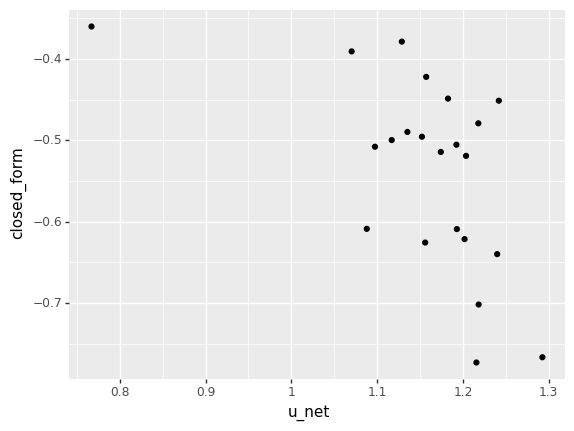

<ggplot: (8739380139573)>


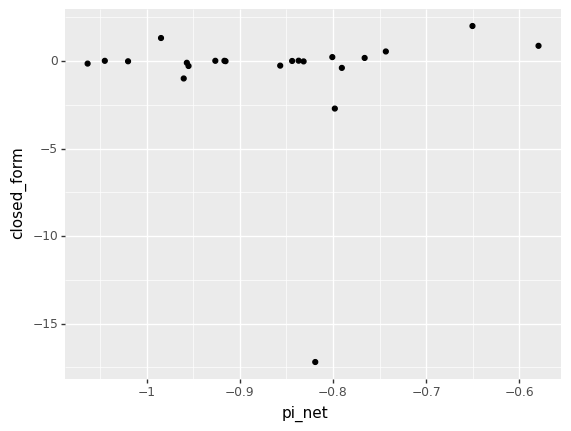

<ggplot: (8739380117545)>
Epoch 199 - lr 0.0005 - key loss: 0.46396 - eqWeighted loss: 0.46396 - L1 loss 0.46396 - Max Loss 0.40367
internal loss: tensor(0.4037, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0603, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-3.2091, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(-2.9199, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.3707, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.2010, device='cuda:0') max abs d2u_dx2: tensor(0.9082, device='cuda:0') min abs d2u_dx2: tensor(0.0092, device='cuda:0')
mean du_dx: tensor(0.0027, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3579, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0006, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0544, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5282, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0135, 

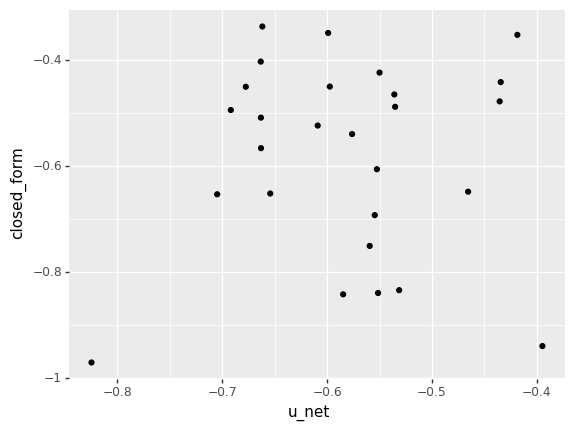

<ggplot: (8739380091609)>


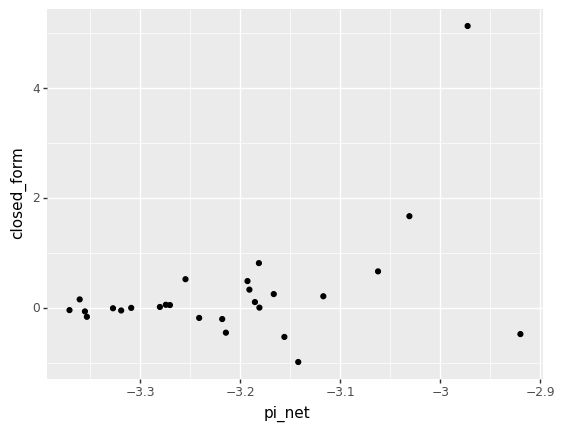

<ggplot: (8739380335589)>
Epoch 399 - lr 0.0005 - key loss: 0.06026 - eqWeighted loss: 0.06026 - L1 loss 0.06026 - Max Loss 0.05069
internal loss: tensor(0.0507, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0096, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.9916, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(-0.7851, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.3309, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2335, device='cuda:0') max abs d2u_dx2: tensor(1.5618, device='cuda:0') min abs d2u_dx2: tensor(0.0291, device='cuda:0')
mean du_dx: tensor(0.4093, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6936, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0143, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0048, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2794, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003,

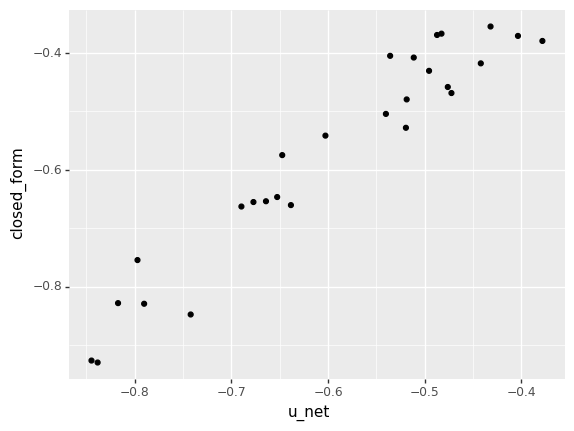

<ggplot: (8739380091549)>


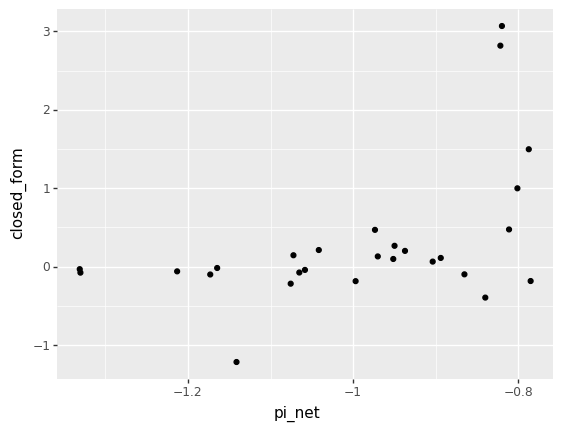

<ggplot: (8739380335489)>
Epoch 599 - lr 0.0005 - key loss: 0.49271 - eqWeighted loss: 0.49271 - L1 loss 0.49271 - Max Loss 0.48461
internal loss: tensor(0.4846, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0081, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-2.3003, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(-0.6651, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.0814, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0112, device='cuda:0') max abs d2u_dx2: tensor(1.0283, device='cuda:0') min abs d2u_dx2: tensor(0.0226, device='cuda:0')
mean du_dx: tensor(0.0822, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4417, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0210, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.4014, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(1.0567, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0109, 

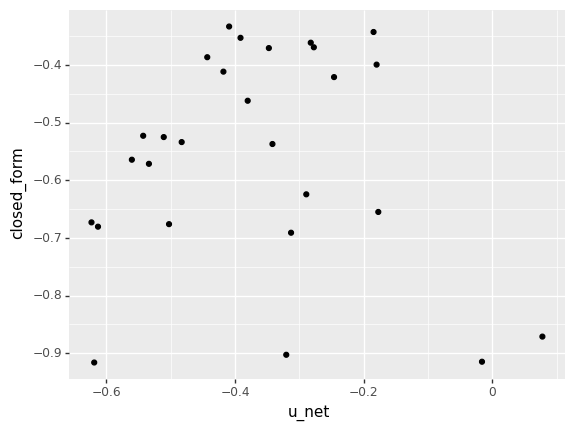

<ggplot: (8739380441813)>


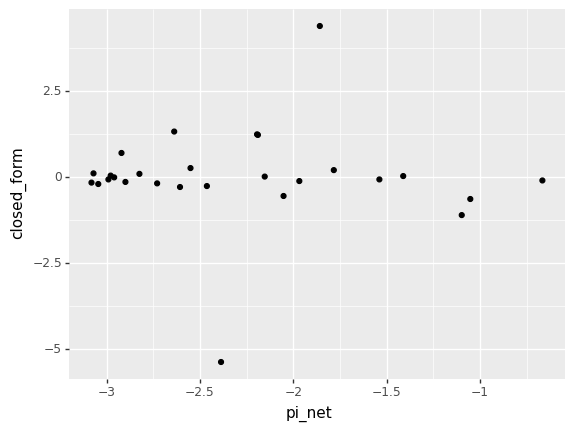

<ggplot: (8739380441657)>
Epoch 799 - lr 0.0005 - key loss: 0.2755 - eqWeighted loss: 0.2755 - L1 loss 0.2755 - Max Loss 0.26873
internal loss: tensor(0.2687, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0068, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.8832, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.2258, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.9598, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1218, device='cuda:0') max abs d2u_dx2: tensor(1.4783, device='cuda:0') min abs d2u_dx2: tensor(0.0243, device='cuda:0')
mean du_dx: tensor(0.4674, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6878, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0542, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.1642, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5953, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0078, devi

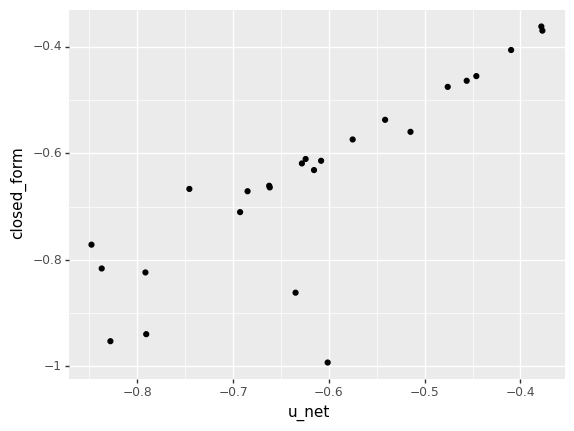

<ggplot: (8739380109445)>


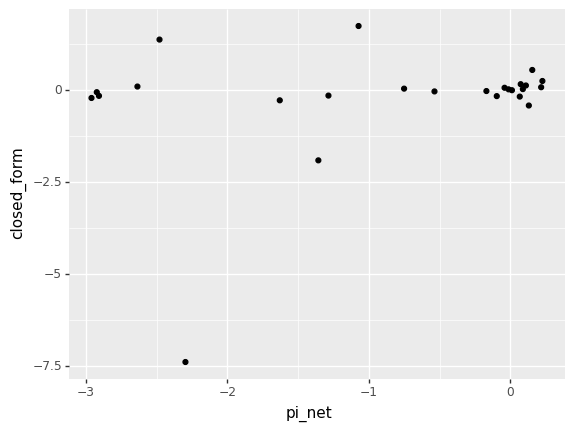

<ggplot: (8739380895129)>
Epoch 999 - lr 0.0005 - key loss: 2.06149 - eqWeighted loss: 2.06149 - L1 loss 2.06149 - Max Loss 2.00929
internal loss: tensor(2.0093, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0522, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-4.9866, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(-4.6556, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.1239, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1971, device='cuda:0') max abs d2u_dx2: tensor(1.6323, device='cuda:0') min abs d2u_dx2: tensor(0.0433, device='cuda:0')
mean du_dx: tensor(0.1185, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7733, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0121, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.5479, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(1.4553, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0097, 

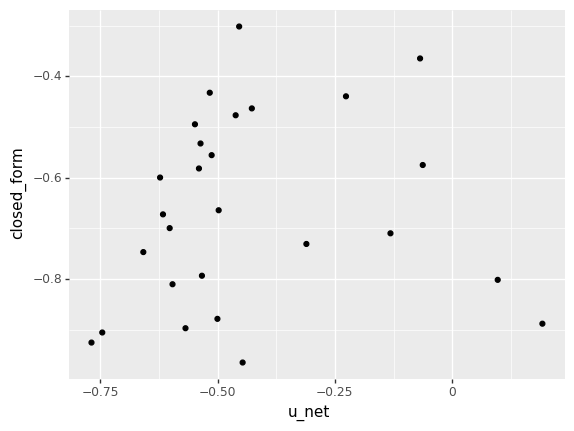

<ggplot: (8739380109501)>


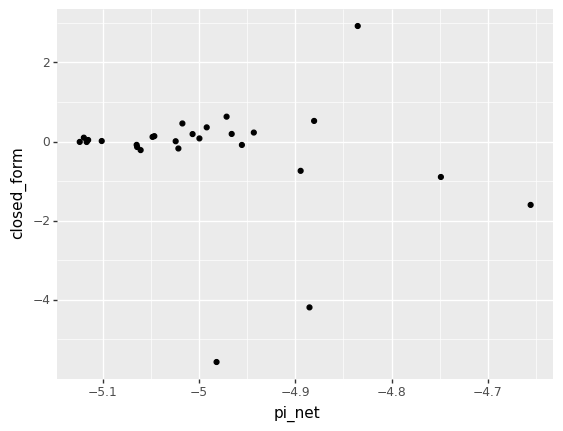

<ggplot: (8739380093161)>
Epoch 1199 - lr 0.0005 - key loss: 0.22522 - eqWeighted loss: 0.22522 - L1 loss 0.22522 - Max Loss 0.19562
internal loss: tensor(0.1956, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0296, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.8770, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(-0.1658, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.9607, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0310, device='cuda:0') max abs d2u_dx2: tensor(0.7516, device='cuda:0') min abs d2u_dx2: tensor(0.0230, device='cuda:0')
mean du_dx: tensor(0.3436, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5858, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0895, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.2035, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5737, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0059,

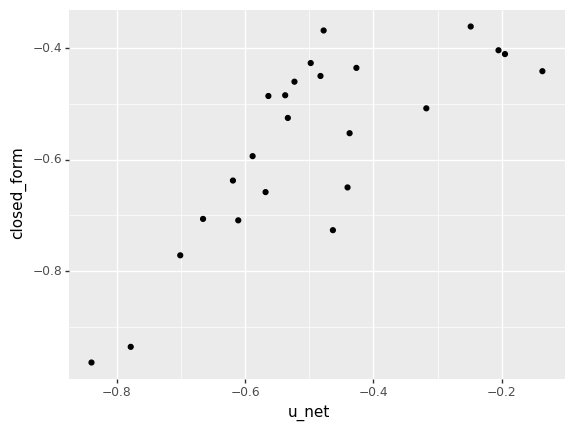

<ggplot: (8739380318153)>


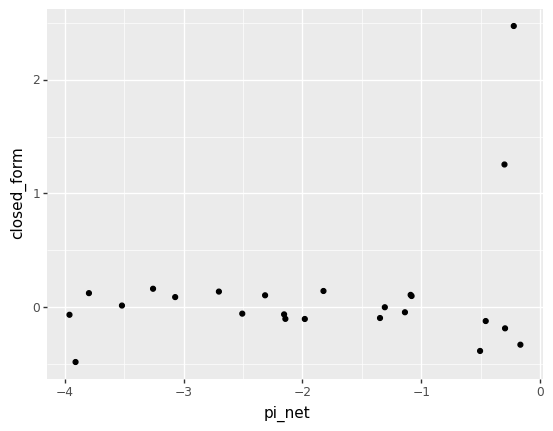

<ggplot: (8739380343325)>
Epoch 1399 - lr 0.0005 - key loss: 0.29479 - eqWeighted loss: 0.29479 - L1 loss 0.29479 - Max Loss 0.28535
internal loss: tensor(0.2854, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0094, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-2.1268, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.2377, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.9395, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1737, device='cuda:0') max abs d2u_dx2: tensor(1.0195, device='cuda:0') min abs d2u_dx2: tensor(0.0155, device='cuda:0')
mean du_dx: tensor(0.3513, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6035, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0096, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.2558, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.7143, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0042, 

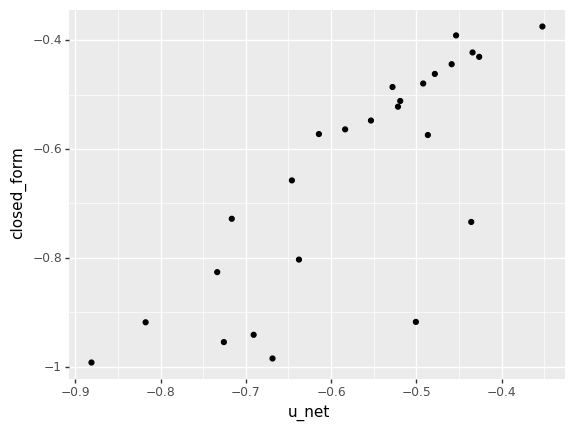

<ggplot: (8739380318157)>


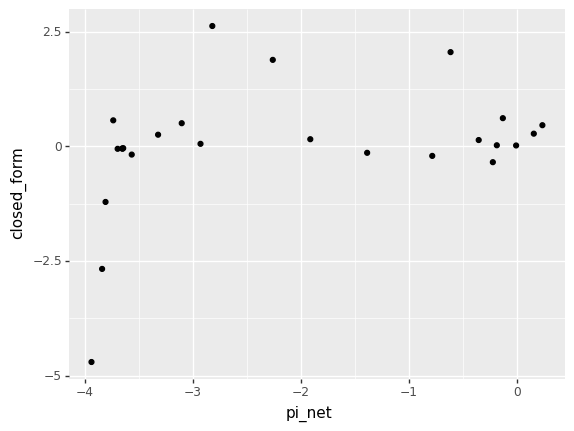

<ggplot: (8739380124789)>
Epoch 1599 - lr 0.0005 - key loss: 0.38668 - eqWeighted loss: 0.38668 - L1 loss 0.38668 - Max Loss 0.37892
internal loss: tensor(0.3789, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0078, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.5429, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.4215, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.3363, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1006, device='cuda:0') max abs d2u_dx2: tensor(1.3721, device='cuda:0') min abs d2u_dx2: tensor(0.0297, device='cuda:0')
mean du_dx: tensor(0.3568, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7797, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0232, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.2524, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(1.0914, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003, 

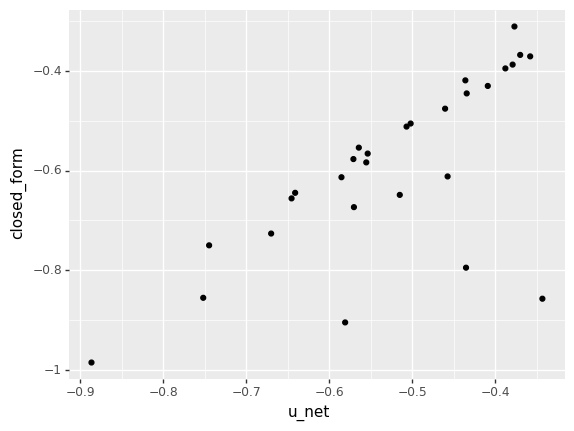

<ggplot: (8739380339401)>


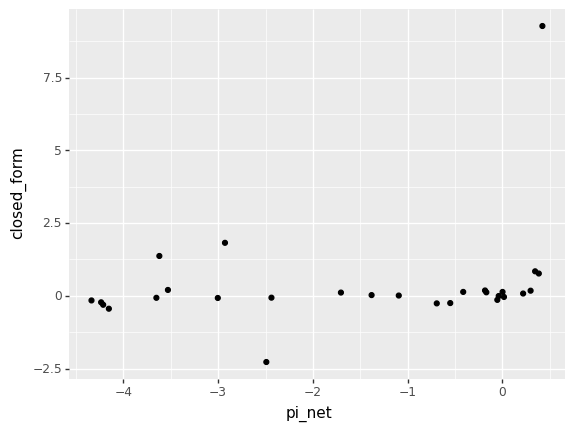

<ggplot: (8739380884913)>
Epoch 1799 - lr 0.0005 - key loss: 0.70001 - eqWeighted loss: 0.70001 - L1 loss 0.70001 - Max Loss 0.68731
internal loss: tensor(0.6873, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0127, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.5509, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.6195, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.2446, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1903, device='cuda:0') max abs d2u_dx2: tensor(1.6795, device='cuda:0') min abs d2u_dx2: tensor(0.0087, device='cuda:0')
mean du_dx: tensor(0.5193, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(1.0238, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1463, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.1218, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.7983, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0143,

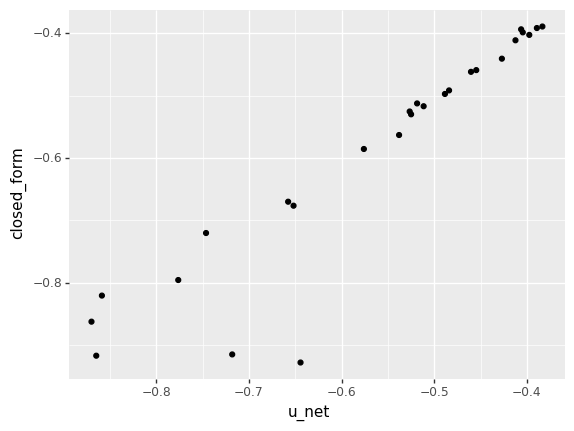

<ggplot: (8739380400417)>


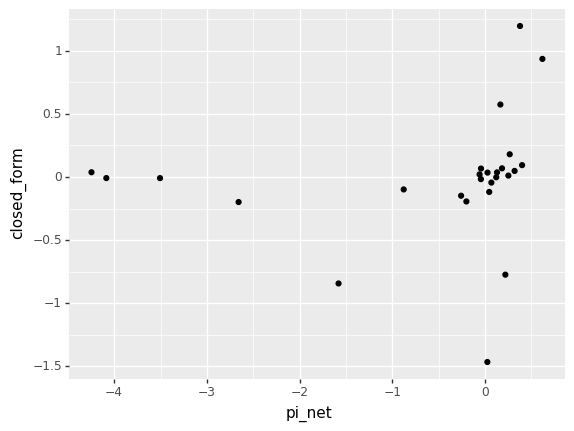

<ggplot: (8739380343309)>
Epoch 1999 - lr 0.0005 - key loss: 0.35134 - eqWeighted loss: 0.35134 - L1 loss 0.35134 - Max Loss 0.34423
internal loss: tensor(0.3442, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0071, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2542, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.5617, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.4105, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3878, device='cuda:0') max abs d2u_dx2: tensor(0.8748, device='cuda:0') min abs d2u_dx2: tensor(0.0533, device='cuda:0')
mean du_dx: tensor(0.5412, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7957, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2617, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0383, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2150, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0017,

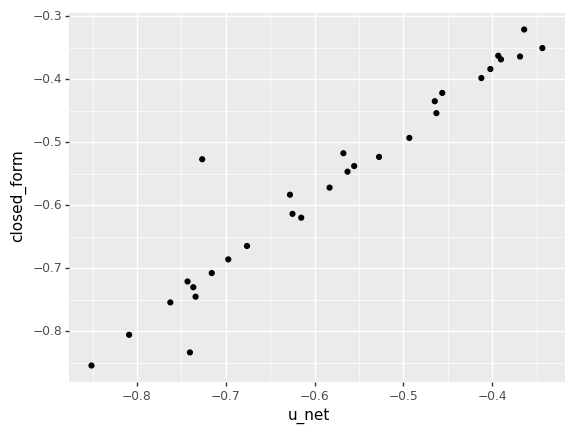

<ggplot: (8739380123097)>


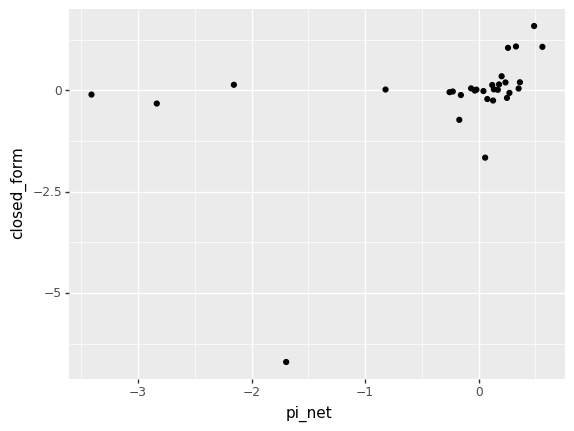

<ggplot: (8739380343333)>
Epoch 2199 - lr 0.0005 - key loss: 0.45143 - eqWeighted loss: 0.45143 - L1 loss 0.45143 - Max Loss 0.43988
internal loss: tensor(0.4399, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0116, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.2522, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.2813, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.9181, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1371, device='cuda:0') max abs d2u_dx2: tensor(0.8047, device='cuda:0') min abs d2u_dx2: tensor(0.0062, device='cuda:0')
mean du_dx: tensor(0.4282, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7936, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1608, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0897, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3551, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0047,

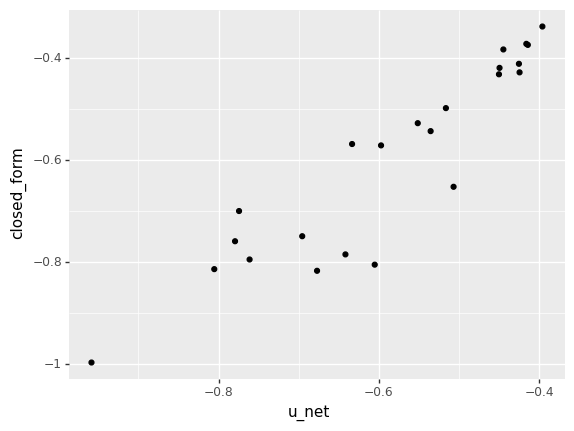

<ggplot: (8739380076641)>


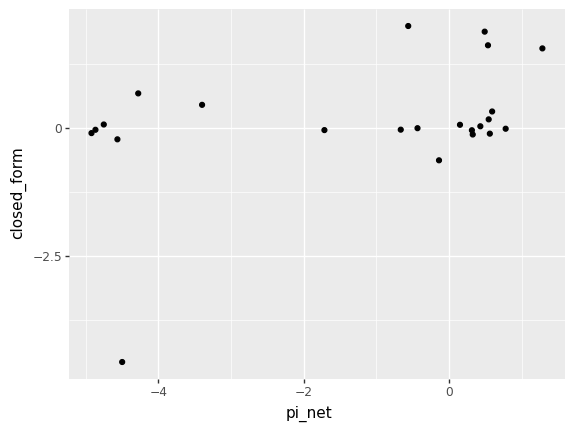

<ggplot: (8739380139669)>
Epoch 2399 - lr 0.0005 - key loss: 2.22703 - eqWeighted loss: 2.22703 - L1 loss 2.22703 - Max Loss 2.20277
internal loss: tensor(2.2028, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0243, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-3.9051, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.3116, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.5064, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.9225, device='cuda:0') max abs d2u_dx2: tensor(4.5431, device='cuda:0') min abs d2u_dx2: tensor(0.0304, device='cuda:0')
mean du_dx: tensor(-0.1508, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5505, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0150, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.4867, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(1.3476, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0119,

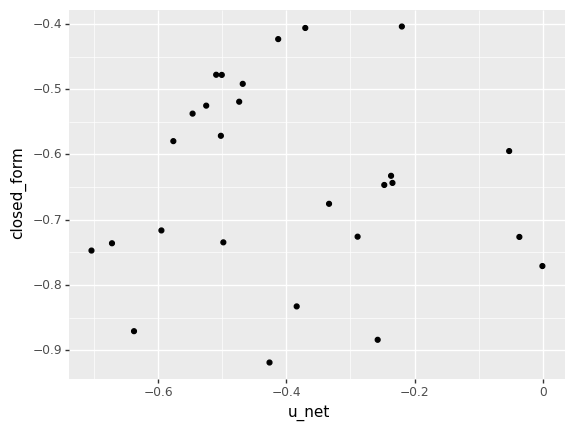

<ggplot: (8739488240453)>


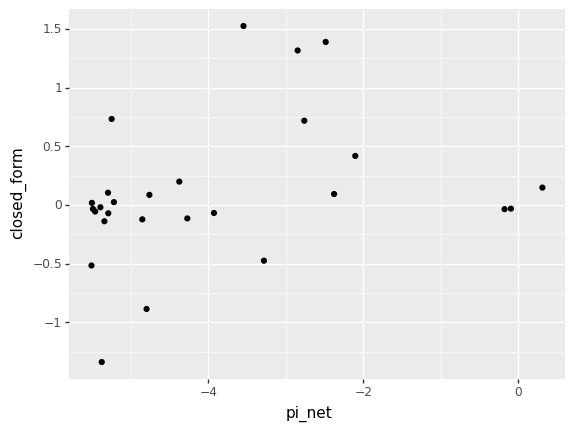

<ggplot: (8739380339221)>
Epoch 2599 - lr 0.0005 - key loss: 1.38873 - eqWeighted loss: 1.38873 - L1 loss 1.38873 - Max Loss 1.3726
internal loss: tensor(1.3726, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0161, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.8785, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.5418, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.7232, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.2998, device='cuda:0') max abs d2u_dx2: tensor(22.2175, device='cuda:0') min abs d2u_dx2: tensor(0.0151, device='cuda:0')
mean du_dx: tensor(0.3789, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(3.2733, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0282, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.5594, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(1.5466, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0051, 

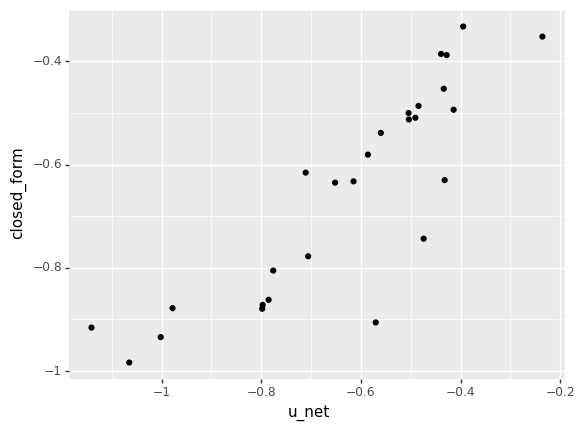

<ggplot: (8739487376381)>


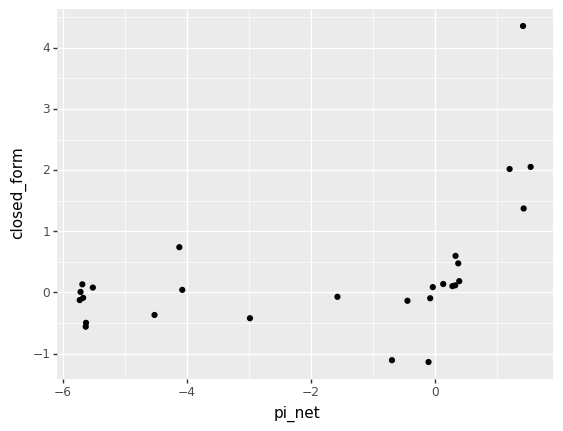

<ggplot: (8739487556217)>
Epoch 2799 - lr 0.0005 - key loss: 1.48958 - eqWeighted loss: 1.48958 - L1 loss 1.48958 - Max Loss 1.45185
internal loss: tensor(1.4519, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0377, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.5064, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.3626, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.4312, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1867, device='cuda:0') max abs d2u_dx2: tensor(1.8689, device='cuda:0') min abs d2u_dx2: tensor(0.0015, device='cuda:0')
mean du_dx: tensor(0.5620, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(1.2208, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2135, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.1830, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.6821, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0068, 

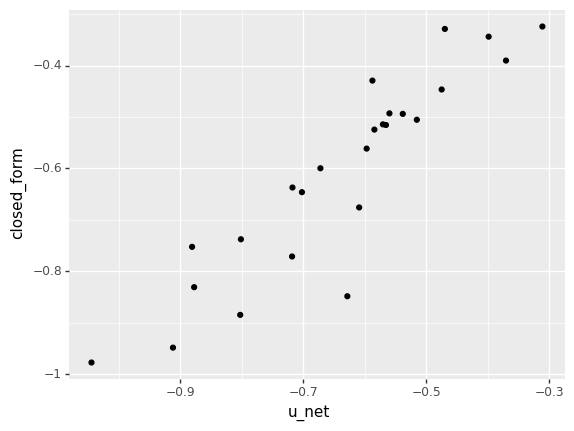

<ggplot: (8739380090497)>


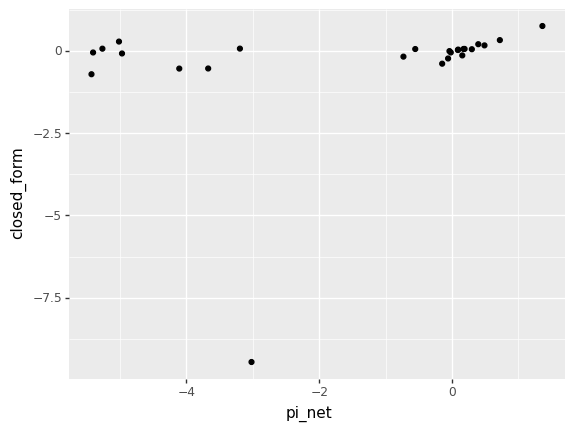

<ggplot: (8739487376377)>
Epoch 2999 - lr 0.0005 - key loss: 3.1328 - eqWeighted loss: 3.1328 - L1 loss 3.1328 - Max Loss 3.0411
internal loss: tensor(3.0411, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0917, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-5.9382, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(-5.6048, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.0110, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.3334, device='cuda:0') max abs d2u_dx2: tensor(1.9287, device='cuda:0') min abs d2u_dx2: tensor(0.0201, device='cuda:0')
mean du_dx: tensor(-0.1343, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7354, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0035, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.8888, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(2.1151, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.1027, de

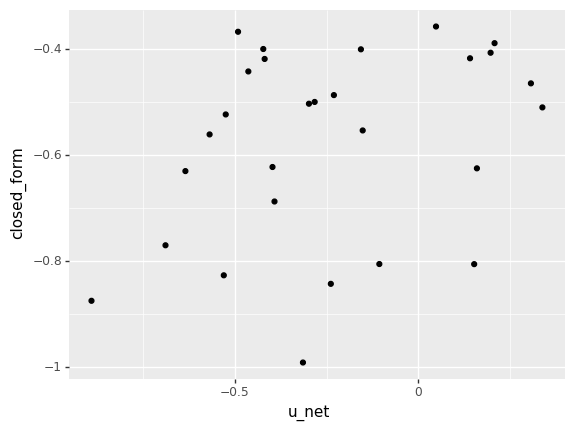

<ggplot: (8739487661989)>


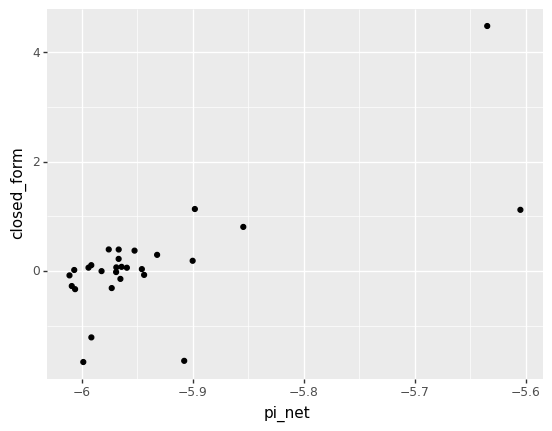

<ggplot: (8739504631389)>
Epoch 3199 - lr 0.0005 - key loss: 0.09055 - eqWeighted loss: 0.09055 - L1 loss 0.09055 - Max Loss 0.08025
internal loss: tensor(0.0802, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0103, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1113, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.9549, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-0.9852, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2559, device='cuda:0') max abs d2u_dx2: tensor(1.0297, device='cuda:0') min abs d2u_dx2: tensor(0.0089, device='cuda:0')
mean du_dx: tensor(0.5449, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7510, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3704, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0833, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2165, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0020, 

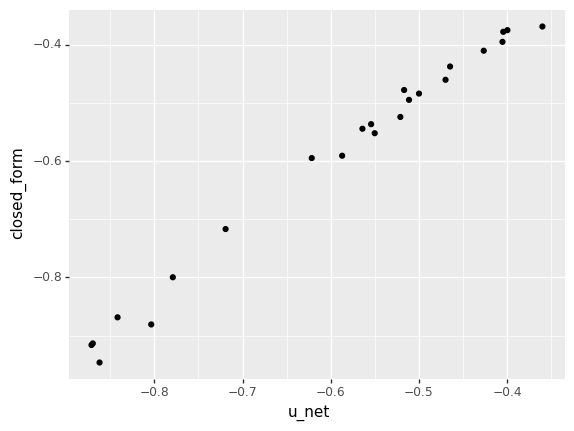

<ggplot: (8739487826613)>


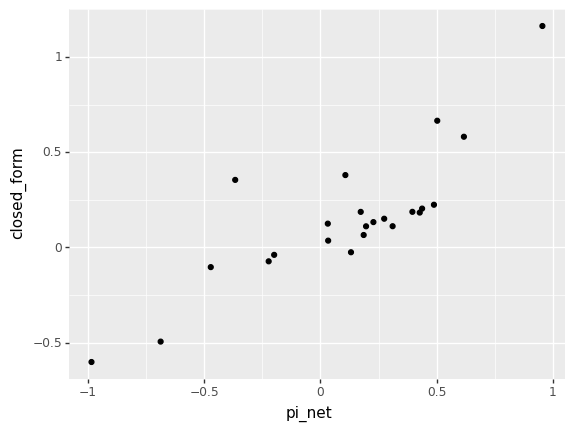

<ggplot: (8739380482069)>
Epoch 3399 - lr 0.0005 - key loss: 0.04079 - eqWeighted loss: 0.04079 - L1 loss 0.04079 - Max Loss 0.03525
internal loss: tensor(0.0353, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0055, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4756, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.0507, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.0599, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2940, device='cuda:0') max abs d2u_dx2: tensor(1.1278, device='cuda:0') min abs d2u_dx2: tensor(0.0224, device='cuda:0')
mean du_dx: tensor(0.6177, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8758, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3840, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0606, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1320, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0065,

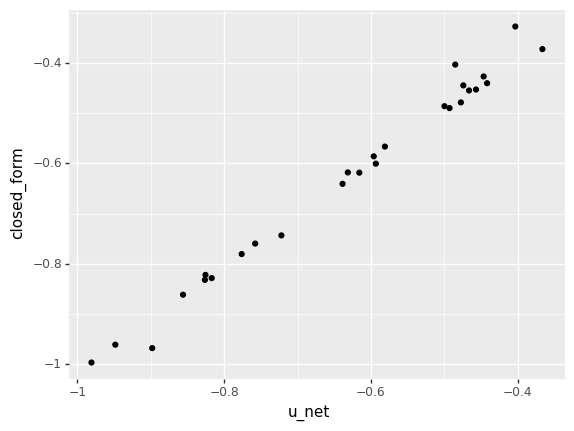

<ggplot: (8739487378833)>


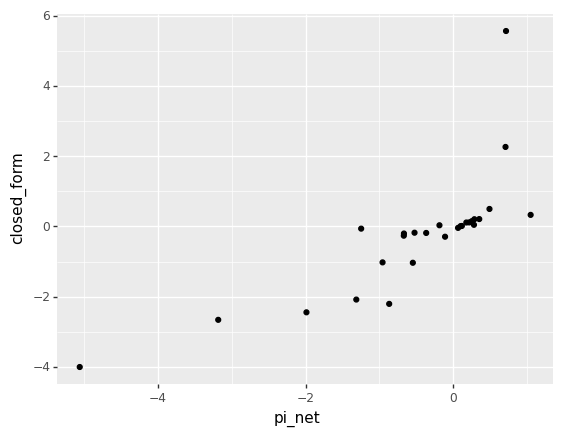

<ggplot: (8739381271309)>
Epoch 3599 - lr 0.0005 - key loss: 0.0274 - eqWeighted loss: 0.0274 - L1 loss 0.0274 - Max Loss 0.02261
internal loss: tensor(0.0226, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0048, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1019, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.4580, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.3154, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4995, device='cuda:0') max abs d2u_dx2: tensor(1.3218, device='cuda:0') min abs d2u_dx2: tensor(0.0028, device='cuda:0')
mean du_dx: tensor(0.6068, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8845, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1687, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0391, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1079, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0030, de

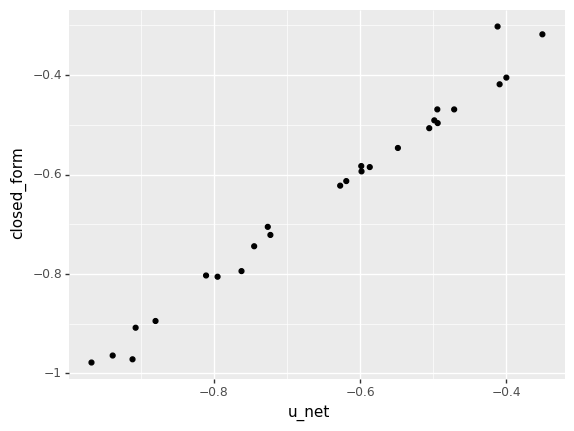

<ggplot: (8739487454373)>


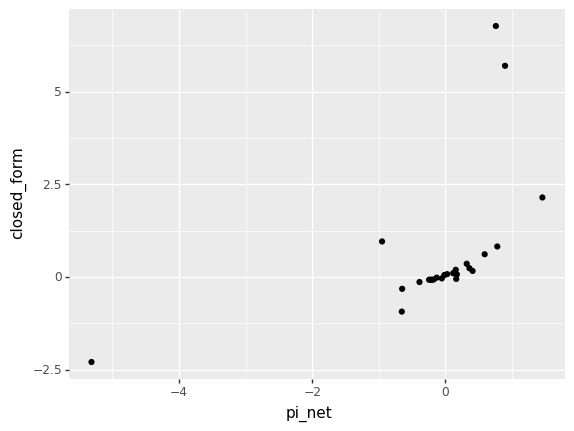

<ggplot: (8739504656509)>
Epoch 3799 - lr 0.0005 - key loss: 0.0507 - eqWeighted loss: 0.0507 - L1 loss 0.0507 - Max Loss 0.04509
internal loss: tensor(0.0451, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0056, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1979, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.6154, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.6847, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4203, device='cuda:0') max abs d2u_dx2: tensor(0.9308, device='cuda:0') min abs d2u_dx2: tensor(0.1803, device='cuda:0')
mean du_dx: tensor(0.6089, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8170, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2021, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0553, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1111, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0054, dev

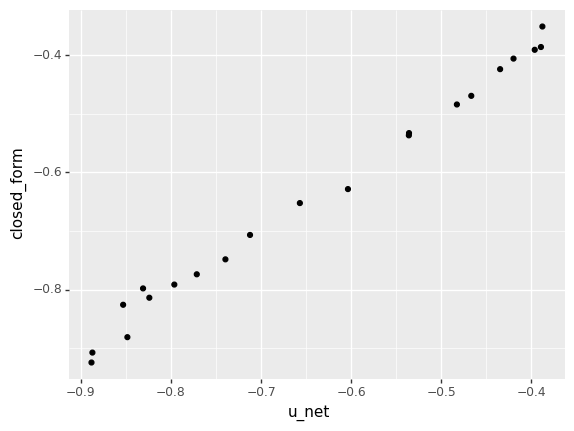

<ggplot: (8739504685761)>


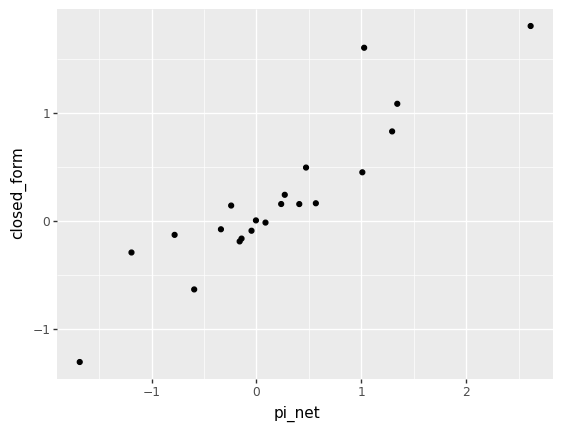

<ggplot: (8739504656521)>
Epoch 3999 - lr 0.0005 - key loss: 0.02666 - eqWeighted loss: 0.02666 - L1 loss 0.02666 - Max Loss 0.02441
internal loss: tensor(0.0244, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0022, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2219, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.2752, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.2556, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4319, device='cuda:0') max abs d2u_dx2: tensor(1.0394, device='cuda:0') min abs d2u_dx2: tensor(0.0079, device='cuda:0')
mean du_dx: tensor(0.5897, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8832, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3166, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0361, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1119, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0015,

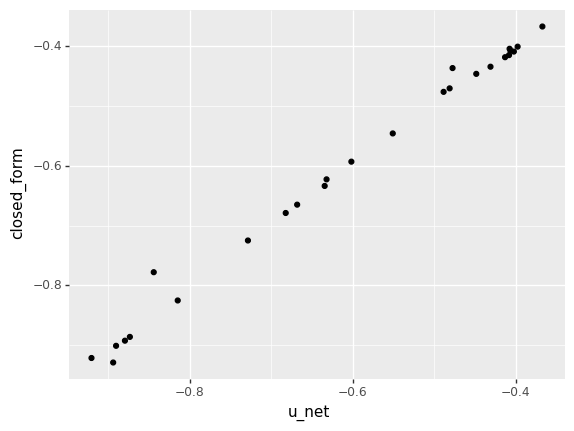

<ggplot: (8739381113429)>


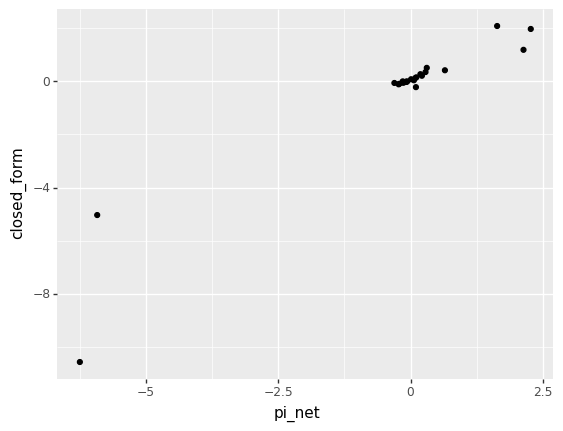

<ggplot: (8739487378781)>
Epoch 4199 - lr 0.0005 - key loss: 0.03944 - eqWeighted loss: 0.03944 - L1 loss 0.03944 - Max Loss 0.03203
internal loss: tensor(0.0320, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0074, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4160, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.8767, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.1815, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5759, device='cuda:0') max abs d2u_dx2: tensor(0.9372, device='cuda:0') min abs d2u_dx2: tensor(0.2754, device='cuda:0')
mean du_dx: tensor(0.6108, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9023, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2389, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0292, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0853, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0011,

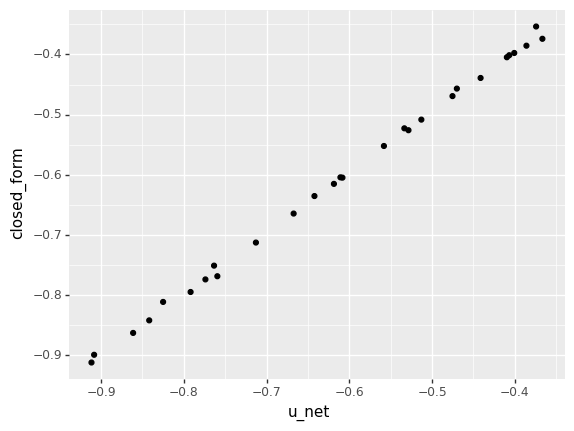

<ggplot: (8739487341953)>


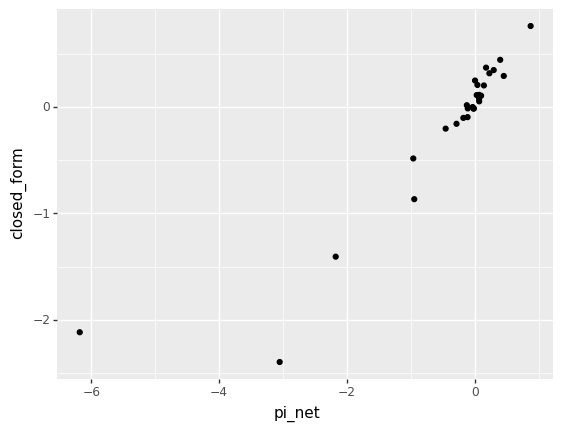

<ggplot: (8739504662001)>
Epoch 4399 - lr 0.0005 - key loss: 0.04153 - eqWeighted loss: 0.04153 - L1 loss 0.04153 - Max Loss 0.03853
internal loss: tensor(0.0385, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0030, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0297, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.6465, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.7860, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4731, device='cuda:0') max abs d2u_dx2: tensor(0.9519, device='cuda:0') min abs d2u_dx2: tensor(0.0866, device='cuda:0')
mean du_dx: tensor(0.5404, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8881, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2829, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0394, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1328, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0023,

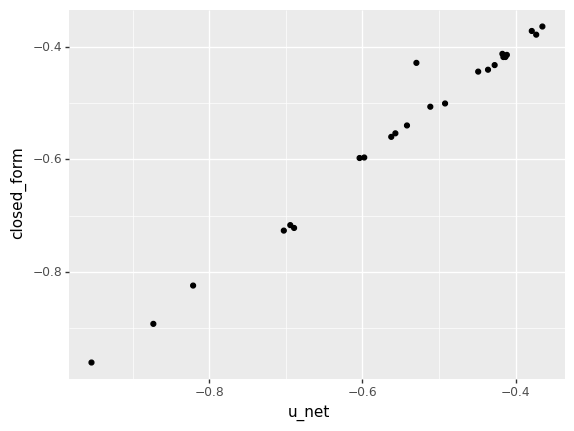

<ggplot: (8739380743629)>


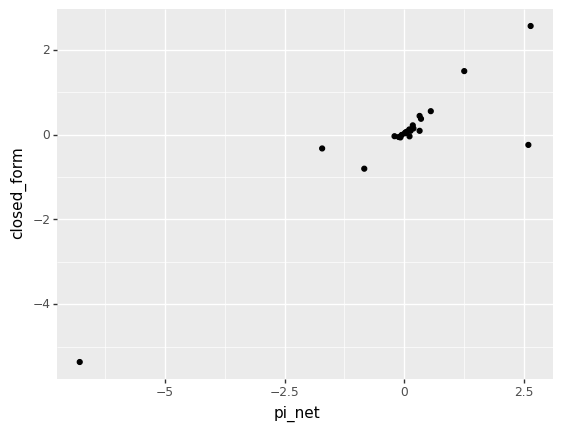

<ggplot: (8739487773201)>
Epoch 4599 - lr 0.0005 - key loss: 0.02912 - eqWeighted loss: 0.02912 - L1 loss 0.02912 - Max Loss 0.02325
internal loss: tensor(0.0233, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0059, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1123, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(4.1147, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.7558, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5558, device='cuda:0') max abs d2u_dx2: tensor(1.0004, device='cuda:0') min abs d2u_dx2: tensor(0.0651, device='cuda:0')
mean du_dx: tensor(0.5754, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9006, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2476, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0393, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1505, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0018, 

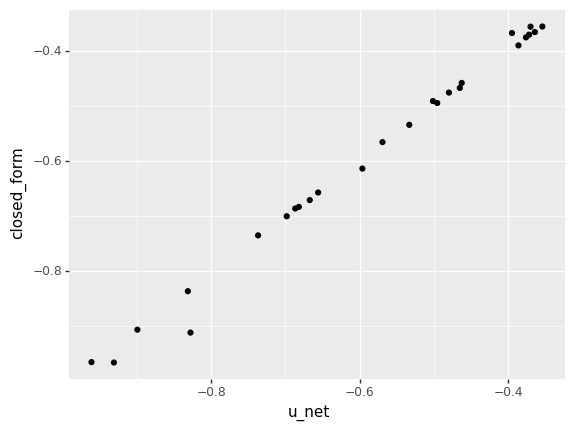

<ggplot: (8739504663489)>


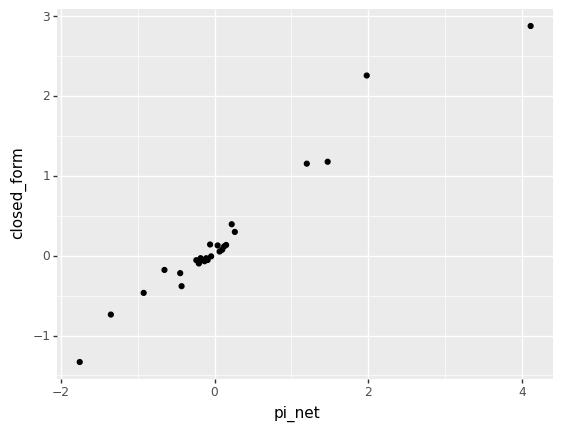

<ggplot: (8739487773245)>
Epoch 4799 - lr 0.0005 - key loss: 0.03747 - eqWeighted loss: 0.03747 - L1 loss 0.03747 - Max Loss 0.03298
internal loss: tensor(0.0330, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0045, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0470, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.2428, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.8116, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5409, device='cuda:0') max abs d2u_dx2: tensor(0.8052, device='cuda:0') min abs d2u_dx2: tensor(0.0309, device='cuda:0')
mean du_dx: tensor(0.6397, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8788, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3801, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0544, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1541, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0094,

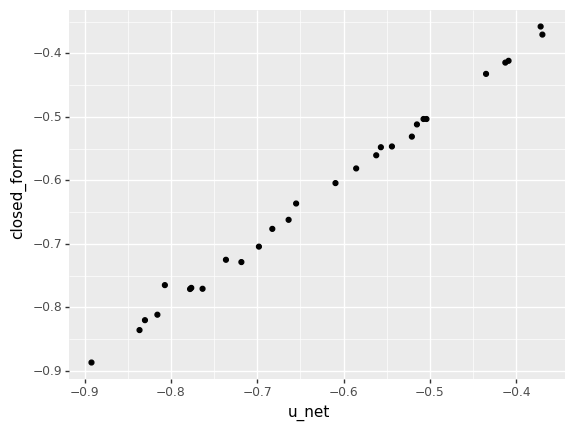

<ggplot: (8739381296933)>


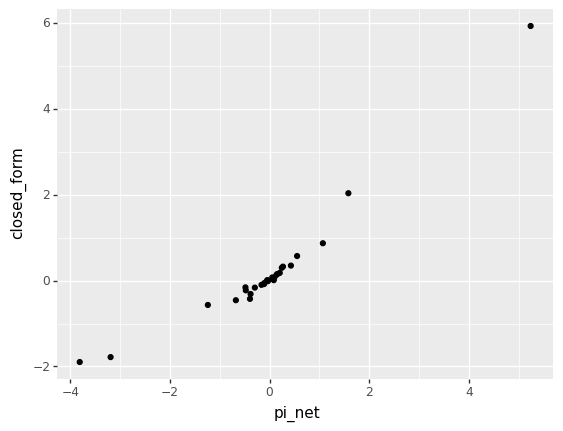

<ggplot: (8739487539497)>
Epoch 4999 - lr 0.0005 - key loss: 0.05043 - eqWeighted loss: 0.05043 - L1 loss 0.05043 - Max Loss 0.04714
internal loss: tensor(0.0471, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0033, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2557, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.4899, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-7.8023, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4471, device='cuda:0') max abs d2u_dx2: tensor(1.0233, device='cuda:0') min abs d2u_dx2: tensor(0.0385, device='cuda:0')
mean du_dx: tensor(0.5955, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8357, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3314, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0637, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2849, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0099,

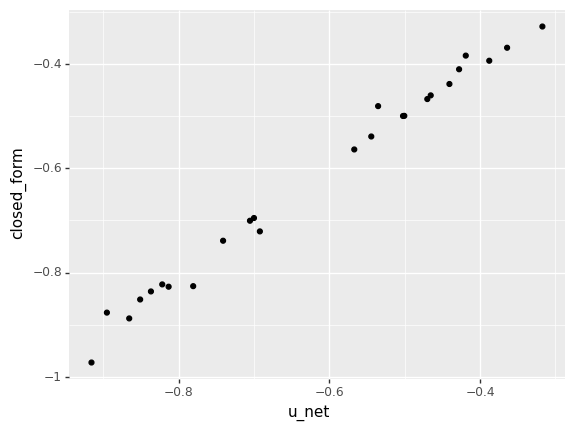

<ggplot: (8739381769949)>


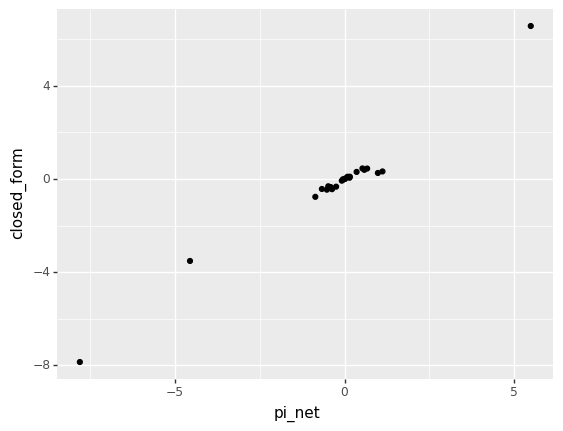

<ggplot: (8739381767137)>
Epoch 5199 - lr 0.0005 - key loss: 0.02847 - eqWeighted loss: 0.02847 - L1 loss 0.02847 - Max Loss 0.02427
internal loss: tensor(0.0243, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0042, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.5022, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(4.1554, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.2540, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3442, device='cuda:0') max abs d2u_dx2: tensor(0.8139, device='cuda:0') min abs d2u_dx2: tensor(0.1704, device='cuda:0')
mean du_dx: tensor(0.6076, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8176, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3607, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0511, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1586, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003,

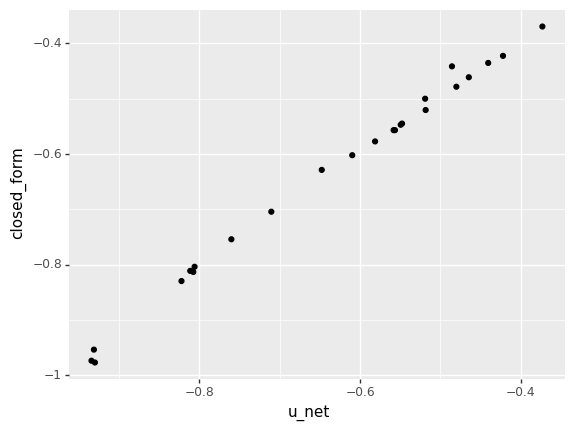

<ggplot: (8739381769881)>


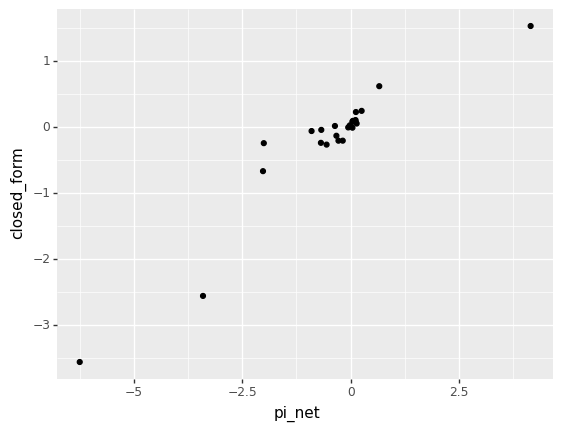

<ggplot: (8739380755413)>
Epoch 5399 - lr 0.0005 - key loss: 0.462 - eqWeighted loss: 0.462 - L1 loss 0.462 - Max Loss 0.45881
internal loss: tensor(0.4588, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0032, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.3384, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.9344, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-7.8788, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5633, device='cuda:0') max abs d2u_dx2: tensor(1.1428, device='cuda:0') min abs d2u_dx2: tensor(0.1631, device='cuda:0')
mean du_dx: tensor(0.4939, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9301, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1353, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0615, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2652, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0010, devic

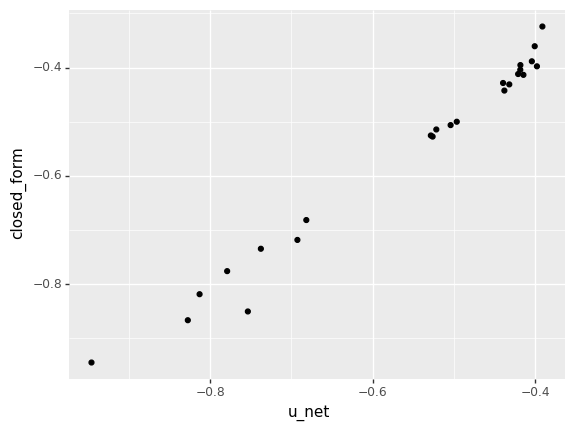

<ggplot: (8739380970953)>


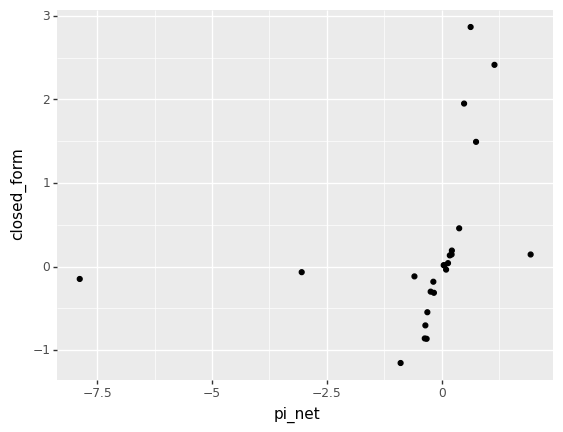

<ggplot: (8739380827353)>
Epoch 5599 - lr 0.0005 - key loss: 0.1035 - eqWeighted loss: 0.1035 - L1 loss 0.1035 - Max Loss 0.0995
internal loss: tensor(0.0995, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0040, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0919, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.3549, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-7.9557, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3423, device='cuda:0') max abs d2u_dx2: tensor(0.9492, device='cuda:0') min abs d2u_dx2: tensor(0.0358, device='cuda:0')
mean du_dx: tensor(0.5874, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9021, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2576, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0731, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2903, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0006, dev

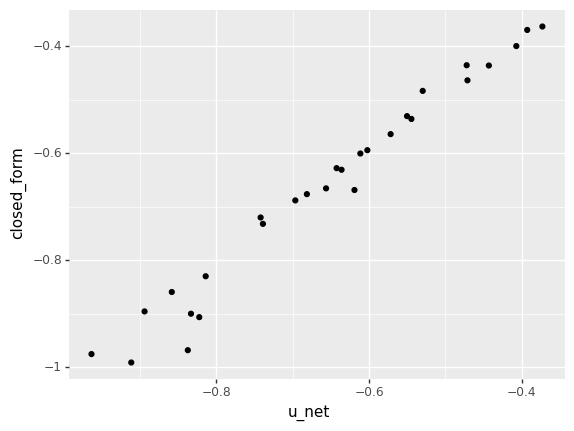

<ggplot: (8739381391669)>


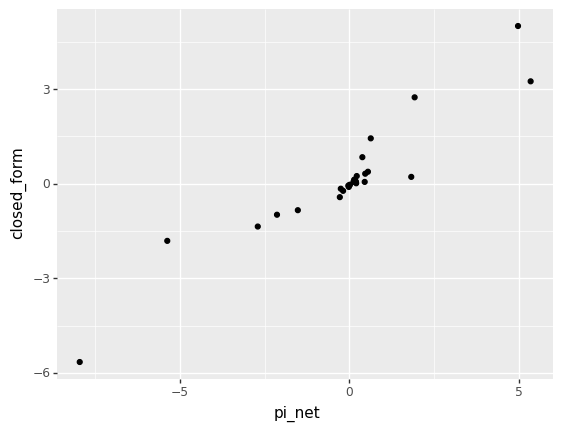

<ggplot: (8739380827225)>
Epoch 5799 - lr 0.0005 - key loss: 1.74212 - eqWeighted loss: 1.74212 - L1 loss 1.74212 - Max Loss 1.73848
internal loss: tensor(1.7385, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4902, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.6425, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-8.2126, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3526, device='cuda:0') max abs d2u_dx2: tensor(0.8389, device='cuda:0') min abs d2u_dx2: tensor(0.0093, device='cuda:0')
mean du_dx: tensor(0.5413, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8979, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1777, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0667, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2899, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0034,

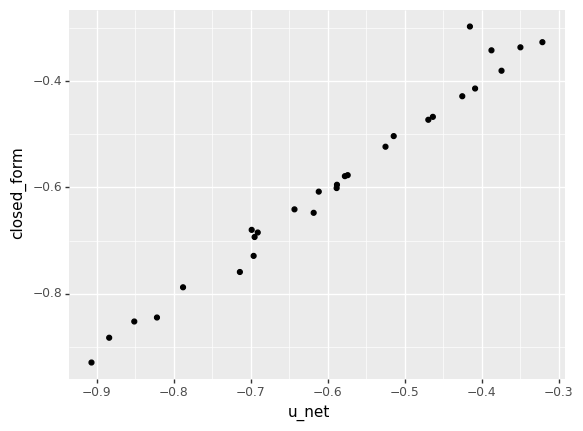

<ggplot: (8739381708229)>


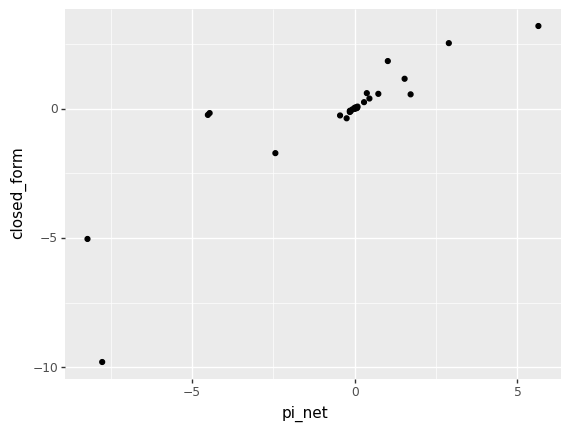

<ggplot: (8739381708169)>
Epoch 5999 - lr 0.0005 - key loss: 0.14698 - eqWeighted loss: 0.14698 - L1 loss 0.14698 - Max Loss 0.14098
internal loss: tensor(0.1410, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0060, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0543, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.0951, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.0570, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3215, device='cuda:0') max abs d2u_dx2: tensor(0.7442, device='cuda:0') min abs d2u_dx2: tensor(0.0406, device='cuda:0')
mean du_dx: tensor(0.6074, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8233, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.4029, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0751, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3559, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0067,

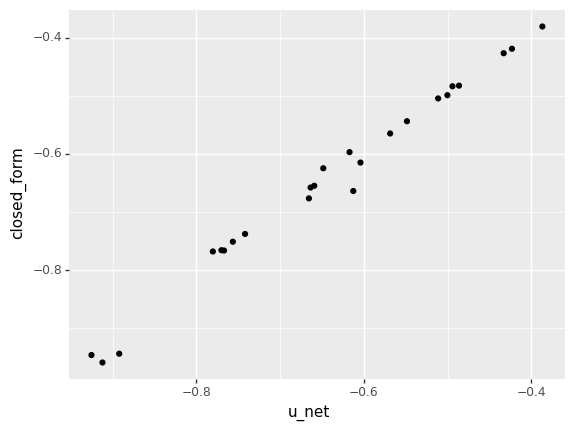

<ggplot: (8739381154897)>


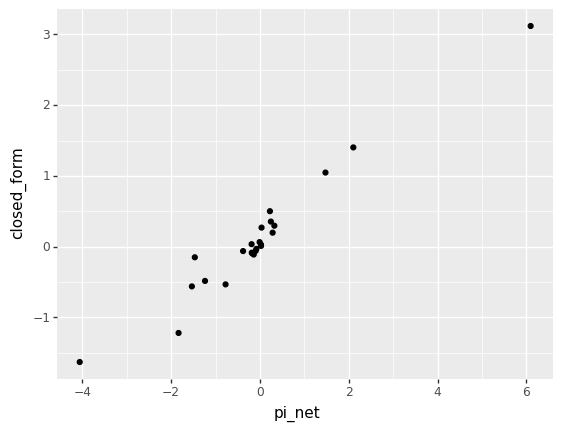

<ggplot: (8739381150649)>
Epoch 6199 - lr 0.0005 - key loss: 0.04434 - eqWeighted loss: 0.04434 - L1 loss 0.04434 - Max Loss 0.04057
internal loss: tensor(0.0406, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0038, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0937, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.0604, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.0577, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3451, device='cuda:0') max abs d2u_dx2: tensor(0.8957, device='cuda:0') min abs d2u_dx2: tensor(0.0701, device='cuda:0')
mean du_dx: tensor(0.5469, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7614, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2993, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0855, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3976, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0057, 

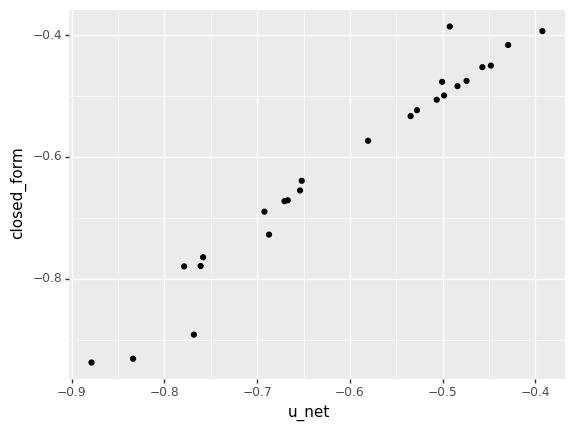

<ggplot: (8739487309757)>


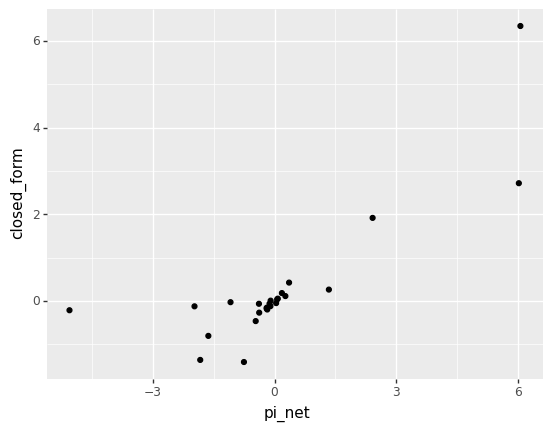

<ggplot: (8739487314661)>
Epoch 6399 - lr 0.0005 - key loss: 0.05532 - eqWeighted loss: 0.05532 - L1 loss 0.05532 - Max Loss 0.04953
internal loss: tensor(0.0495, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0058, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0533, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.6730, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.7424, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3143, device='cuda:0') max abs d2u_dx2: tensor(0.9281, device='cuda:0') min abs d2u_dx2: tensor(0.0431, device='cuda:0')
mean du_dx: tensor(0.5301, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7828, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1956, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0656, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3698, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0034, 

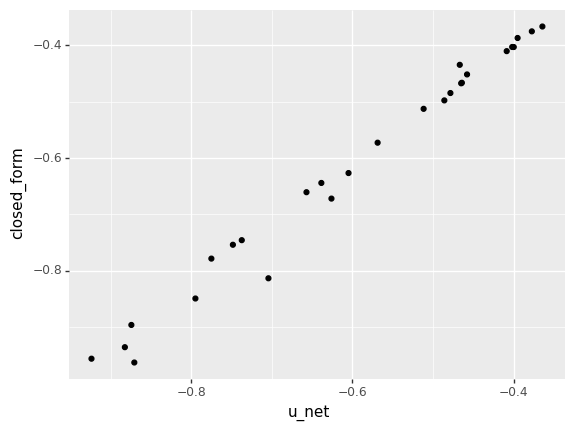

<ggplot: (8739487773237)>


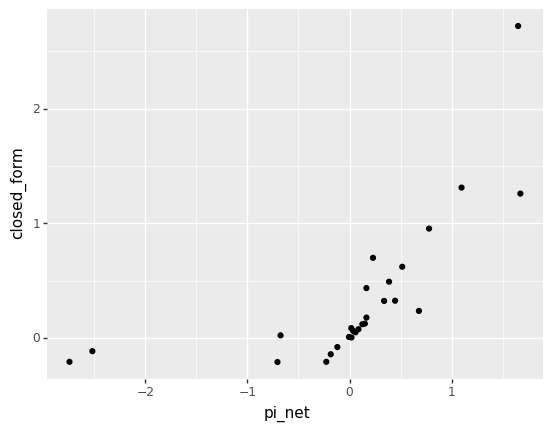

<ggplot: (8739381154685)>
Epoch 6599 - lr 0.0005 - key loss: 0.06471 - eqWeighted loss: 0.06471 - L1 loss 0.06471 - Max Loss 0.05791
internal loss: tensor(0.0579, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0068, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2290, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.6635, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-8.8278, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2762, device='cuda:0') max abs d2u_dx2: tensor(0.7707, device='cuda:0') min abs d2u_dx2: tensor(0.0214, device='cuda:0')
mean du_dx: tensor(0.5745, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8476, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2698, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0611, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3146, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0059,

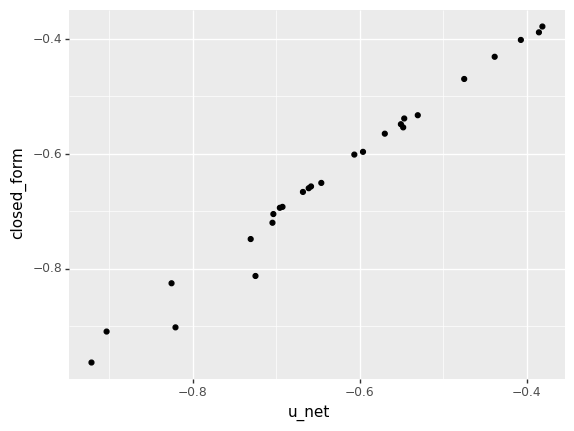

<ggplot: (8739381622197)>


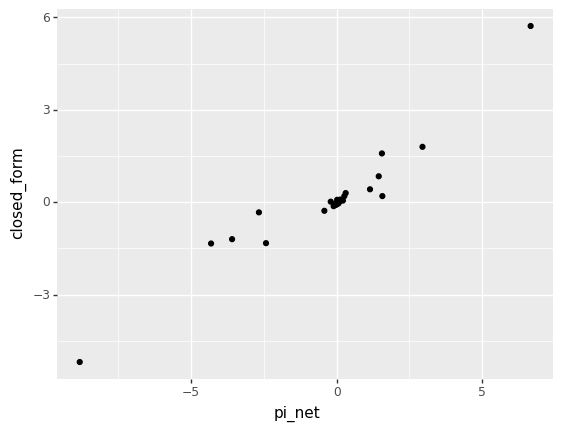

<ggplot: (8739486780317)>
Epoch 6799 - lr 0.0005 - key loss: 0.04098 - eqWeighted loss: 0.04098 - L1 loss 0.04098 - Max Loss 0.03866
internal loss: tensor(0.0387, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0023, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0363, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.5387, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.8184, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4523, device='cuda:0') max abs d2u_dx2: tensor(0.9191, device='cuda:0') min abs d2u_dx2: tensor(0.0772, device='cuda:0')
mean du_dx: tensor(0.6157, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8541, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3116, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0603, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2213, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0086, 

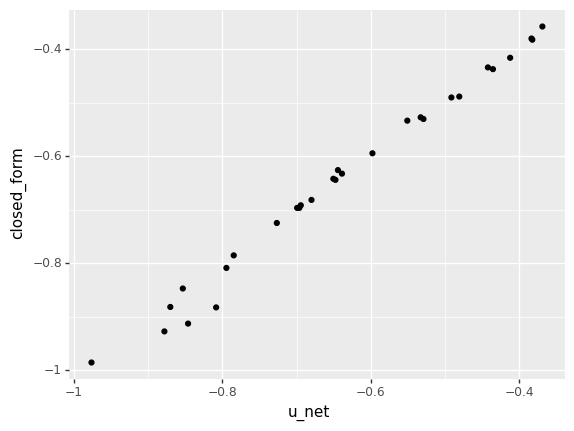

<ggplot: (8739487227149)>


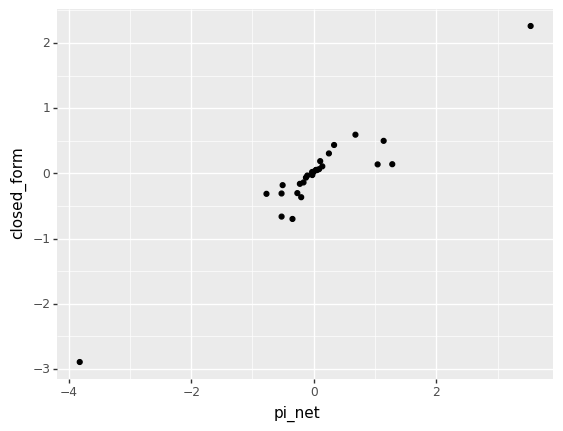

<ggplot: (8739487217313)>
Epoch 6999 - lr 0.0005 - key loss: 0.0272 - eqWeighted loss: 0.0272 - L1 loss 0.0272 - Max Loss 0.02323
internal loss: tensor(0.0232, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0040, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0659, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.7778, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.0266, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4378, device='cuda:0') max abs d2u_dx2: tensor(1.3029, device='cuda:0') min abs d2u_dx2: tensor(0.0233, device='cuda:0')
mean du_dx: tensor(0.5403, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7990, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1511, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0507, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1726, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0012, dev

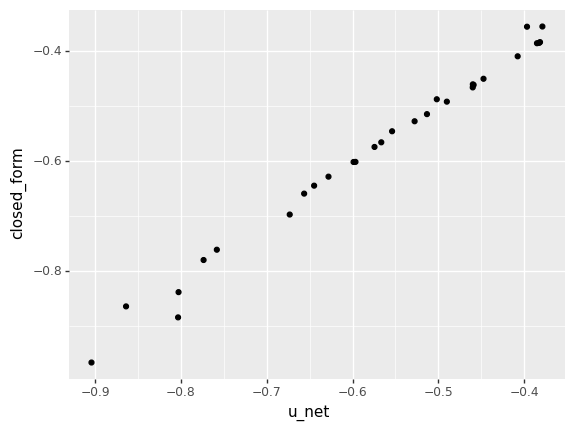

<ggplot: (8739487217385)>


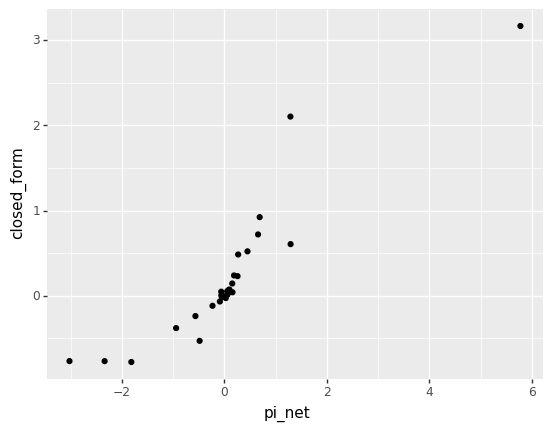

<ggplot: (8739381616505)>
Epoch 7199 - lr 0.0005 - key loss: 0.08626 - eqWeighted loss: 0.08626 - L1 loss 0.08626 - Max Loss 0.08061
internal loss: tensor(0.0806, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0056, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0901, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.0246, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.5614, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3795, device='cuda:0') max abs d2u_dx2: tensor(1.1065, device='cuda:0') min abs d2u_dx2: tensor(0.0025, device='cuda:0')
mean du_dx: tensor(0.5346, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8092, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2390, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0414, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1772, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0041,

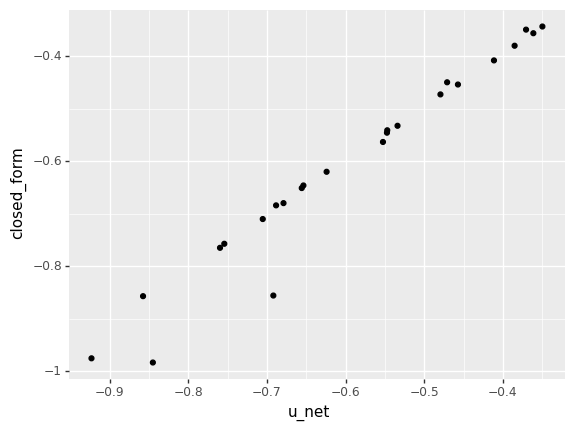

<ggplot: (8739381466649)>


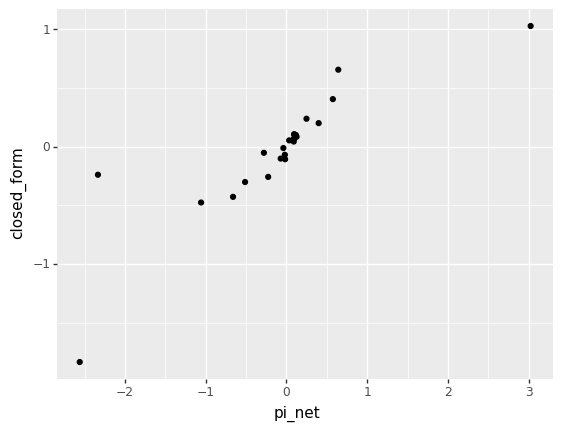

<ggplot: (8739486970601)>
Epoch 7399 - lr 0.0005 - key loss: 0.13619 - eqWeighted loss: 0.13619 - L1 loss 0.13619 - Max Loss 0.12626
internal loss: tensor(0.1263, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4128, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.6193, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-7.5092, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0778, device='cuda:0') max abs d2u_dx2: tensor(1.5268, device='cuda:0') min abs d2u_dx2: tensor(0.0199, device='cuda:0')
mean du_dx: tensor(0.3581, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5541, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0026, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0579, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1788, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0006,

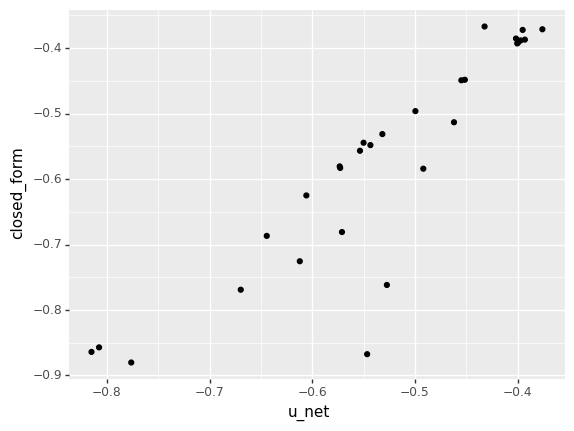

<ggplot: (8739381793981)>


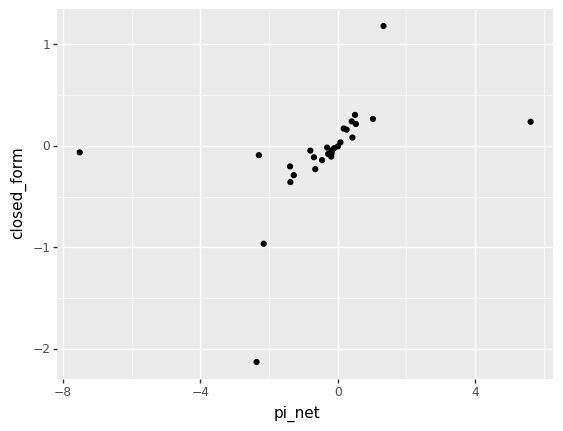

<ggplot: (8739380936121)>
Epoch 7599 - lr 0.0005 - key loss: 0.02255 - eqWeighted loss: 0.02255 - L1 loss 0.02255 - Max Loss 0.01733
internal loss: tensor(0.0173, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0052, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2568, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.6955, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.9840, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0478, device='cuda:0') max abs d2u_dx2: tensor(0.9515, device='cuda:0') min abs d2u_dx2: tensor(0.0104, device='cuda:0')
mean du_dx: tensor(0.2013, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3984, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0218, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0163, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0561, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0001, d

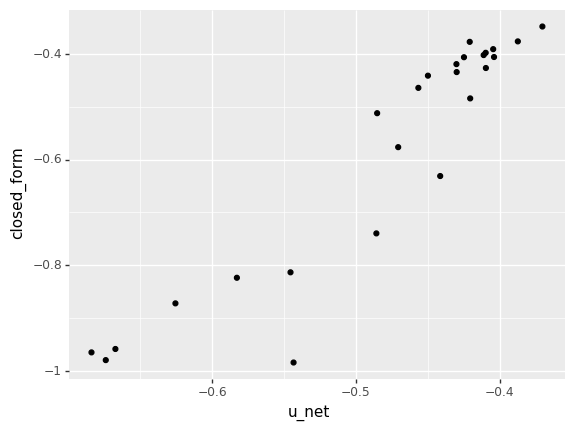

<ggplot: (8739486932353)>


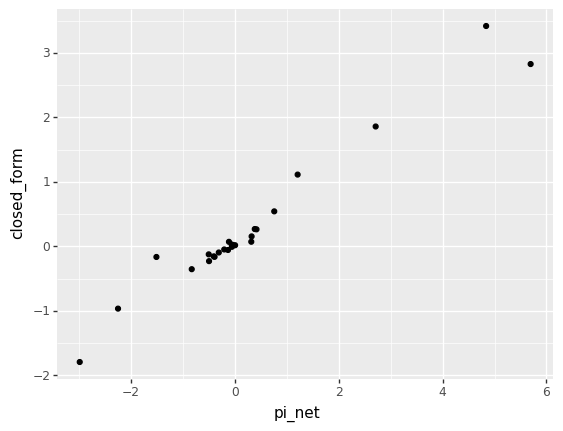

<ggplot: (8739487531325)>
Epoch 7799 - lr 0.0005 - key loss: 0.0788 - eqWeighted loss: 0.0788 - L1 loss 0.0788 - Max Loss 0.0637
internal loss: tensor(0.0637, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0151, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4415, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.5348, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-9.4056, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2484, device='cuda:0') max abs d2u_dx2: tensor(0.7052, device='cuda:0') min abs d2u_dx2: tensor(0.0423, device='cuda:0')
mean du_dx: tensor(0.5551, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7437, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2305, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0540, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1651, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0046, dev

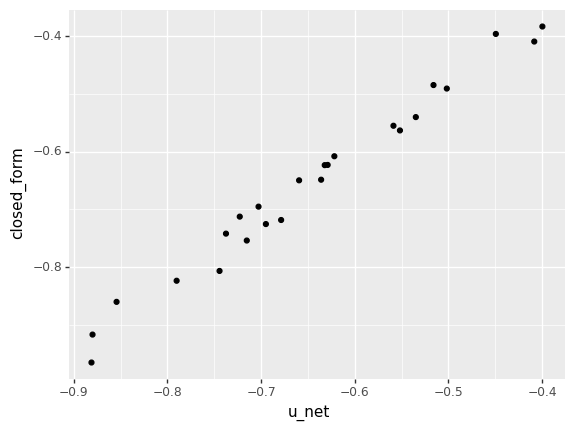

<ggplot: (8739381160437)>


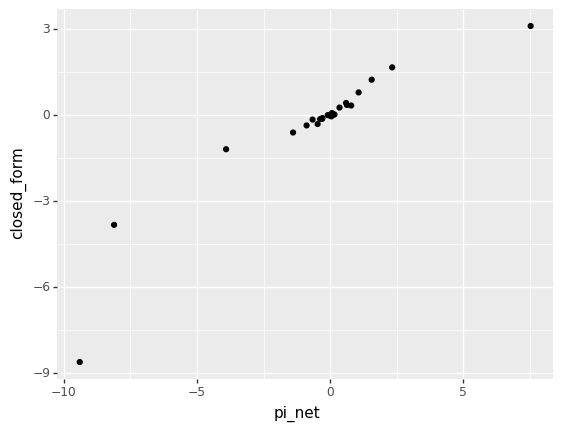

<ggplot: (8739487775685)>
Epoch 7999 - lr 0.0005 - key loss: 0.12531 - eqWeighted loss: 0.12531 - L1 loss 0.12531 - Max Loss 0.11531
internal loss: tensor(0.1153, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0100, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.8756, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.8427, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.3562, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2407, device='cuda:0') max abs d2u_dx2: tensor(0.8526, device='cuda:0') min abs d2u_dx2: tensor(0.0456, device='cuda:0')
mean du_dx: tensor(0.5223, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8057, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1506, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0651, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2668, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0043, 

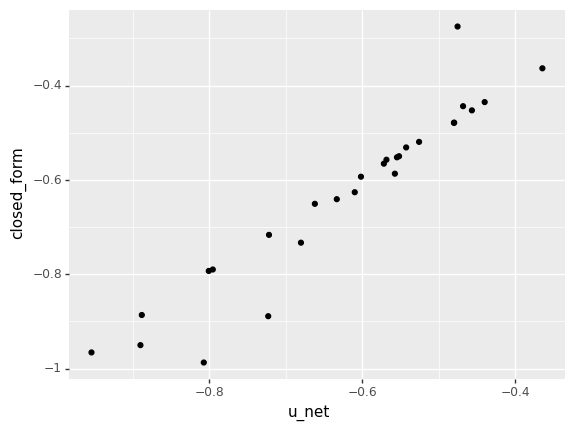

<ggplot: (8739381214165)>


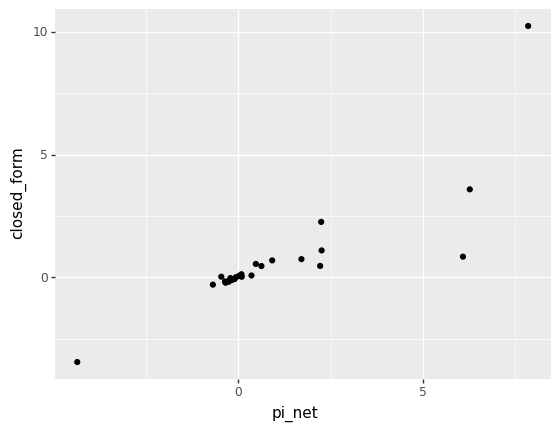

<ggplot: (8739381616617)>
Epoch 8199 - lr 0.0005 - key loss: 0.04934 - eqWeighted loss: 0.04934 - L1 loss 0.04934 - Max Loss 0.04129
internal loss: tensor(0.0413, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0080, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0858, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(4.7670, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.5746, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3760, device='cuda:0') max abs d2u_dx2: tensor(0.7864, device='cuda:0') min abs d2u_dx2: tensor(0.0461, device='cuda:0')
mean du_dx: tensor(0.5033, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8545, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2041, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0637, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2079, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0035, 

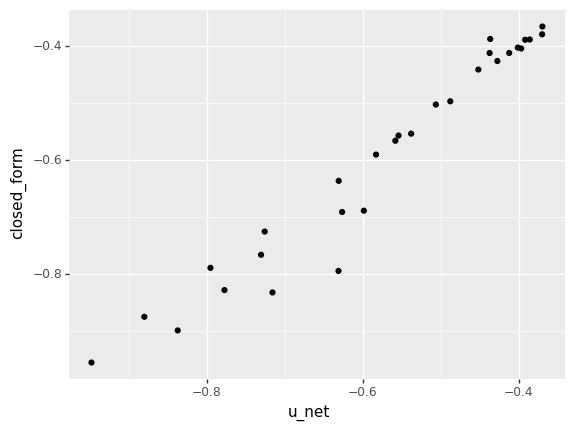

<ggplot: (8739497250573)>


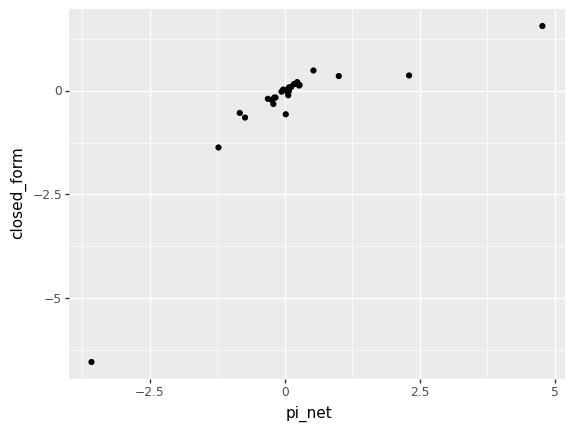

<ggplot: (8739381169233)>
Epoch 8399 - lr 0.0005 - key loss: 0.08258 - eqWeighted loss: 0.08258 - L1 loss 0.08258 - Max Loss 0.07336
internal loss: tensor(0.0734, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0092, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1256, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(8.2601, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.0181, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2128, device='cuda:0') max abs d2u_dx2: tensor(0.9272, device='cuda:0') min abs d2u_dx2: tensor(0.0072, device='cuda:0')
mean du_dx: tensor(0.4606, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7128, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0348, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0657, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2176, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0058,

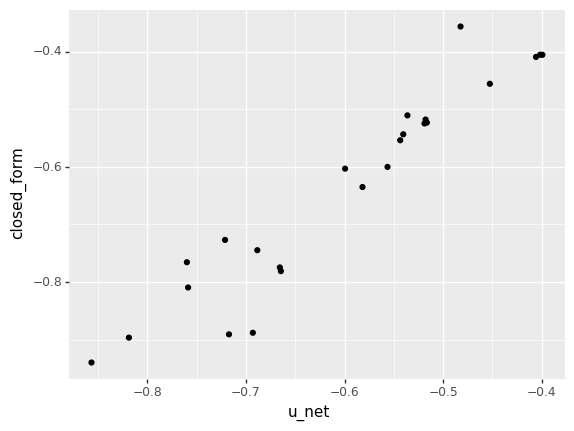

<ggplot: (8739487230189)>


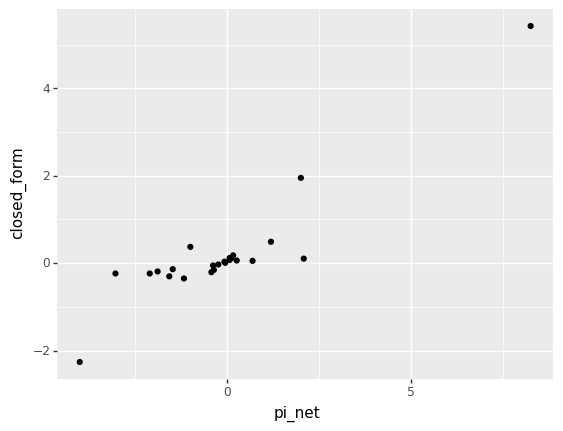

<ggplot: (8739381607717)>
Epoch 8599 - lr 0.0005 - key loss: 0.02241 - eqWeighted loss: 0.02241 - L1 loss 0.02241 - Max Loss 0.01626
internal loss: tensor(0.0163, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0061, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0676, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(8.0169, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-9.9656, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1074, device='cuda:0') max abs d2u_dx2: tensor(0.7371, device='cuda:0') min abs d2u_dx2: tensor(0.0062, device='cuda:0')
mean du_dx: tensor(0.3078, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5281, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0647, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0199, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0667, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0004,

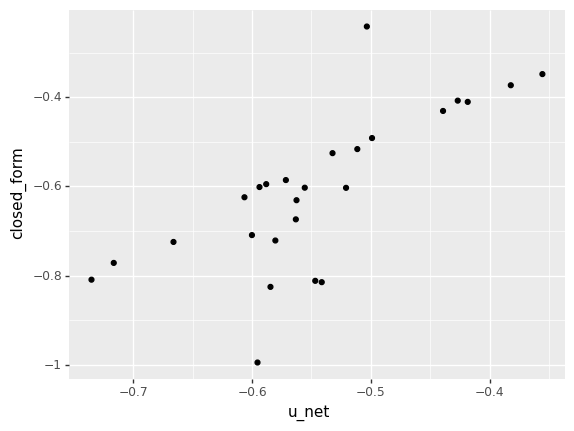

<ggplot: (8739381595937)>


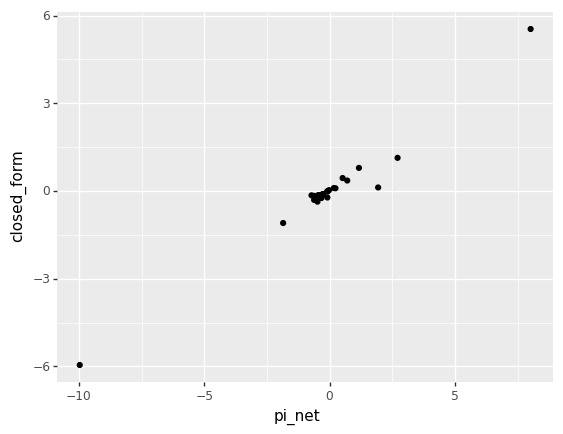

<ggplot: (8739381154673)>
Epoch 8799 - lr 0.0005 - key loss: 0.02368 - eqWeighted loss: 0.02368 - L1 loss 0.02368 - Max Loss 0.01398
internal loss: tensor(0.0140, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0097, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.6400, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.5342, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-10.1416, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1379, device='cuda:0') max abs d2u_dx2: tensor(0.4058, device='cuda:0') min abs d2u_dx2: tensor(0.0100, device='cuda:0')
mean du_dx: tensor(0.3289, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5332, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0944, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0269, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0694, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(4.1525

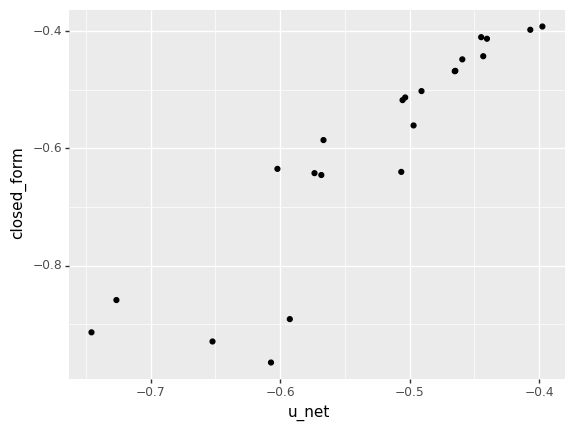

<ggplot: (8739486742501)>


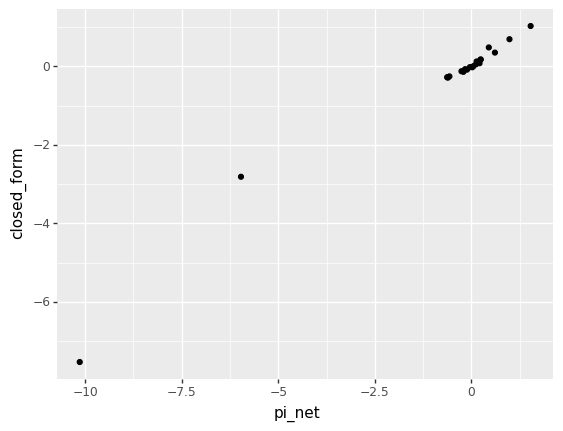

<ggplot: (8739497249445)>
Epoch 8999 - lr 0.0005 - key loss: 0.01823 - eqWeighted loss: 0.01823 - L1 loss 0.01823 - Max Loss 0.01207
internal loss: tensor(0.0121, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0062, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0346, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.0901, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-8.5218, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0761, device='cuda:0') max abs d2u_dx2: tensor(0.5795, device='cuda:0') min abs d2u_dx2: tensor(0.0021, device='cuda:0')
mean du_dx: tensor(0.2661, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4247, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0137, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0201, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0558, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0018,

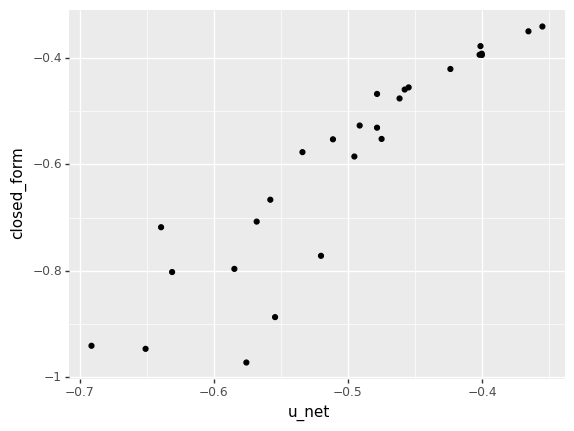

<ggplot: (8739381605953)>


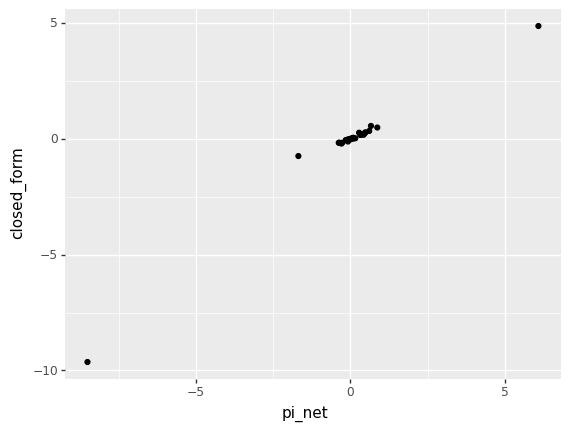

<ggplot: (8739487217213)>
Epoch 9199 - lr 0.0005 - key loss: 0.01067 - eqWeighted loss: 0.01067 - L1 loss 0.01067 - Max Loss 0.00879
internal loss: tensor(0.0088, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2587, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.2690, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.5391, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0447, device='cuda:0') max abs d2u_dx2: tensor(0.4636, device='cuda:0') min abs d2u_dx2: tensor(0.0076, device='cuda:0')
mean du_dx: tensor(0.1745, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3595, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0210, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0102, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0524, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003, d

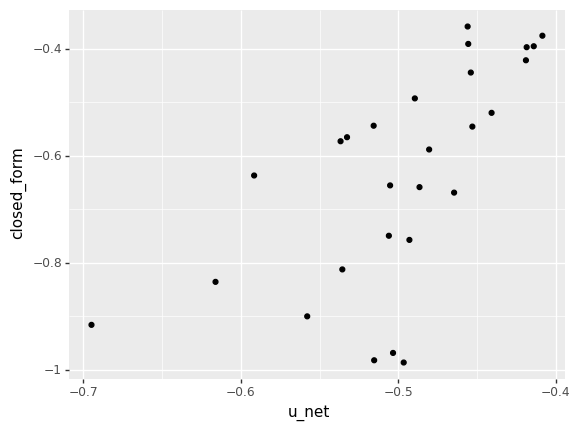

<ggplot: (8739381428361)>


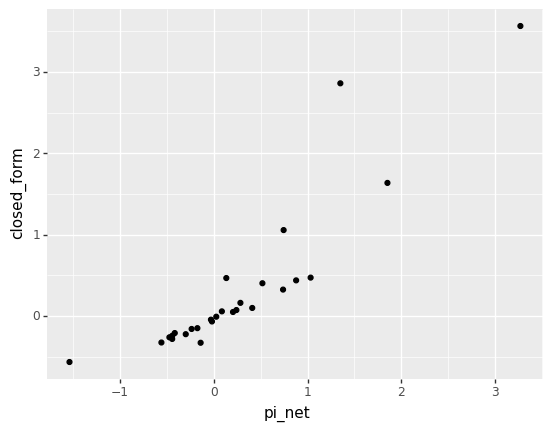

<ggplot: (8739486988809)>
Epoch 9399 - lr 0.0005 - key loss: 0.00988 - eqWeighted loss: 0.00988 - L1 loss 0.00988 - Max Loss 0.00578
internal loss: tensor(0.0058, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0041, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.2198, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.8876, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-10.5990, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1138, device='cuda:0') max abs d2u_dx2: tensor(0.6162, device='cuda:0') min abs d2u_dx2: tensor(0.0043, device='cuda:0')
mean du_dx: tensor(0.1513, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3588, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0081, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0199, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0496, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0006,

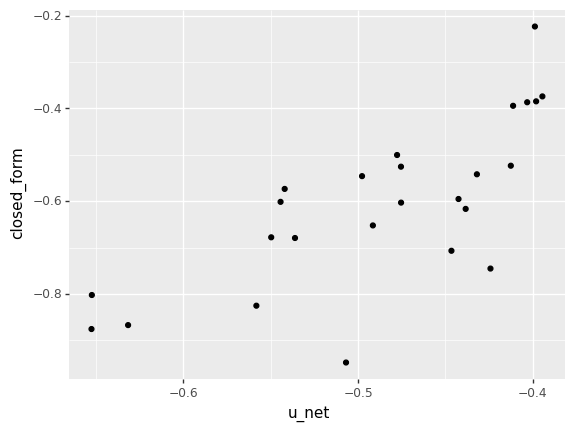

<ggplot: (8739381137081)>


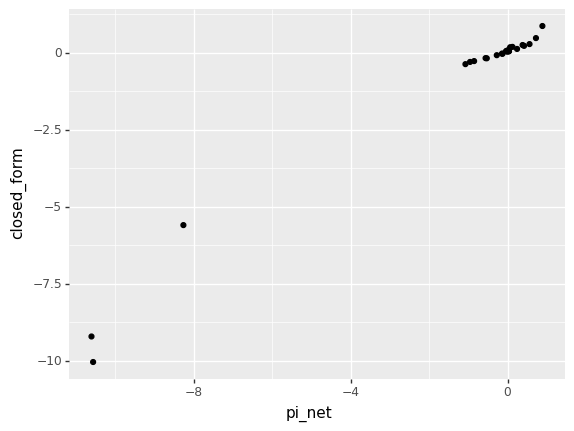

<ggplot: (8739487174085)>
Epoch 9599 - lr 0.0005 - key loss: 0.01785 - eqWeighted loss: 0.01785 - L1 loss 0.01785 - Max Loss 0.01335
internal loss: tensor(0.0133, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0045, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.4017, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.0750, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.8862, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0461, device='cuda:0') max abs d2u_dx2: tensor(0.6211, device='cuda:0') min abs d2u_dx2: tensor(0.0021, device='cuda:0')
mean du_dx: tensor(0.0784, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3061, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(1.0583e-05, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0101, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0432, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.000

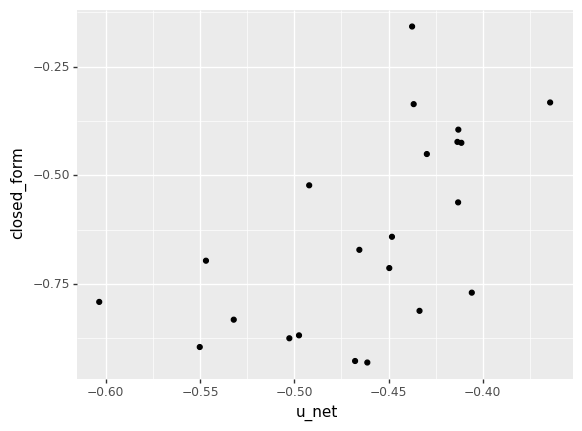

<ggplot: (8739487174105)>


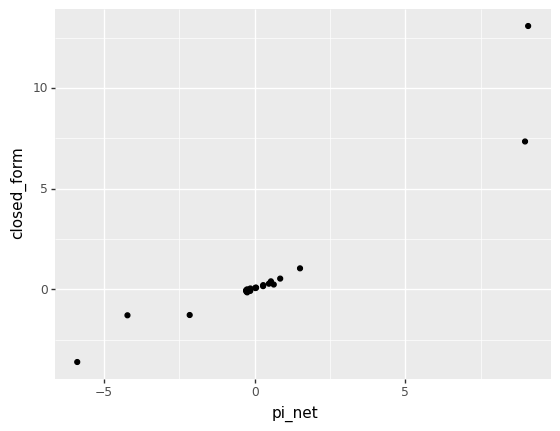

<ggplot: (8739381138601)>
Epoch 9799 - lr 0.0005 - key loss: 0.01423 - eqWeighted loss: 0.01423 - L1 loss 0.01423 - Max Loss 0.01056
internal loss: tensor(0.0106, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0037, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.9176, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(8.5238, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.2177, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1041, device='cuda:0') max abs d2u_dx2: tensor(0.5601, device='cuda:0') min abs d2u_dx2: tensor(0.0065, device='cuda:0')
mean du_dx: tensor(0.0795, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3030, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0029, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0116, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0372, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0007, d

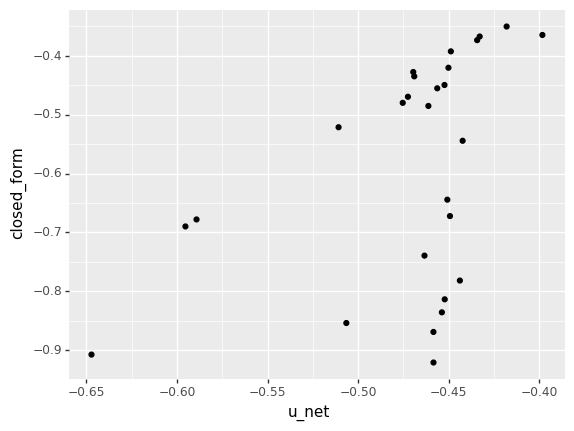

<ggplot: (8739379988189)>


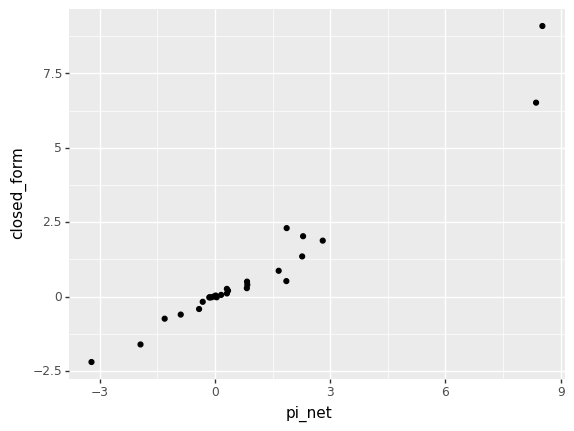

<ggplot: (8739486789445)>
Epoch 9999 - lr 0.0005 - key loss: 0.11323 - eqWeighted loss: 0.11323 - L1 loss 0.11323 - Max Loss 0.09999
internal loss: tensor(0.1000, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0132, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0840, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.3687, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-11.0153, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3487, device='cuda:0') max abs d2u_dx2: tensor(0.9259, device='cuda:0') min abs d2u_dx2: tensor(0.0244, device='cuda:0')
mean du_dx: tensor(0.5169, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8744, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1089, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0626, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2837, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0050

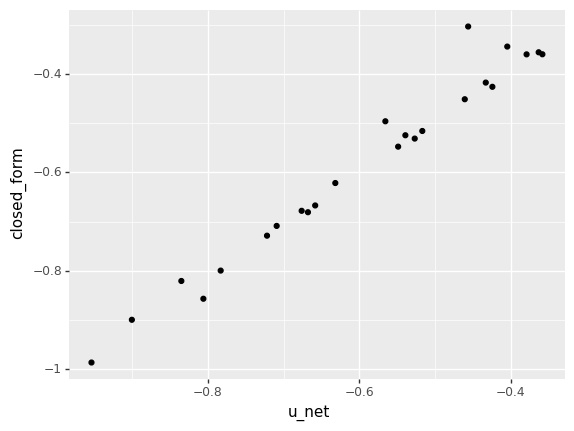

<ggplot: (8739379913629)>


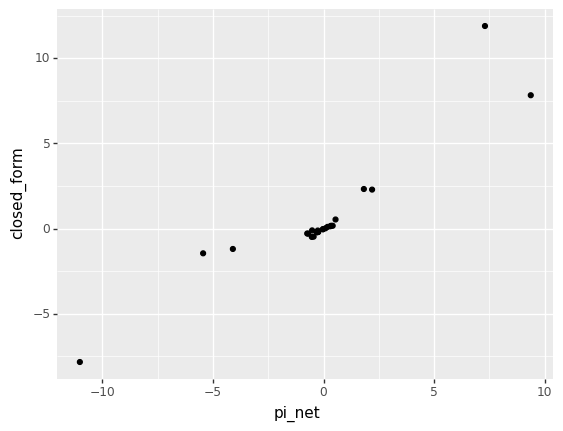

<ggplot: (8739486913217)>
Epoch 10199 - lr 0.0005 - key loss: 0.03773 - eqWeighted loss: 0.03773 - L1 loss 0.03773 - Max Loss 0.03278
internal loss: tensor(0.0328, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0049, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2595, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.6445, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.8752, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4087, device='cuda:0') max abs d2u_dx2: tensor(0.8661, device='cuda:0') min abs d2u_dx2: tensor(0.0206, device='cuda:0')
mean du_dx: tensor(0.5707, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9284, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2554, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0599, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2378, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0028

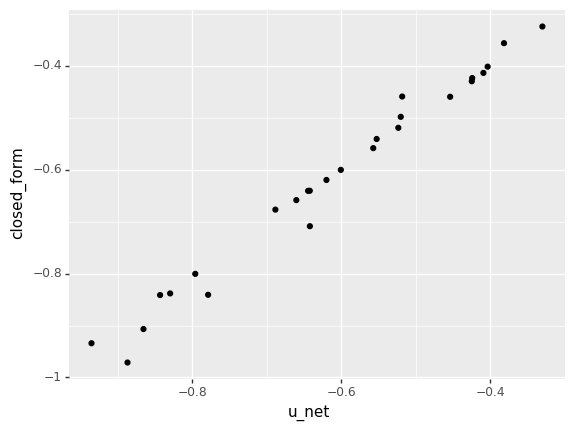

<ggplot: (8739381195497)>


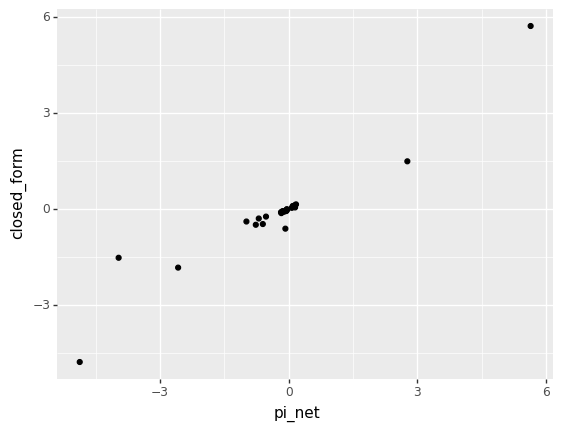

<ggplot: (8739487126773)>
Epoch 10399 - lr 0.0005 - key loss: 0.08812 - eqWeighted loss: 0.08812 - L1 loss 0.08812 - Max Loss 0.08164
internal loss: tensor(0.0816, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0065, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.5094, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.7914, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.2003, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3909, device='cuda:0') max abs d2u_dx2: tensor(0.8583, device='cuda:0') min abs d2u_dx2: tensor(0.0383, device='cuda:0')
mean du_dx: tensor(0.5717, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9159, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3034, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0806, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.4120, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0037

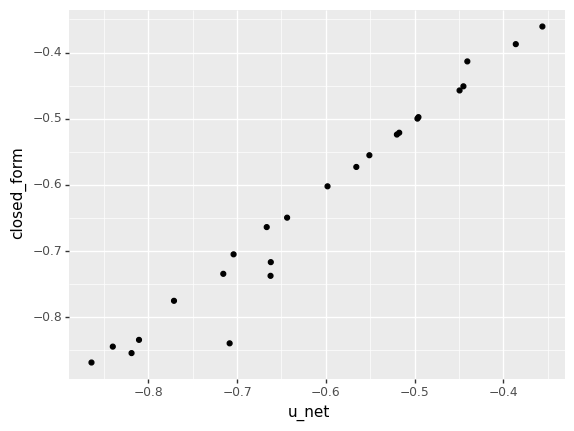

<ggplot: (8739381145145)>


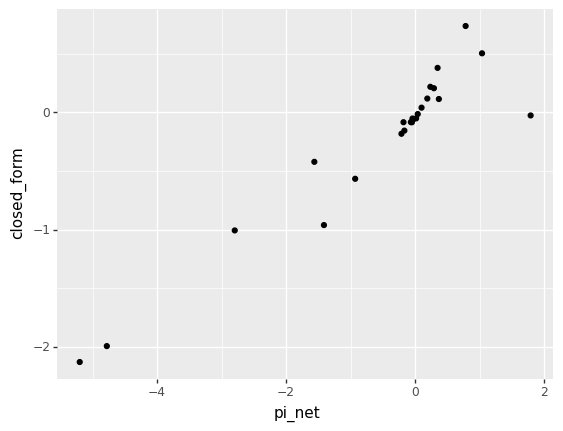

<ggplot: (8739379991537)>
Epoch 10599 - lr 0.0005 - key loss: 0.03959 - eqWeighted loss: 0.03959 - L1 loss 0.03959 - Max Loss 0.02992
internal loss: tensor(0.0299, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0097, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.5304, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.6400, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.5971, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4674, device='cuda:0') max abs d2u_dx2: tensor(0.9302, device='cuda:0') min abs d2u_dx2: tensor(0.0972, device='cuda:0')
mean du_dx: tensor(0.5954, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8414, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3146, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0532, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2674, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0087

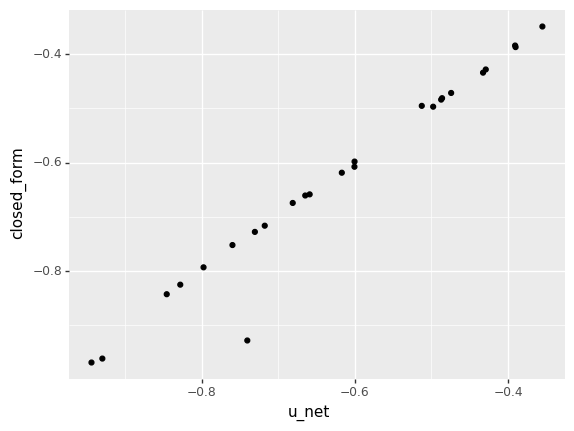

<ggplot: (8739379771605)>


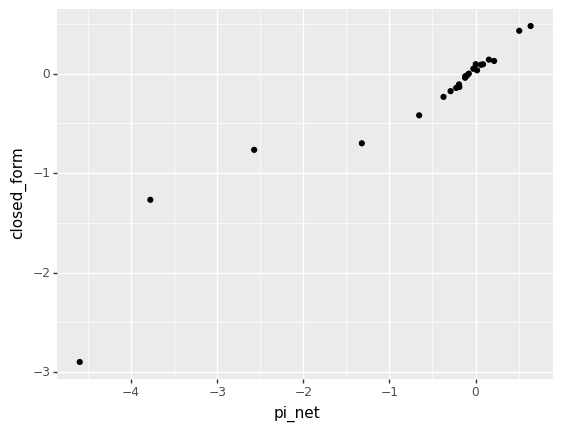

<ggplot: (8739381002233)>
Epoch 10799 - lr 0.0005 - key loss: 0.04833 - eqWeighted loss: 0.04833 - L1 loss 0.04833 - Max Loss 0.04555
internal loss: tensor(0.0455, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0028, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2242, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.4010, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.1742, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2657, device='cuda:0') max abs d2u_dx2: tensor(0.6496, device='cuda:0') min abs d2u_dx2: tensor(0.0477, device='cuda:0')
mean du_dx: tensor(0.5086, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9061, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2614, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0549, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1413, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0073

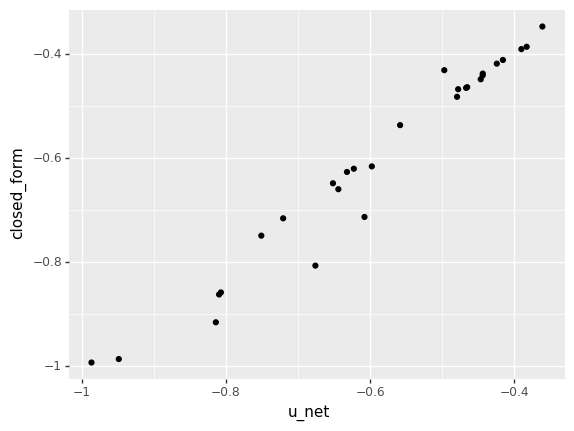

<ggplot: (8739486744209)>


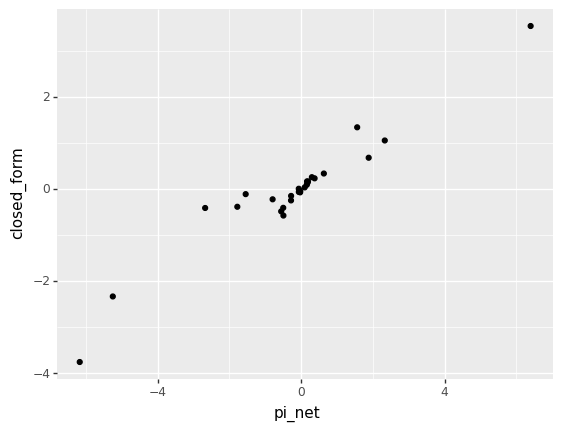

<ggplot: (8739379816553)>
Epoch 10999 - lr 0.0005 - key loss: 0.15724 - eqWeighted loss: 0.15724 - L1 loss 0.15724 - Max Loss 0.15048
internal loss: tensor(0.1505, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0068, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0478, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.8284, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-7.9096, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0296, device='cuda:0') max abs d2u_dx2: tensor(1.1588, device='cuda:0') min abs d2u_dx2: tensor(0.0203, device='cuda:0')
mean du_dx: tensor(0.4227, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8188, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0964, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0525, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2363, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0043, 

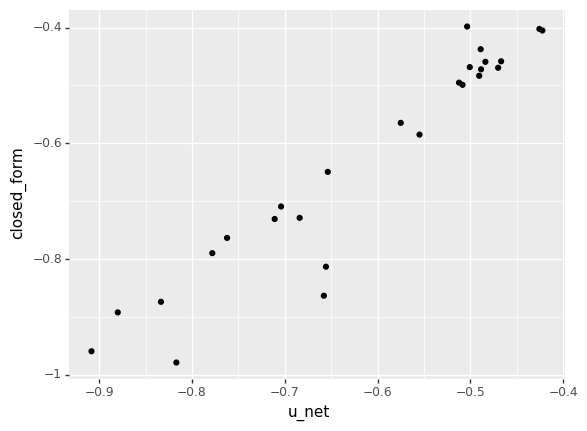

<ggplot: (8739377627033)>


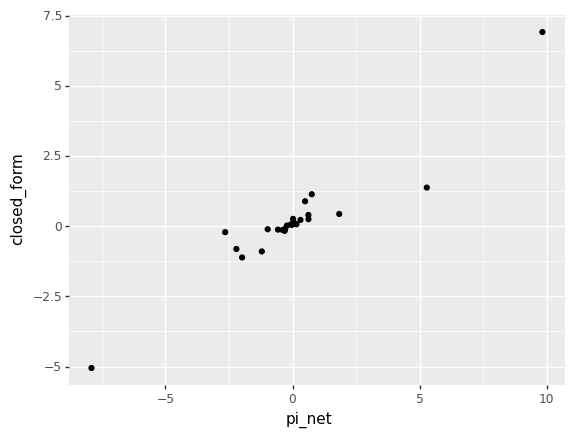

<ggplot: (8739379937073)>
Epoch 11199 - lr 0.0005 - key loss: 0.06692 - eqWeighted loss: 0.06692 - L1 loss 0.06692 - Max Loss 0.05735
internal loss: tensor(0.0573, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0096, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0835, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.9916, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.3527, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2176, device='cuda:0') max abs d2u_dx2: tensor(0.5367, device='cuda:0') min abs d2u_dx2: tensor(0.0012, device='cuda:0')
mean du_dx: tensor(0.4197, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6608, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1130, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0495, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1431, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0044

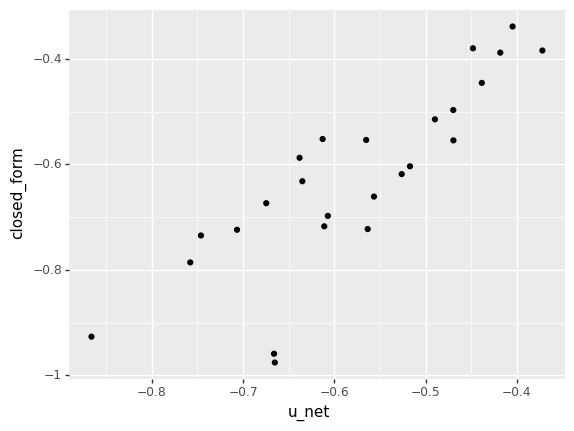

<ggplot: (8739377479685)>


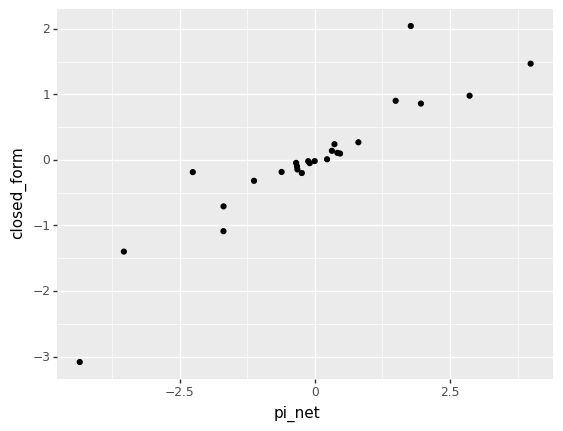

<ggplot: (8739381195433)>
Epoch 11399 - lr 0.0005 - key loss: 0.02317 - eqWeighted loss: 0.02317 - L1 loss 0.02317 - Max Loss 0.01945
internal loss: tensor(0.0195, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0037, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.3032, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.8271, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.0277, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0830, device='cuda:0') max abs d2u_dx2: tensor(0.3928, device='cuda:0') min abs d2u_dx2: tensor(0.0075, device='cuda:0')
mean du_dx: tensor(0.2121, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4216, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0016, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0138, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0805, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0007, 

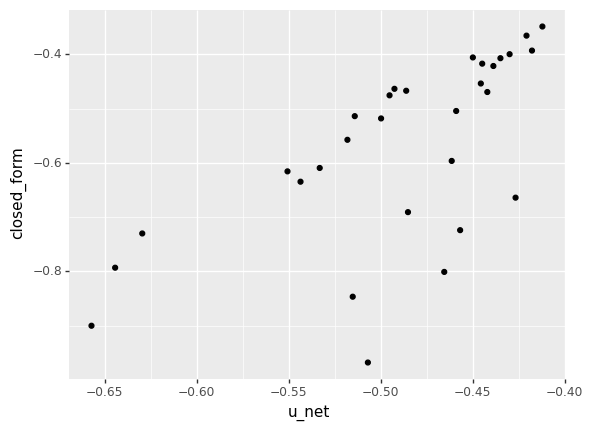

<ggplot: (8739377510589)>


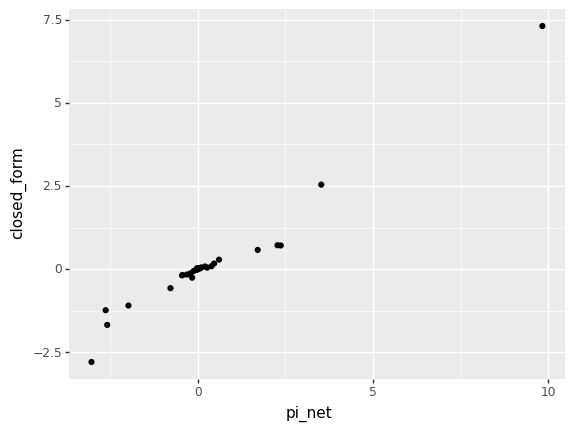

<ggplot: (8739377489457)>
Epoch 11599 - lr 0.0005 - key loss: 0.0091 - eqWeighted loss: 0.0091 - L1 loss 0.0091 - Max Loss 0.00659
internal loss: tensor(0.0066, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.7389, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.7706, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-11.4359, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0174, device='cuda:0') max abs d2u_dx2: tensor(0.2400, device='cuda:0') min abs d2u_dx2: tensor(0.0023, device='cuda:0')
mean du_dx: tensor(0.1198, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3243, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0134, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0090, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0769, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003, d

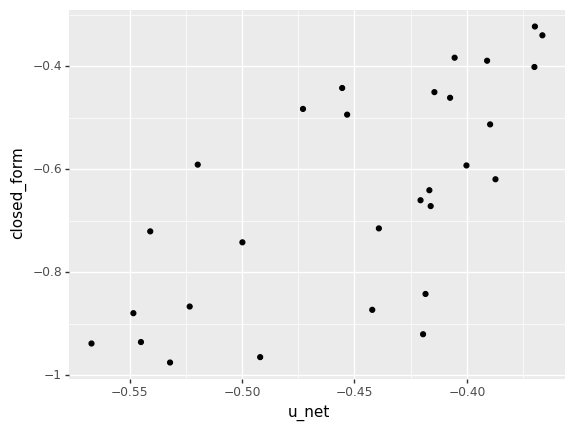

<ggplot: (8739377510569)>


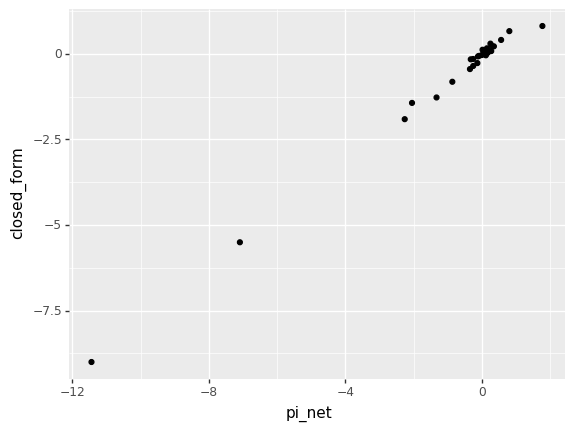

<ggplot: (8739381137073)>
Epoch 11799 - lr 0.0005 - key loss: 0.00532 - eqWeighted loss: 0.00532 - L1 loss 0.00532 - Max Loss 0.00371
internal loss: tensor(0.0037, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0048, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.7712, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.4744, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0268, device='cuda:0') max abs d2u_dx2: tensor(0.2404, device='cuda:0') min abs d2u_dx2: tensor(0.0031, device='cuda:0')
mean du_dx: tensor(0.1098, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.2062, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0106, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0065, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0210, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(9.1829e

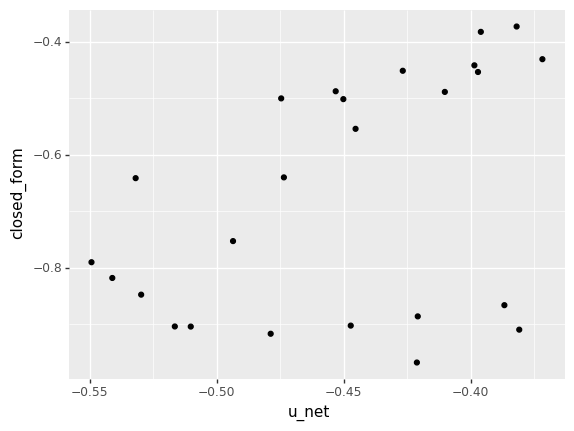

<ggplot: (8739377316161)>


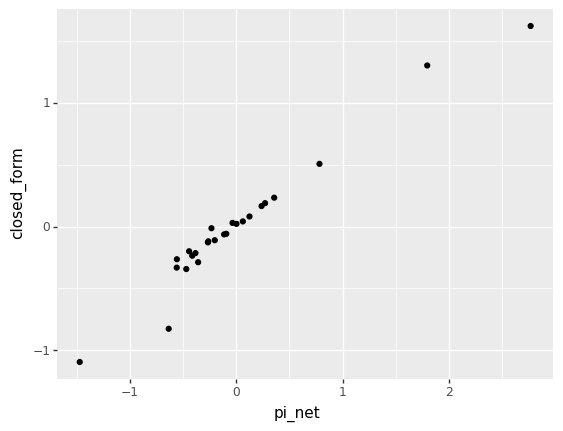

<ggplot: (8739381136989)>
Epoch 11999 - lr 0.0005 - key loss: 0.00543 - eqWeighted loss: 0.00543 - L1 loss 0.00543 - Max Loss 0.00359
internal loss: tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.4948, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(10.0575, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.7440, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0131, device='cuda:0') max abs d2u_dx2: tensor(0.2371, device='cuda:0') min abs d2u_dx2: tensor(0.0001, device='cuda:0')
mean du_dx: tensor(0.0950, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.2311, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0086, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0105, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0392, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0010,

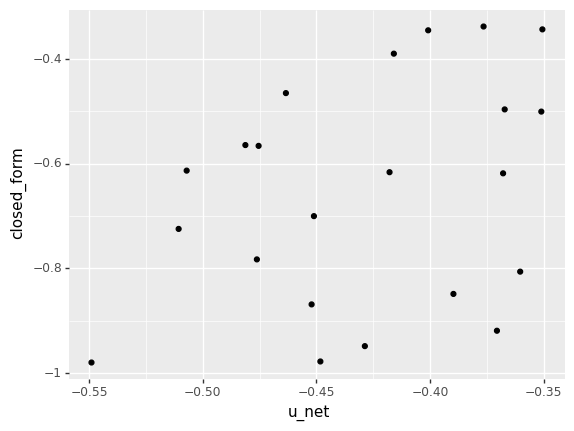

<ggplot: (8739377316305)>


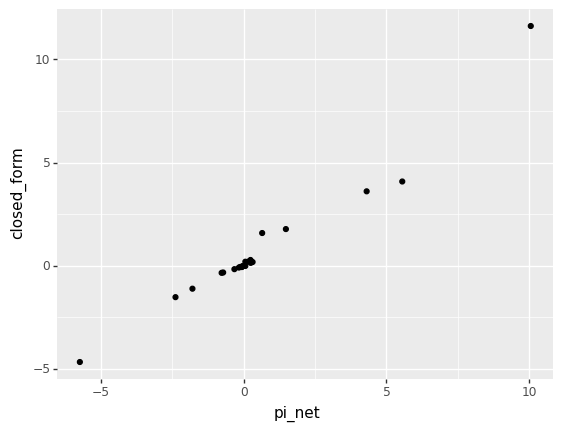

<ggplot: (8739377358973)>
Epoch 12199 - lr 0.0005 - key loss: 0.00516 - eqWeighted loss: 0.00516 - L1 loss 0.00516 - Max Loss 0.00266
internal loss: tensor(0.0027, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.3118, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.7460, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-0.7154, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0328, device='cuda:0') max abs d2u_dx2: tensor(0.2491, device='cuda:0') min abs d2u_dx2: tensor(0.0110, device='cuda:0')
mean du_dx: tensor(0.1050, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.1701, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0006, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0093, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0327, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(8.9837e-

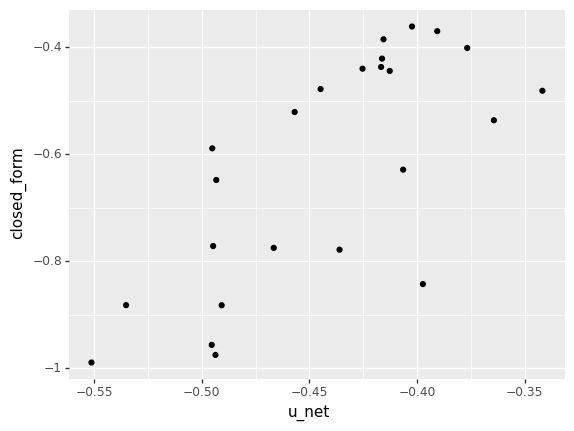

<ggplot: (8739377220269)>


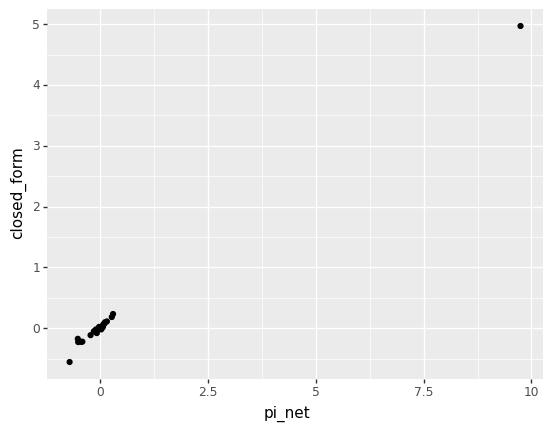

<ggplot: (8739377316137)>
Epoch 12399 - lr 0.0005 - key loss: 0.00336 - eqWeighted loss: 0.00336 - L1 loss 0.00336 - Max Loss 0.00218
internal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0022, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.3039, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.1609, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-11.7922, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0213, device='cuda:0') max abs d2u_dx2: tensor(0.1794, device='cuda:0') min abs d2u_dx2: tensor(0.0005, device='cuda:0')
mean du_dx: tensor(0.0708, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.2004, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0038, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0051, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0193, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0002

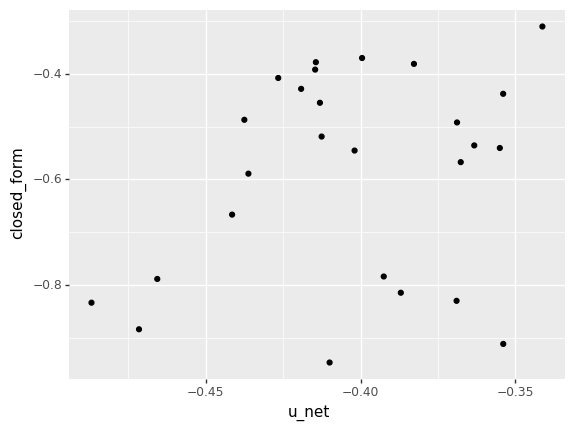

<ggplot: (8739377162721)>


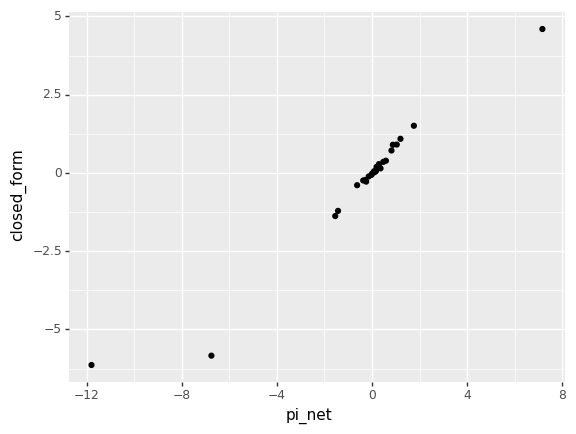

<ggplot: (8739377228337)>
Epoch 12599 - lr 0.0005 - key loss: 0.00438 - eqWeighted loss: 0.00438 - L1 loss 0.00438 - Max Loss 0.0026
internal loss: tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0681, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.5369, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.1655, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0124, device='cuda:0') max abs d2u_dx2: tensor(0.1637, device='cuda:0') min abs d2u_dx2: tensor(0.0083, device='cuda:0')
mean du_dx: tensor(0.0850, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.1707, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0143, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0077, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0214, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003, 

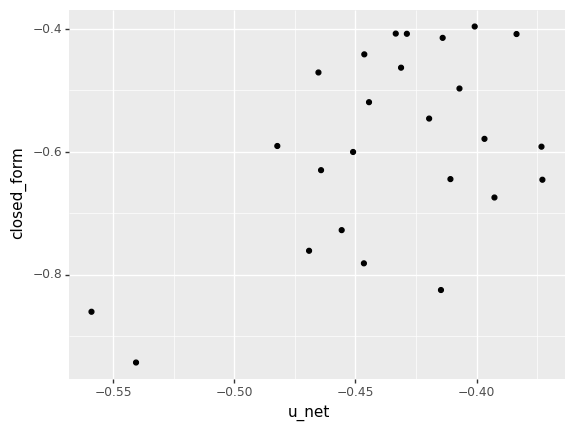

<ggplot: (8739377162669)>


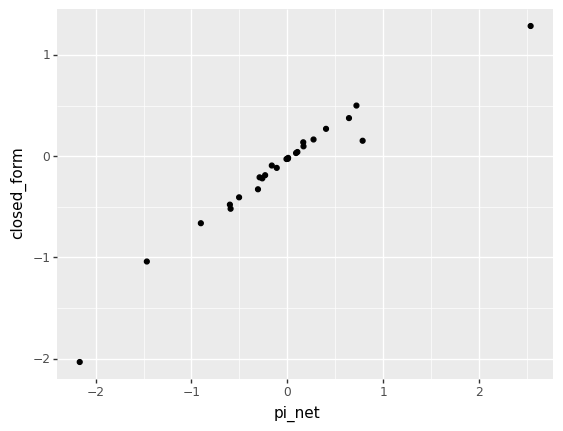

<ggplot: (8739379927725)>
Epoch 12799 - lr 0.0005 - key loss: 0.00317 - eqWeighted loss: 0.00317 - L1 loss 0.00317 - Max Loss 0.00164
internal loss: tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.3180, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.9550, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.7625, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0099, device='cuda:0') max abs d2u_dx2: tensor(0.1212, device='cuda:0') min abs d2u_dx2: tensor(0.0005, device='cuda:0')
mean du_dx: tensor(0.0794, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.1895, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0077, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0067, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0256, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003

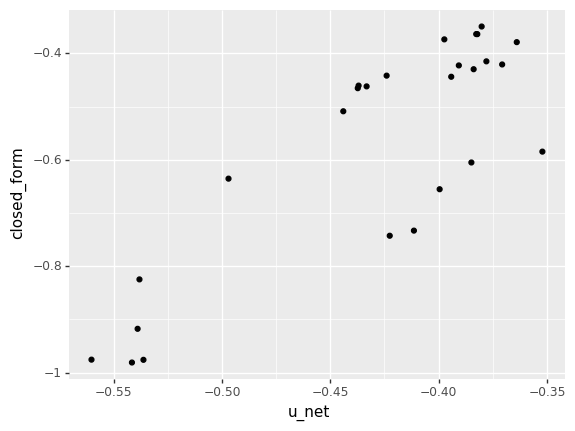

<ggplot: (8739377045021)>


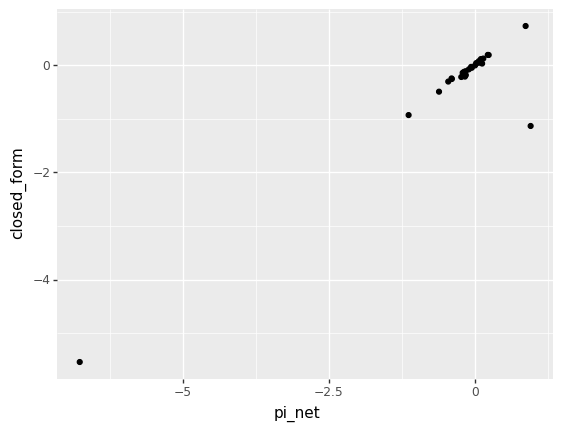

<ggplot: (8739377037937)>
Epoch 12999 - lr 0.0005 - key loss: 0.00352 - eqWeighted loss: 0.00352 - L1 loss 0.00352 - Max Loss 0.00202
internal loss: tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0380, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.2598, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-12.5989, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0095, device='cuda:0') max abs d2u_dx2: tensor(0.1719, device='cuda:0') min abs d2u_dx2: tensor(0.0020, device='cuda:0')
mean du_dx: tensor(0.0779, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.1756, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0125, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0053, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0286, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(9.157

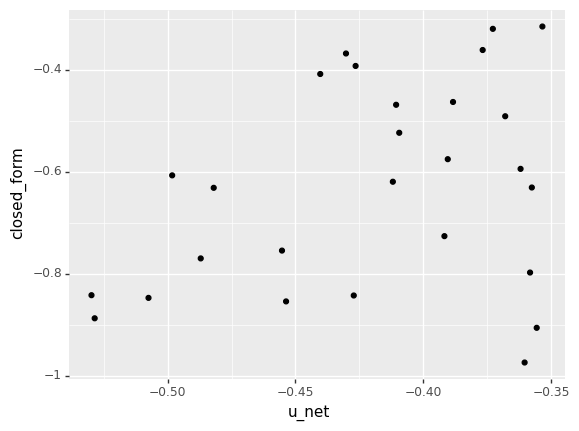

<ggplot: (8739377393173)>


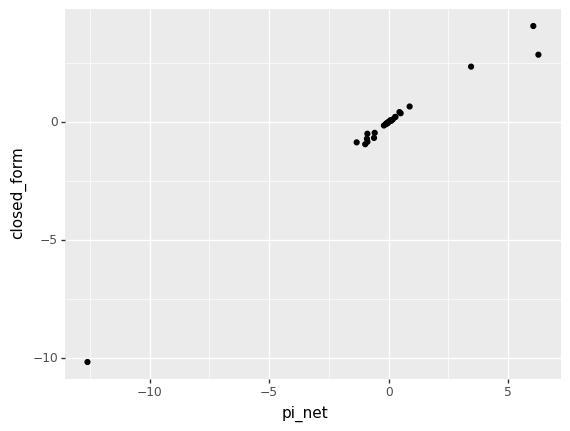

<ggplot: (8739377393173)>
Epoch 13199 - lr 0.0005 - key loss: 0.00186 - eqWeighted loss: 0.00186 - L1 loss 0.00186 - Max Loss 0.0012
internal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.6089, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.0259, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.8709, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0102, device='cuda:0') max abs d2u_dx2: tensor(0.1315, device='cuda:0') min abs d2u_dx2: tensor(0.0005, device='cuda:0')
mean du_dx: tensor(0.0572, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.1625, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0013, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0036, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0260, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0001,

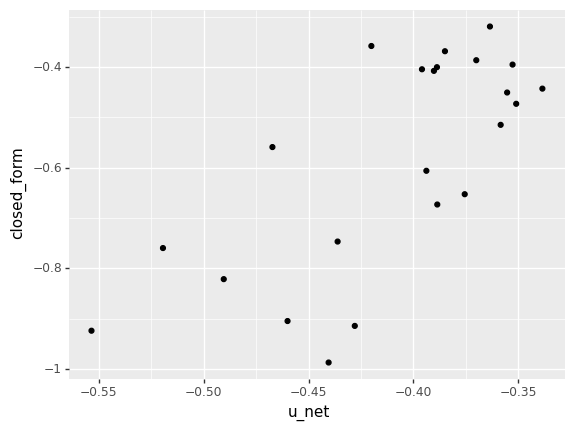

<ggplot: (8739377393277)>


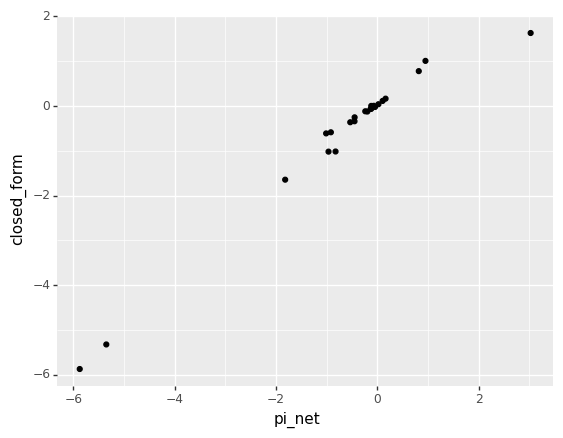

<ggplot: (8739377010429)>
Epoch 13399 - lr 0.0005 - key loss: 0.1028 - eqWeighted loss: 0.1028 - L1 loss 0.1028 - Max Loss 0.07141
internal loss: tensor(0.0714, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0314, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0915, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(11.3002, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-9.7107, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0170, device='cuda:0') max abs d2u_dx2: tensor(0.6497, device='cuda:0') min abs d2u_dx2: tensor(0.0474, device='cuda:0')
mean du_dx: tensor(0.4248, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6724, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2195, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0679, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1280, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0125, d

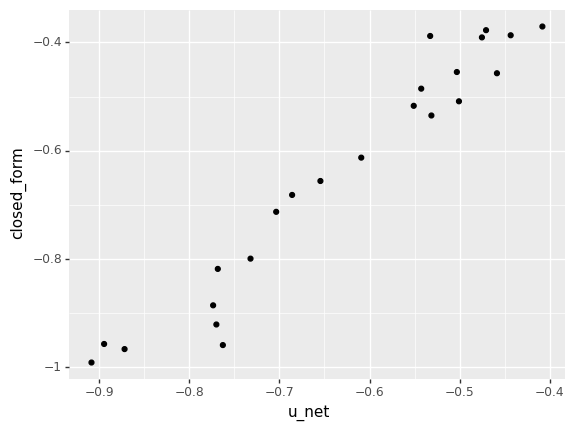

<ggplot: (8739377318361)>


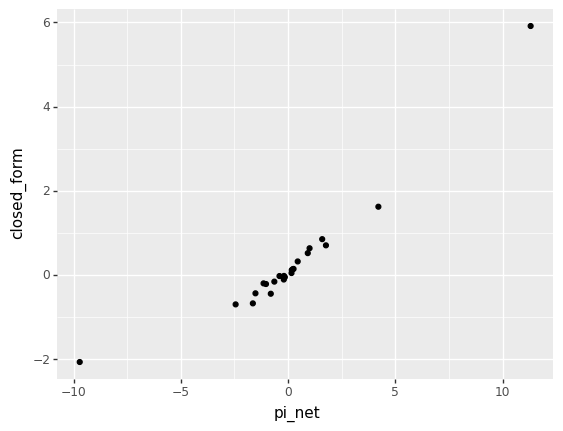

<ggplot: (8739377393265)>
Epoch 13599 - lr 0.0005 - key loss: 0.08973 - eqWeighted loss: 0.08973 - L1 loss 0.08973 - Max Loss 0.08082
internal loss: tensor(0.0808, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0089, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(11.3050, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.9197, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3456, device='cuda:0') max abs d2u_dx2: tensor(0.7037, device='cuda:0') min abs d2u_dx2: tensor(0.1172, device='cuda:0')
mean du_dx: tensor(0.4847, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8163, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1700, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0494, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1512, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.002

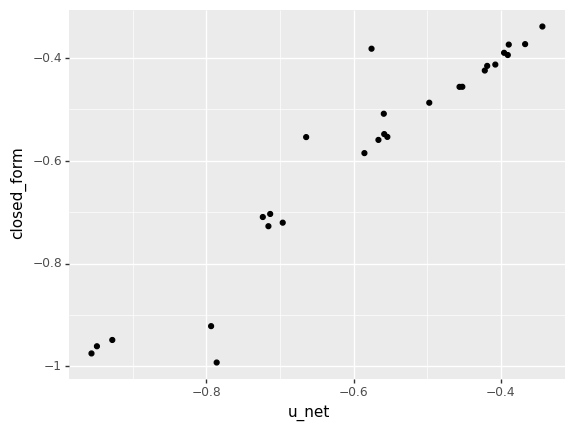

<ggplot: (8739376808397)>


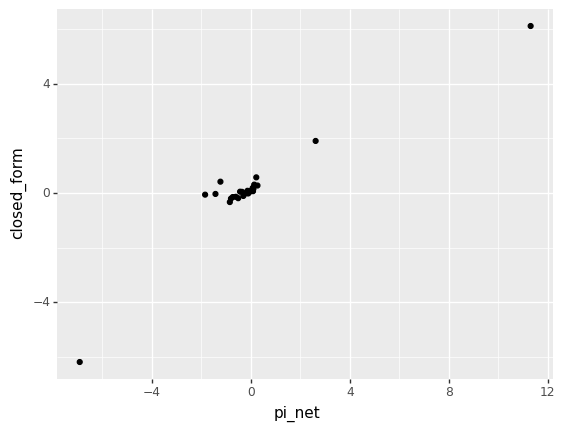

<ggplot: (8739377037041)>
Epoch 13799 - lr 0.0005 - key loss: 0.04928 - eqWeighted loss: 0.04928 - L1 loss 0.04928 - Max Loss 0.03691
internal loss: tensor(0.0369, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0124, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1207, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.5509, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.7121, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3218, device='cuda:0') max abs d2u_dx2: tensor(0.7127, device='cuda:0') min abs d2u_dx2: tensor(0.0407, device='cuda:0')
mean du_dx: tensor(0.5299, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7285, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2556, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0416, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1152, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0088,

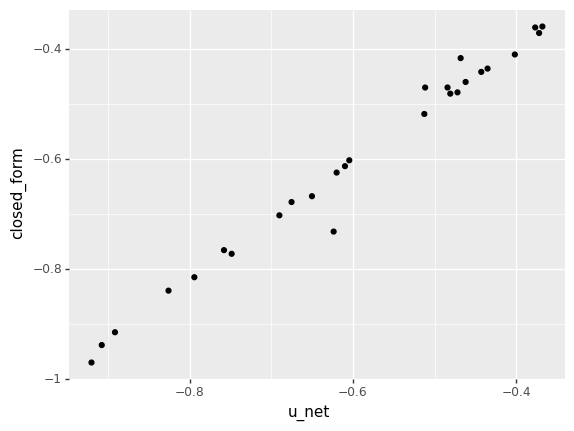

<ggplot: (8739376785549)>


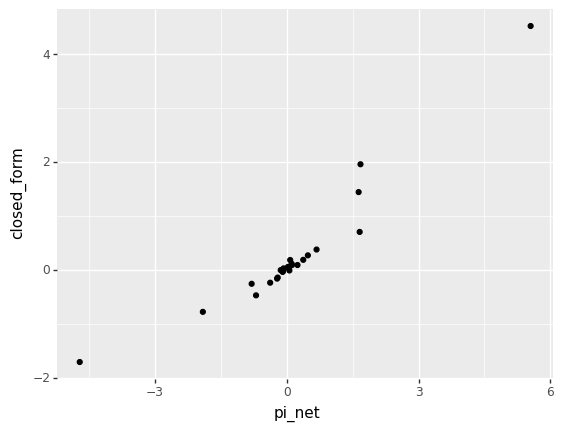

<ggplot: (8739379815653)>
Epoch 13999 - lr 0.0005 - key loss: 0.61753 - eqWeighted loss: 0.61753 - L1 loss 0.61753 - Max Loss 0.59726
internal loss: tensor(0.5973, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0203, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-2.8795, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(10.9981, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-11.6582, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1503, device='cuda:0') max abs d2u_dx2: tensor(0.9571, device='cuda:0') min abs d2u_dx2: tensor(0.0171, device='cuda:0')
mean du_dx: tensor(0.3716, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6620, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0341, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.1450, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5567, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.00

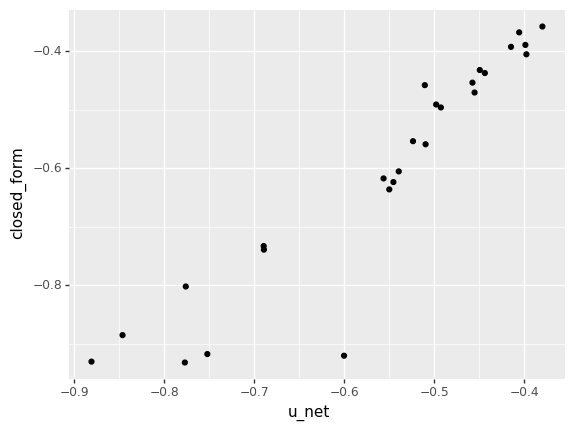

<ggplot: (8739377366925)>


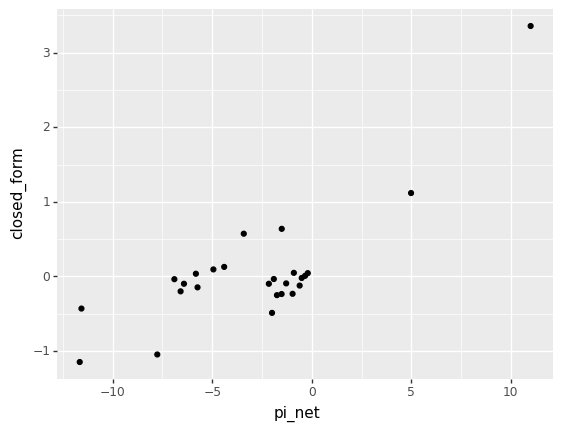

<ggplot: (8739377358913)>
Epoch 14199 - lr 0.0005 - key loss: 0.0175 - eqWeighted loss: 0.0175 - L1 loss 0.0175 - Max Loss 0.01116
internal loss: tensor(0.0112, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0063, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0597, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.7649, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-10.3115, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4832, device='cuda:0') max abs d2u_dx2: tensor(1.0753, device='cuda:0') min abs d2u_dx2: tensor(0.0138, device='cuda:0')
mean du_dx: tensor(0.4273, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7750, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0278, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0269, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0647, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0060, 

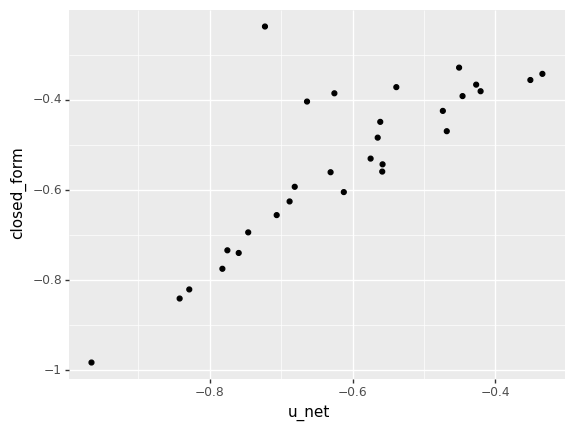

<ggplot: (8739376667361)>


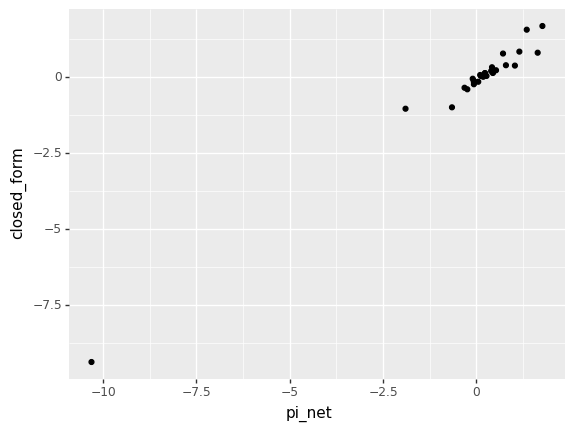

<ggplot: (8739379977429)>
Epoch 14399 - lr 0.0005 - key loss: 0.06242 - eqWeighted loss: 0.06242 - L1 loss 0.06242 - Max Loss 0.04928
internal loss: tensor(0.0493, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0131, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2743, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.1407, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.5041, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2157, device='cuda:0') max abs d2u_dx2: tensor(0.7599, device='cuda:0') min abs d2u_dx2: tensor(0.0138, device='cuda:0')
mean du_dx: tensor(0.5253, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7678, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1477, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0554, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1933, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0001

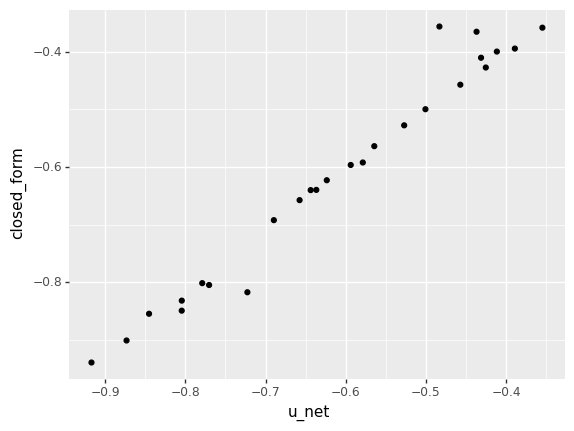

<ggplot: (8739376652437)>


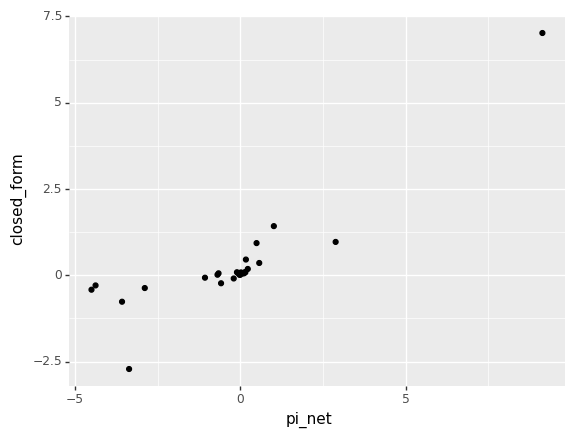

<ggplot: (8739376791077)>
Epoch 14599 - lr 0.0005 - key loss: 0.10344 - eqWeighted loss: 0.10344 - L1 loss 0.10344 - Max Loss 0.09653
internal loss: tensor(0.0965, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0069, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0707, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(11.7164, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-9.9050, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1654, device='cuda:0') max abs d2u_dx2: tensor(0.8524, device='cuda:0') min abs d2u_dx2: tensor(0.0317, device='cuda:0')
mean du_dx: tensor(0.5257, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8391, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2988, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0984, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.4302, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.007

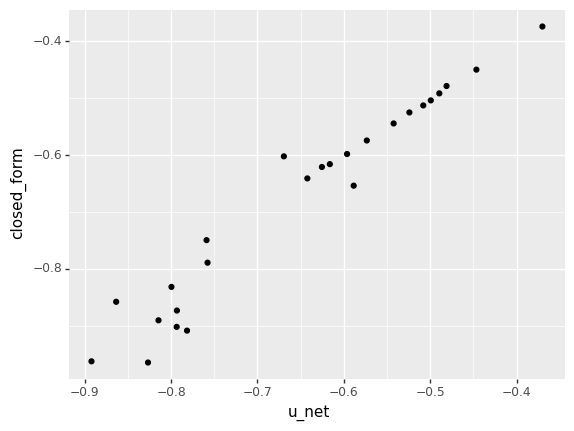

<ggplot: (8739376605945)>


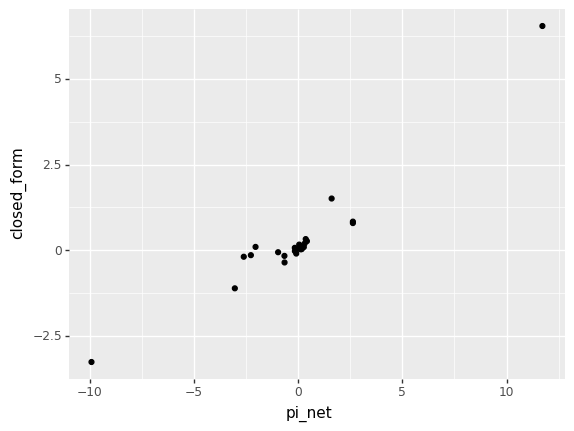

<ggplot: (8739376674533)>
Epoch 14799 - lr 0.0005 - key loss: 0.11077 - eqWeighted loss: 0.11077 - L1 loss 0.11077 - Max Loss 0.1054
internal loss: tensor(0.1054, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0054, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1237, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.3364, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.9527, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2467, device='cuda:0') max abs d2u_dx2: tensor(0.7718, device='cuda:0') min abs d2u_dx2: tensor(0.0070, device='cuda:0')
mean du_dx: tensor(0.5501, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8237, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2756, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0530, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1865, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(9.6441e-

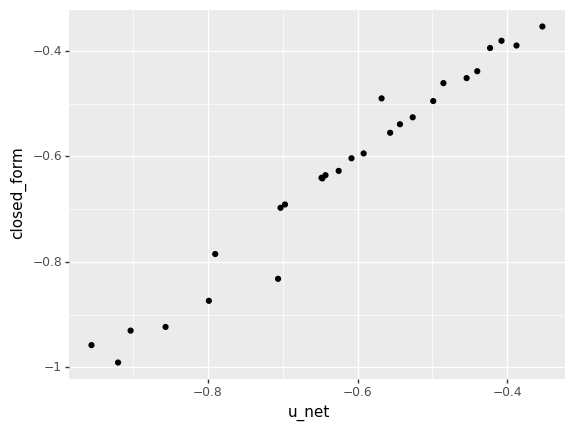

<ggplot: (8739376501349)>


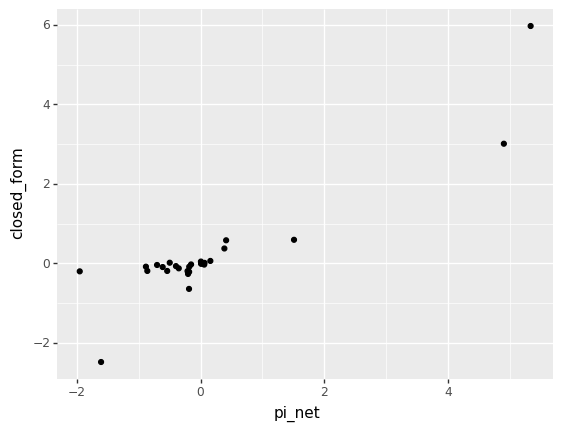

<ggplot: (8739377396841)>
Epoch 14999 - lr 0.0005 - key loss: 0.08619 - eqWeighted loss: 0.08619 - L1 loss 0.08619 - Max Loss 0.08111
internal loss: tensor(0.0811, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0051, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1121, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.6744, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.0909, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2678, device='cuda:0') max abs d2u_dx2: tensor(0.7065, device='cuda:0') min abs d2u_dx2: tensor(0.2255, device='cuda:0')
mean du_dx: tensor(0.4517, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8715, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1747, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0457, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2237, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(1.5816e

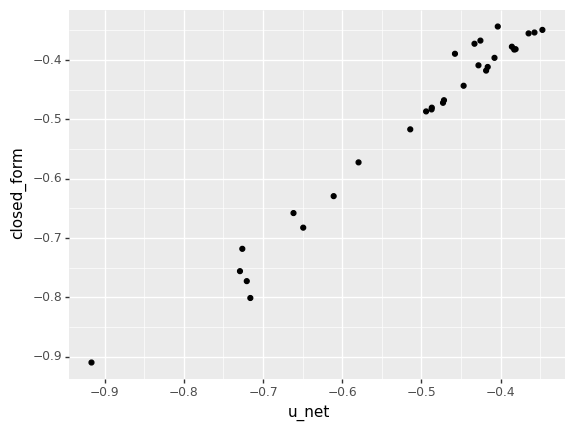

<ggplot: (8739376434285)>


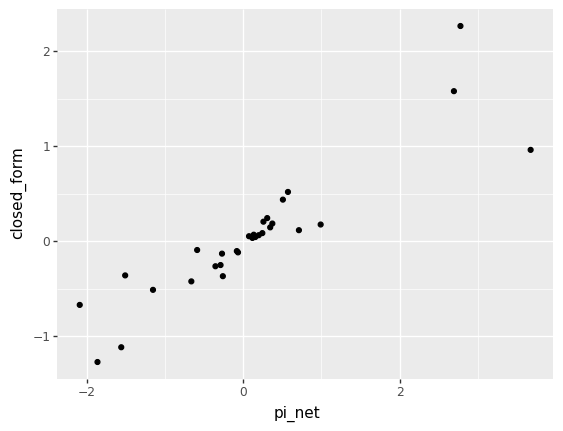

<ggplot: (8739376485421)>
Epoch 15199 - lr 0.0005 - key loss: 0.04701 - eqWeighted loss: 0.04701 - L1 loss 0.04701 - Max Loss 0.04183
internal loss: tensor(0.0418, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0052, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2673, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.0733, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.4319, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3775, device='cuda:0') max abs d2u_dx2: tensor(0.6440, device='cuda:0') min abs d2u_dx2: tensor(0.0300, device='cuda:0')
mean du_dx: tensor(0.5266, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7841, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2657, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0586, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1512, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0154

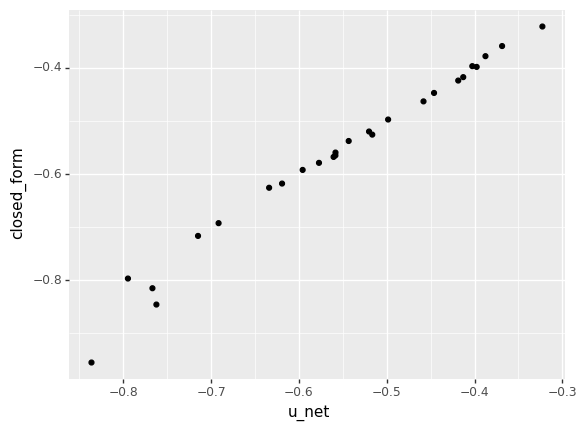

<ggplot: (8739377162629)>


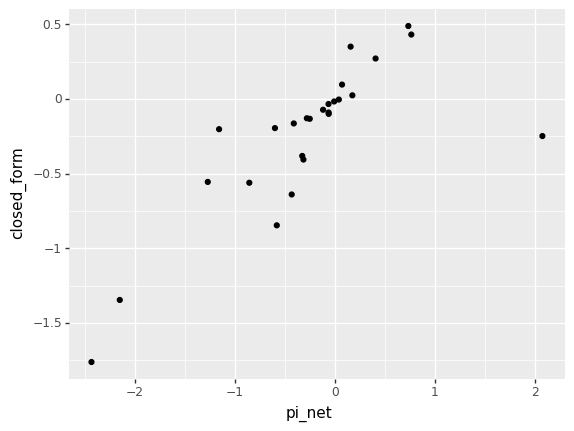

<ggplot: (8739376533969)>
Epoch 15399 - lr 0.0005 - key loss: 0.09504 - eqWeighted loss: 0.09504 - L1 loss 0.09504 - Max Loss 0.076
internal loss: tensor(0.0760, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0190, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2754, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.1002, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.0648, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2309, device='cuda:0') max abs d2u_dx2: tensor(0.7721, device='cuda:0') min abs d2u_dx2: tensor(0.0112, device='cuda:0')
mean du_dx: tensor(0.4301, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6211, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2805, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0640, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2925, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0027, 

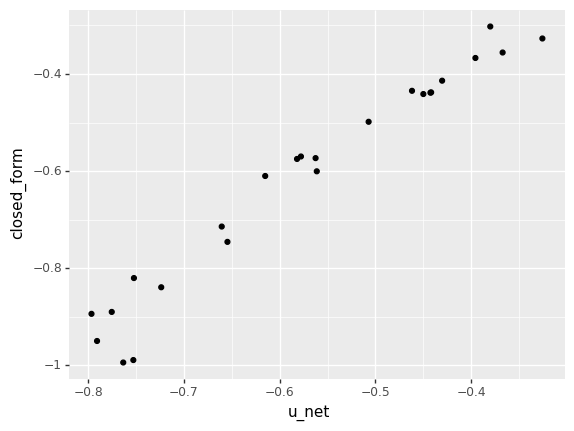

<ggplot: (8739376488885)>


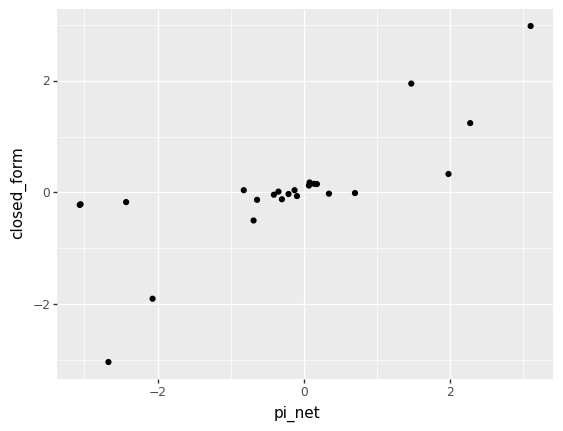

<ggplot: (8739376533937)>
Epoch 15599 - lr 0.0005 - key loss: 0.0427 - eqWeighted loss: 0.0427 - L1 loss 0.0427 - Max Loss 0.03145
internal loss: tensor(0.0315, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0113, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.3810, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.7275, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.3307, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2620, device='cuda:0') max abs d2u_dx2: tensor(0.7381, device='cuda:0') min abs d2u_dx2: tensor(0.0566, device='cuda:0')
mean du_dx: tensor(0.5353, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8276, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2610, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0594, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2413, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0064, d

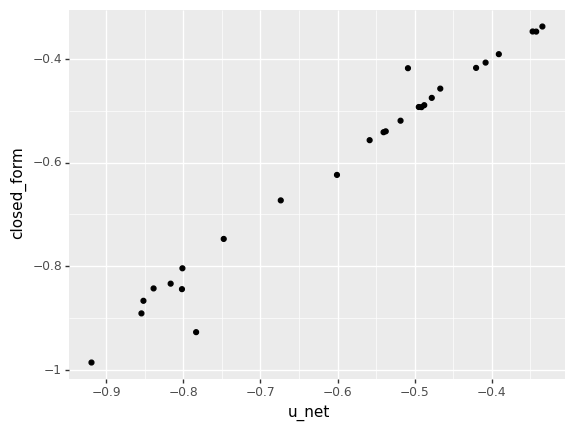

<ggplot: (8739376269901)>


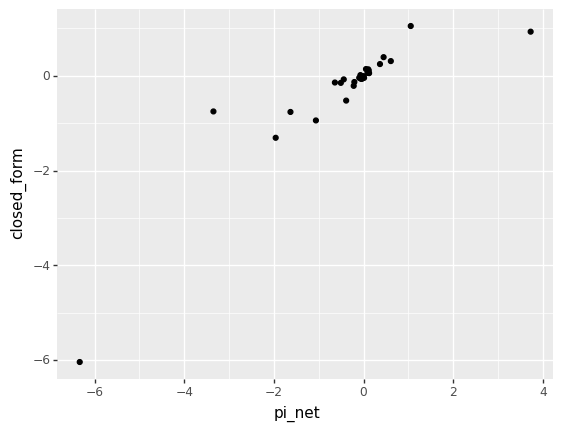

<ggplot: (8739376720857)>
Epoch 15799 - lr 0.0005 - key loss: 0.07558 - eqWeighted loss: 0.07558 - L1 loss 0.07558 - Max Loss 0.07094
internal loss: tensor(0.0709, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0046, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.7119, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.5756, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-13.2207, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3695, device='cuda:0') max abs d2u_dx2: tensor(0.9174, device='cuda:0') min abs d2u_dx2: tensor(0.0371, device='cuda:0')
mean du_dx: tensor(0.5564, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8531, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2198, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0908, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3894, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.003

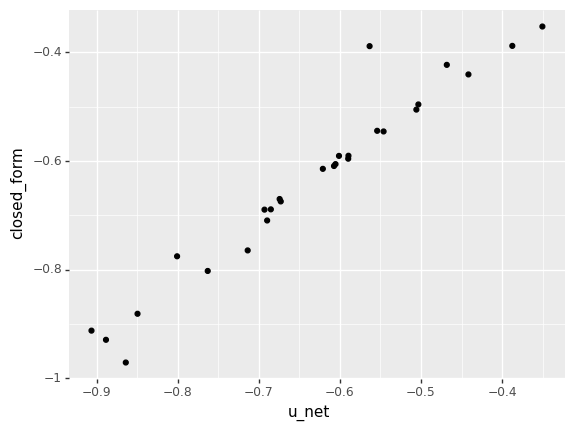

<ggplot: (8739376277081)>


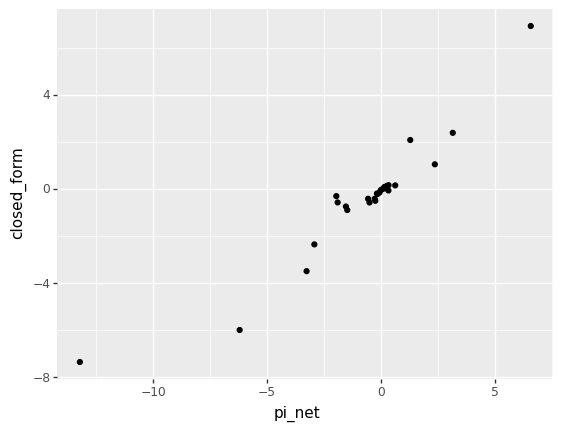

<ggplot: (8739376269861)>
Epoch 15999 - lr 0.0005 - key loss: 0.03131 - eqWeighted loss: 0.03131 - L1 loss 0.03131 - Max Loss 0.02792
internal loss: tensor(0.0279, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0034, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.5627, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.7132, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-8.4219, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3360, device='cuda:0') max abs d2u_dx2: tensor(0.9186, device='cuda:0') min abs d2u_dx2: tensor(0.0194, device='cuda:0')
mean du_dx: tensor(0.5970, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8869, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3770, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0709, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5163, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0133

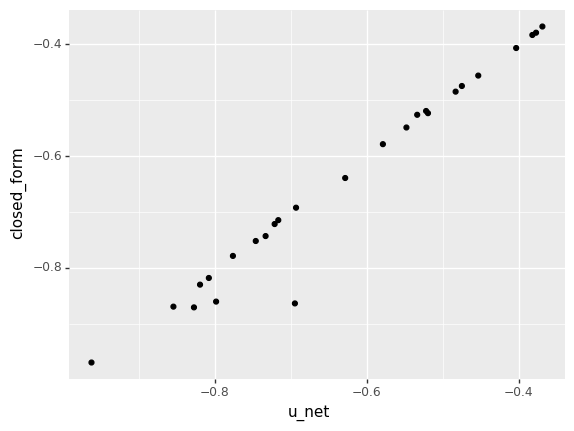

<ggplot: (8739376436101)>


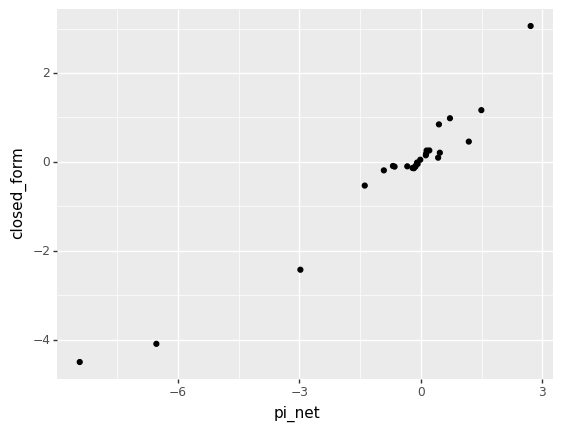

<ggplot: (8739376720757)>
Epoch 16199 - lr 0.0005 - key loss: 0.05225 - eqWeighted loss: 0.05225 - L1 loss 0.05225 - Max Loss 0.04684
internal loss: tensor(0.0468, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0054, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.4624, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.8223, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.9777, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4172, device='cuda:0') max abs d2u_dx2: tensor(0.9245, device='cuda:0') min abs d2u_dx2: tensor(0.0757, device='cuda:0')
mean du_dx: tensor(0.5190, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8797, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2199, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0550, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2835, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0049,

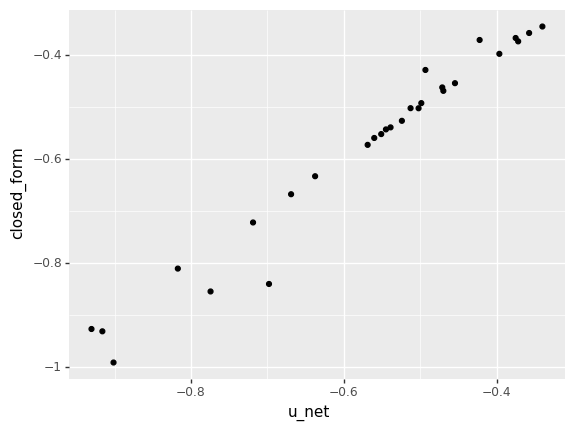

<ggplot: (8739376442717)>


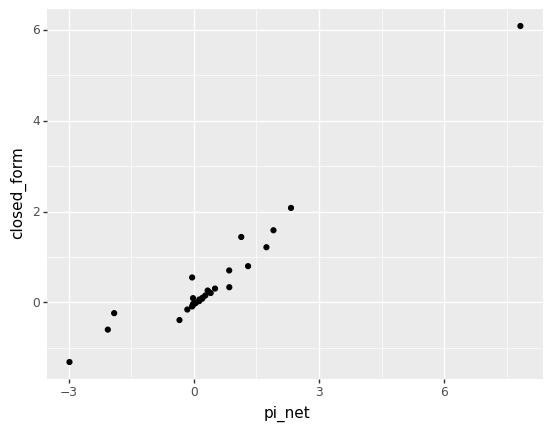

<ggplot: (8739376595921)>
Epoch 16399 - lr 0.0005 - key loss: 0.06374 - eqWeighted loss: 0.06374 - L1 loss 0.06374 - Max Loss 0.05833
internal loss: tensor(0.0583, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0054, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1044, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.5253, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.4825, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4332, device='cuda:0') max abs d2u_dx2: tensor(0.9689, device='cuda:0') min abs d2u_dx2: tensor(0.0473, device='cuda:0')
mean du_dx: tensor(0.5443, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9090, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2011, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0452, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1317, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0024

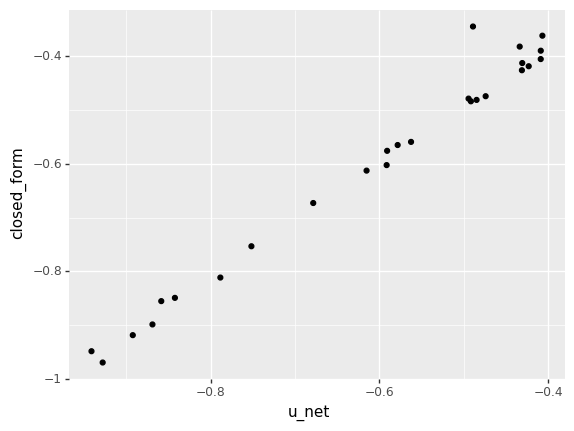

<ggplot: (8739376442873)>


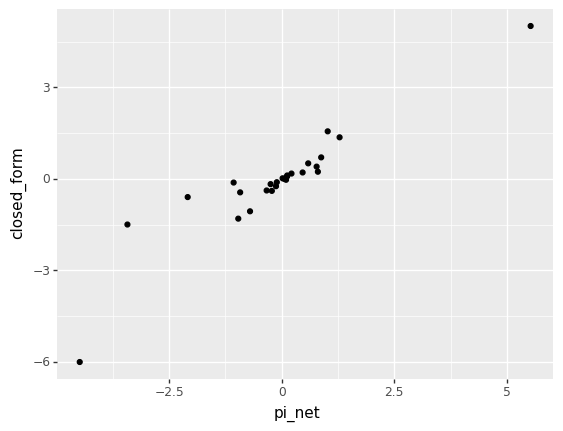

<ggplot: (8739376206653)>
Epoch 16599 - lr 0.0005 - key loss: 0.04463 - eqWeighted loss: 0.04463 - L1 loss 0.04463 - Max Loss 0.04208
internal loss: tensor(0.0421, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.3382, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(4.6917, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.2712, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5019, device='cuda:0') max abs d2u_dx2: tensor(1.0666, device='cuda:0') min abs d2u_dx2: tensor(0.2915, device='cuda:0')
mean du_dx: tensor(0.5052, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8580, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1420, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0347, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1718, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0004,

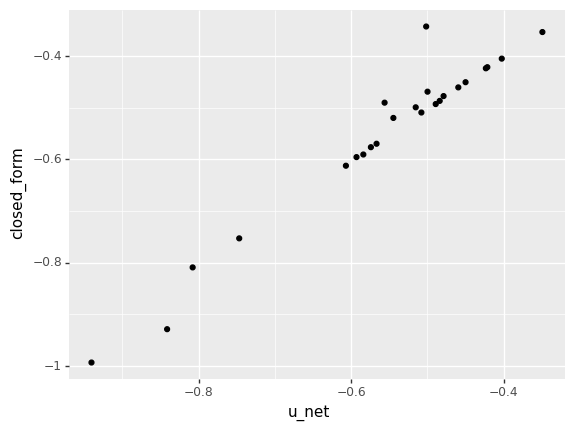

<ggplot: (8739376012697)>


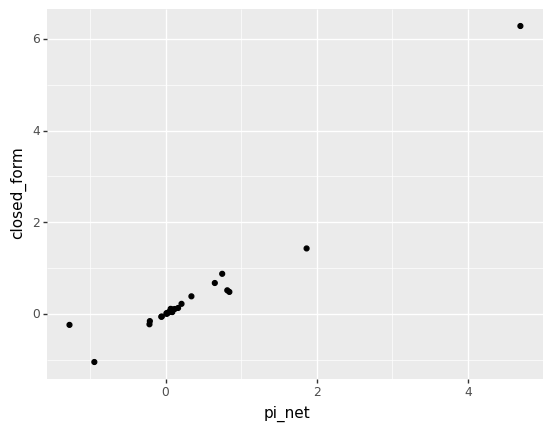

<ggplot: (8739376650825)>
Epoch 16799 - lr 0.0005 - key loss: 0.02669 - eqWeighted loss: 0.02669 - L1 loss 0.02669 - Max Loss 0.0212
internal loss: tensor(0.0212, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0055, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1121, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(11.8718, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-12.3887, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3770, device='cuda:0') max abs d2u_dx2: tensor(0.8714, device='cuda:0') min abs d2u_dx2: tensor(0.0124, device='cuda:0')
mean du_dx: tensor(0.5511, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9327, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0740, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0579, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5154, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.001

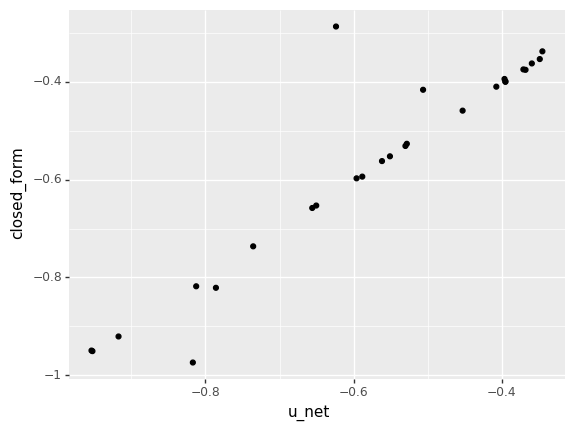

<ggplot: (8739375950161)>


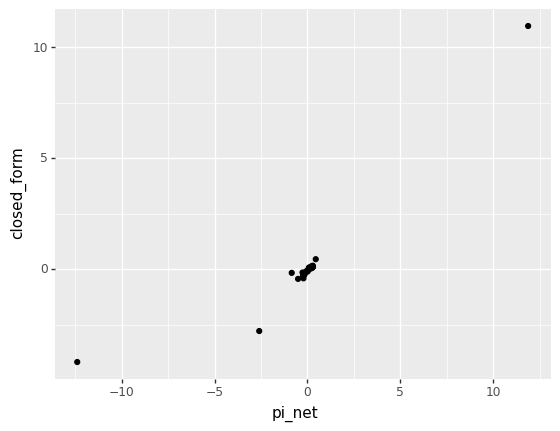

<ggplot: (8739376650961)>
Epoch 16999 - lr 0.0005 - key loss: 0.03465 - eqWeighted loss: 0.03465 - L1 loss 0.03465 - Max Loss 0.03272
internal loss: tensor(0.0327, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1070, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(12.6895, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.0132, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3810, device='cuda:0') max abs d2u_dx2: tensor(0.8748, device='cuda:0') min abs d2u_dx2: tensor(0.0455, device='cuda:0')
mean du_dx: tensor(0.5160, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9333, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1635, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0567, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2909, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0006

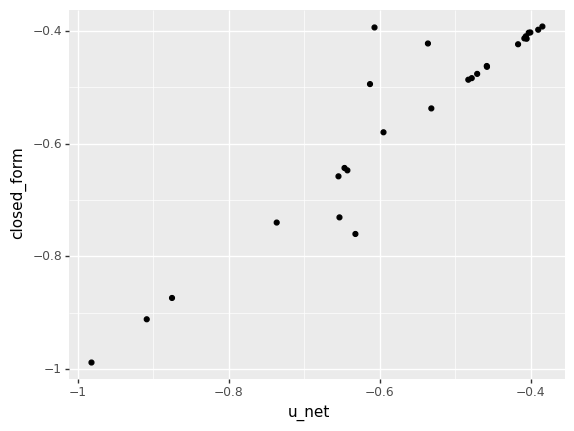

<ggplot: (8739376595809)>


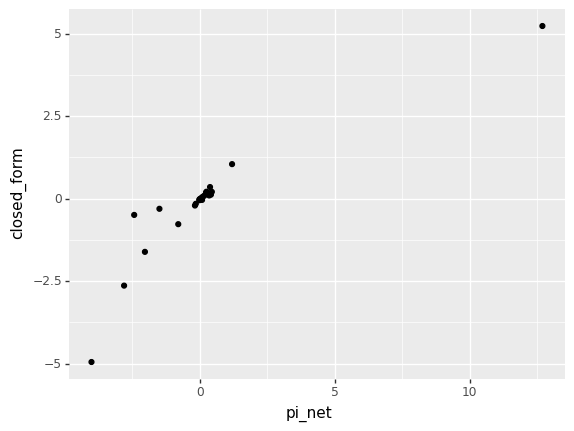

<ggplot: (8739376208893)>
Epoch 17199 - lr 0.0005 - key loss: 0.05979 - eqWeighted loss: 0.05979 - L1 loss 0.05979 - Max Loss 0.05711
internal loss: tensor(0.0571, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0027, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2421, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(12.2812, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.2549, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2684, device='cuda:0') max abs d2u_dx2: tensor(0.8659, device='cuda:0') min abs d2u_dx2: tensor(0.0044, device='cuda:0')
mean du_dx: tensor(0.5656, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7900, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2560, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0715, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.4708, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0014

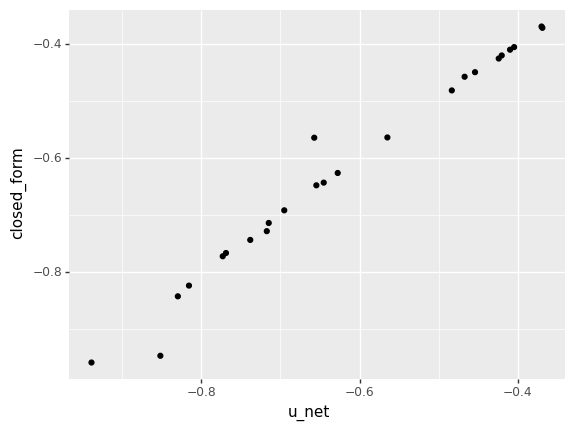

<ggplot: (8739375837217)>


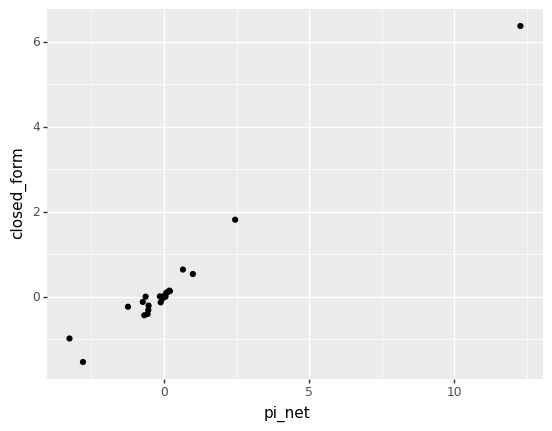

<ggplot: (8739375841093)>
Epoch 17399 - lr 0.0005 - key loss: 0.04486 - eqWeighted loss: 0.04486 - L1 loss 0.04486 - Max Loss 0.04237
internal loss: tensor(0.0424, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.7706, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.9507, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-8.4098, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2616, device='cuda:0') max abs d2u_dx2: tensor(0.8364, device='cuda:0') min abs d2u_dx2: tensor(0.0126, device='cuda:0')
mean du_dx: tensor(0.4858, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8438, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1059, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0546, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1683, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0018

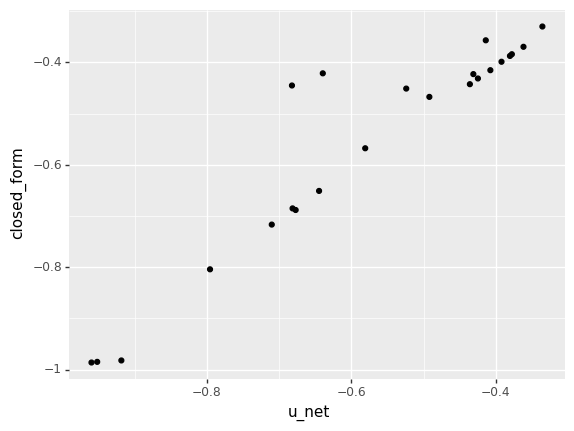

<ggplot: (8739375955513)>


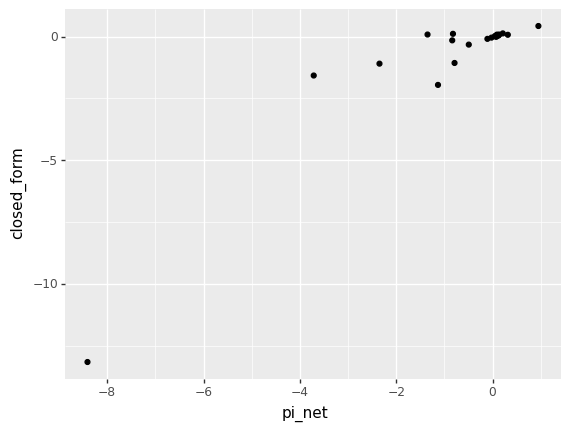

<ggplot: (8739376300477)>
Epoch 17599 - lr 0.0005 - key loss: 0.02124 - eqWeighted loss: 0.02124 - L1 loss 0.02124 - Max Loss 0.01754
internal loss: tensor(0.0175, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0037, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2230, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.4161, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.7933, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2321, device='cuda:0') max abs d2u_dx2: tensor(0.7741, device='cuda:0') min abs d2u_dx2: tensor(0.0582, device='cuda:0')
mean du_dx: tensor(0.5617, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8553, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1316, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0447, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2115, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0023

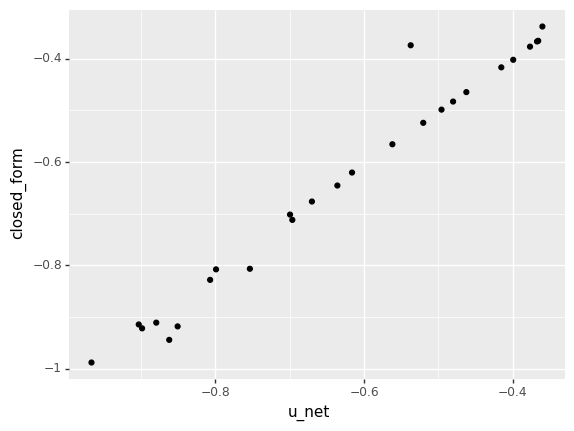

<ggplot: (8739376104957)>


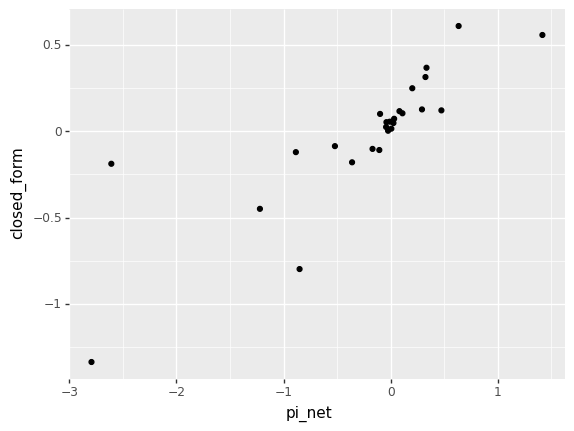

<ggplot: (8739376497641)>
Epoch 17799 - lr 0.0005 - key loss: 0.05375 - eqWeighted loss: 0.05375 - L1 loss 0.05375 - Max Loss 0.04985
internal loss: tensor(0.0499, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0039, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0993, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.2708, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.8305, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1256, device='cuda:0') max abs d2u_dx2: tensor(0.8751, device='cuda:0') min abs d2u_dx2: tensor(0.0155, device='cuda:0')
mean du_dx: tensor(0.4472, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6961, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0640, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0730, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1997, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0054,

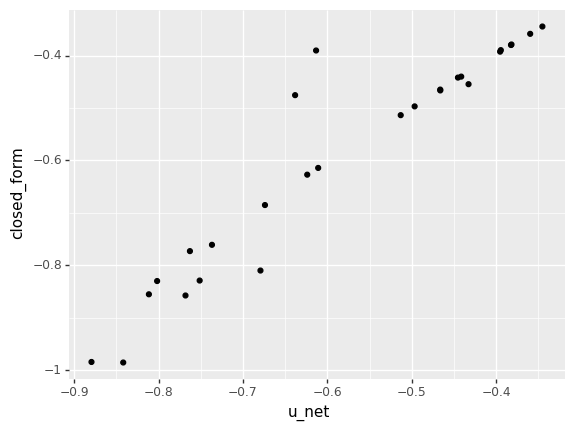

<ggplot: (8739375693325)>


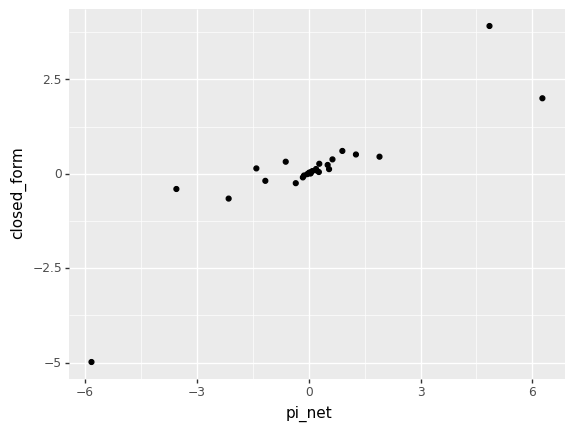

<ggplot: (8739376497441)>
Epoch 17999 - lr 0.0005 - key loss: 0.01964 - eqWeighted loss: 0.01964 - L1 loss 0.01964 - Max Loss 0.01685
internal loss: tensor(0.0168, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0028, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1406, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.2363, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.0735, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2736, device='cuda:0') max abs d2u_dx2: tensor(0.7880, device='cuda:0') min abs d2u_dx2: tensor(0.0606, device='cuda:0')
mean du_dx: tensor(0.5086, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8809, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0460, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0427, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1747, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0012

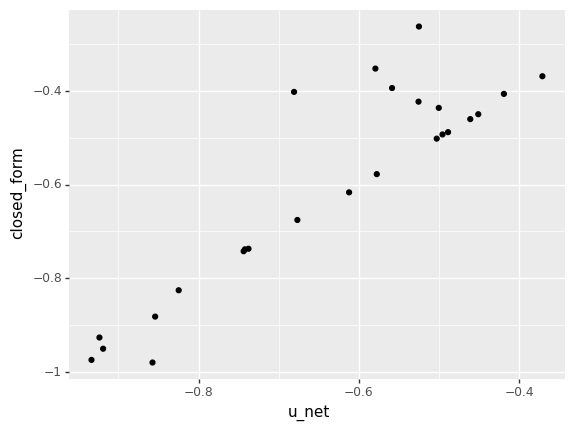

<ggplot: (8739375604729)>


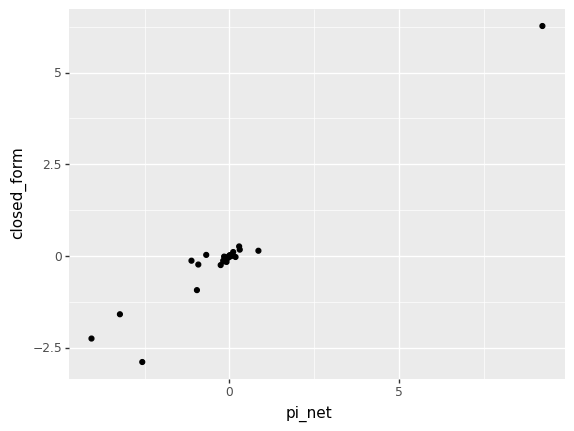

<ggplot: (8739376324897)>
Epoch 18199 - lr 0.0005 - key loss: 0.0098 - eqWeighted loss: 0.0098 - L1 loss 0.0098 - Max Loss 0.00733
internal loss: tensor(0.0073, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0741, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.2525, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-7.1900, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3287, device='cuda:0') max abs d2u_dx2: tensor(0.6275, device='cuda:0') min abs d2u_dx2: tensor(0.0145, device='cuda:0')
mean du_dx: tensor(0.5138, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8493, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1111, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0366, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0752, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0062, d

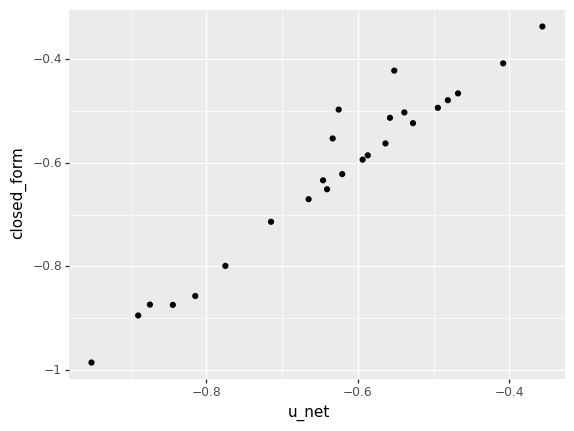

<ggplot: (8739375606849)>


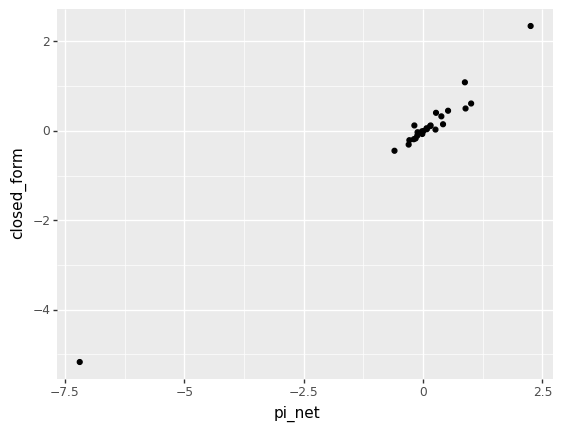

<ggplot: (8739376206597)>
Epoch 18399 - lr 0.0005 - key loss: 0.00876 - eqWeighted loss: 0.00876 - L1 loss 0.00876 - Max Loss 0.00737
internal loss: tensor(0.0074, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.4402, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(13.0302, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.8187, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4083, device='cuda:0') max abs d2u_dx2: tensor(0.6823, device='cuda:0') min abs d2u_dx2: tensor(0.0046, device='cuda:0')
mean du_dx: tensor(0.5006, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8082, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0356, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0231, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0709, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0021

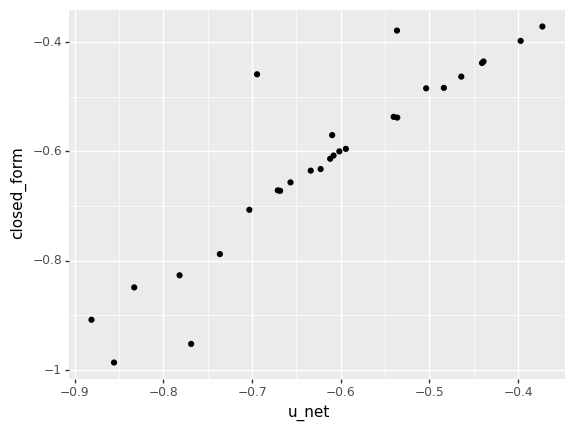

<ggplot: (8739375674397)>


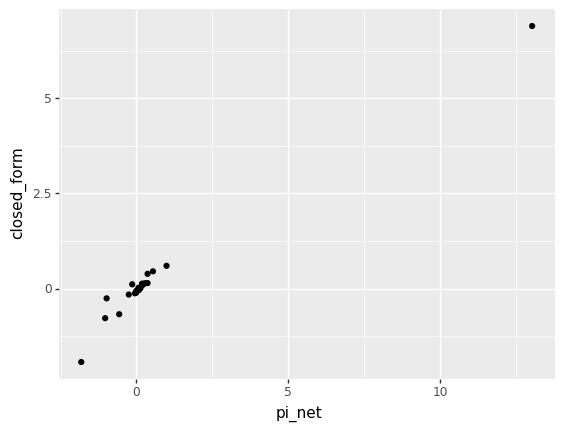

<ggplot: (8739375606969)>
Epoch 18599 - lr 0.0005 - key loss: 0.01033 - eqWeighted loss: 0.01033 - L1 loss 0.01033 - Max Loss 0.00718
internal loss: tensor(0.0072, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0032, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1778, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.5015, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.0701, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3286, device='cuda:0') max abs d2u_dx2: tensor(0.6340, device='cuda:0') min abs d2u_dx2: tensor(0.0238, device='cuda:0')
mean du_dx: tensor(0.5086, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8247, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2568, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0399, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1171, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0011

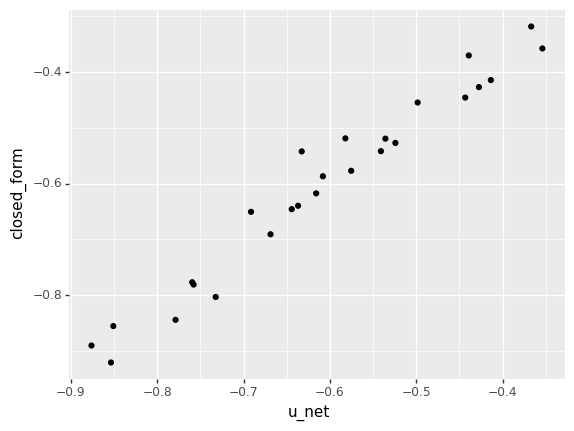

<ggplot: (8739375694985)>


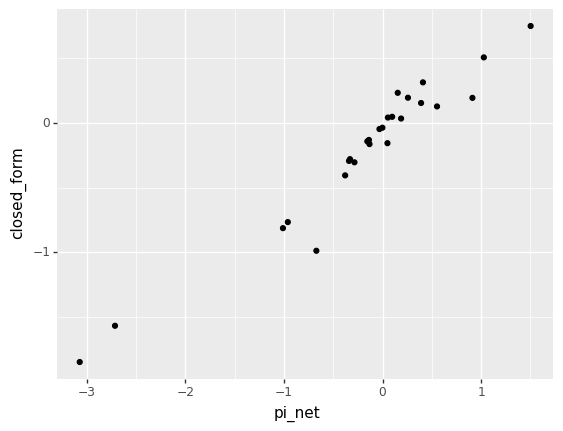

<ggplot: (8739375655893)>
Epoch 18799 - lr 0.0005 - key loss: 0.01036 - eqWeighted loss: 0.01036 - L1 loss 0.01036 - Max Loss 0.00892
internal loss: tensor(0.0089, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.5558, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(4.2088, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.2181, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1765, device='cuda:0') max abs d2u_dx2: tensor(1.0667, device='cuda:0') min abs d2u_dx2: tensor(0.0394, device='cuda:0')
mean du_dx: tensor(0.4462, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7139, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0627, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0456, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1243, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003

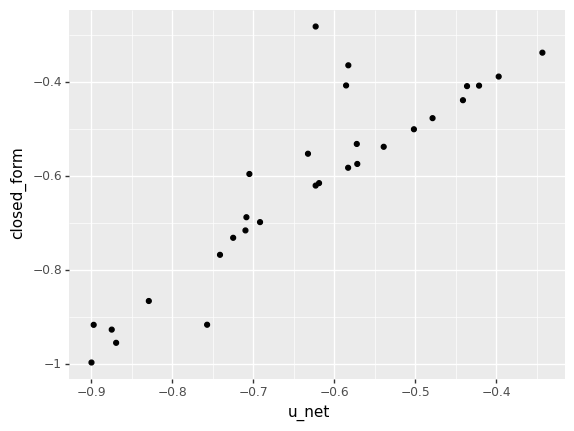

<ggplot: (8739373269129)>


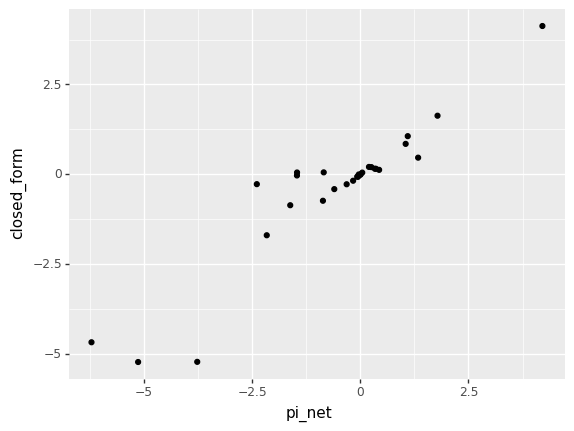

<ggplot: (8739375695061)>
Epoch 18999 - lr 0.0005 - key loss: 0.01147 - eqWeighted loss: 0.01147 - L1 loss 0.01147 - Max Loss 0.01027
internal loss: tensor(0.0103, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.3592, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.4970, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.6621, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2017, device='cuda:0') max abs d2u_dx2: tensor(0.5745, device='cuda:0') min abs d2u_dx2: tensor(0.0555, device='cuda:0')
mean du_dx: tensor(0.4408, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6985, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1142, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0397, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1562, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0099

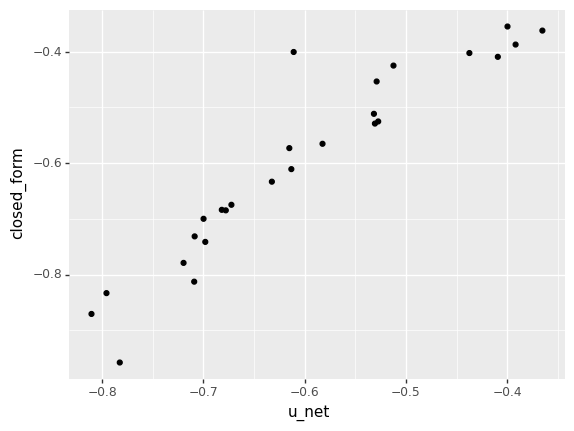

<ggplot: (8739375674601)>


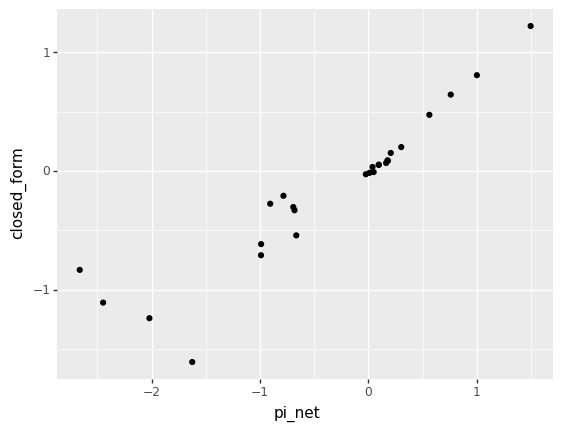

<ggplot: (8739373317973)>
Epoch 19199 - lr 0.0005 - key loss: 0.00909 - eqWeighted loss: 0.00909 - L1 loss 0.00909 - Max Loss 0.00644
internal loss: tensor(0.0064, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0027, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2058, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.6121, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.7697, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2749, device='cuda:0') max abs d2u_dx2: tensor(0.5720, device='cuda:0') min abs d2u_dx2: tensor(0.0294, device='cuda:0')
mean du_dx: tensor(0.3787, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6518, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0585, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0331, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0942, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0026,

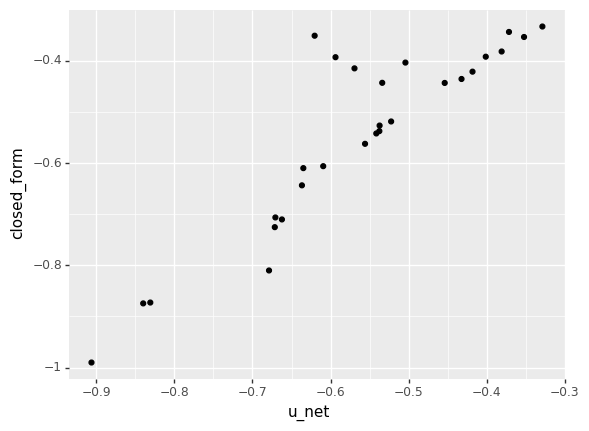

<ggplot: (8739375848577)>


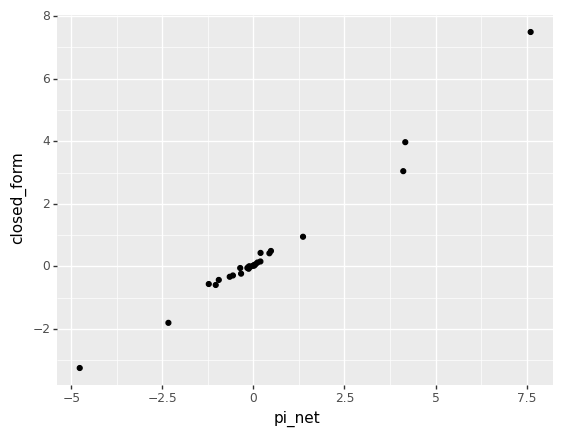

<ggplot: (8739375610161)>
Epoch 19399 - lr 0.0005 - key loss: 0.00655 - eqWeighted loss: 0.00655 - L1 loss 0.00655 - Max Loss 0.00514
internal loss: tensor(0.0051, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0014, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.5718, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.2532, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-14.6908, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1259, device='cuda:0') max abs d2u_dx2: tensor(0.6259, device='cuda:0') min abs d2u_dx2: tensor(0.0395, device='cuda:0')
mean du_dx: tensor(0.3754, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6328, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0404, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0273, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0770, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.001

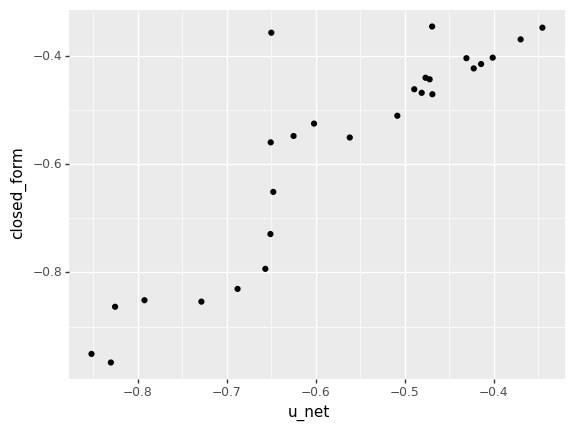

<ggplot: (8739373090073)>


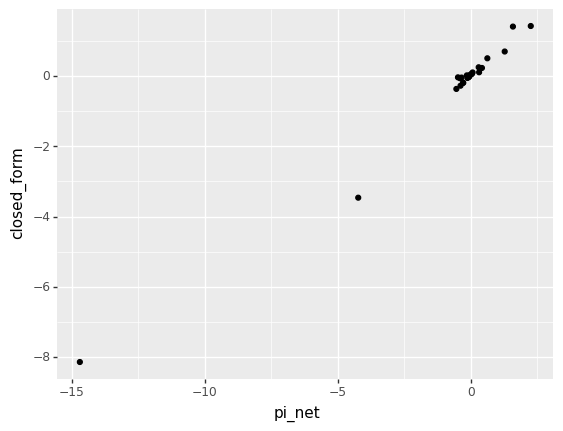

<ggplot: (8739375684569)>
Epoch 19599 - lr 0.0005 - key loss: 0.00798 - eqWeighted loss: 0.00798 - L1 loss 0.00798 - Max Loss 0.00501
internal loss: tensor(0.0050, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0030, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2072, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.0036, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.7480, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0800, device='cuda:0') max abs d2u_dx2: tensor(0.5370, device='cuda:0') min abs d2u_dx2: tensor(0.0038, device='cuda:0')
mean du_dx: tensor(0.4438, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6141, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0416, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0305, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0793, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0010

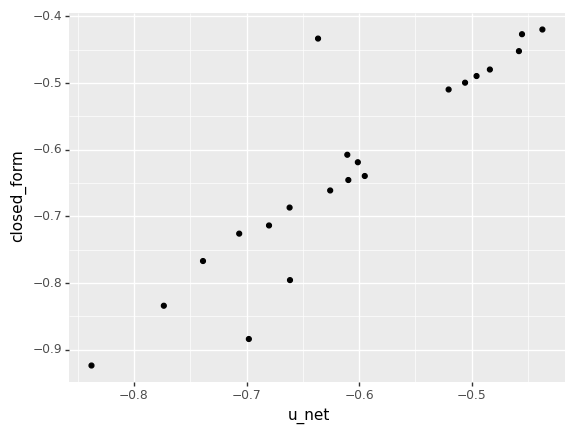

<ggplot: (8739373092565)>


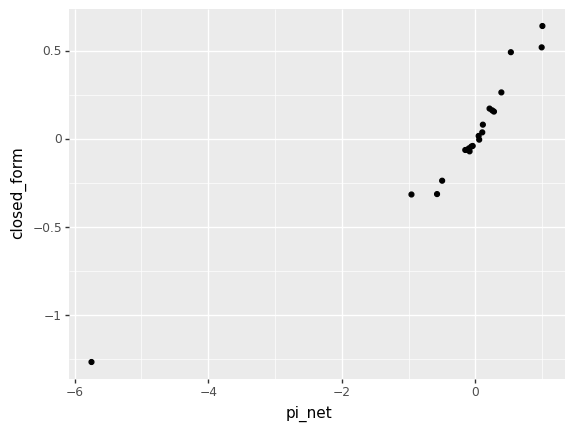

<ggplot: (8739373092533)>
Epoch 19799 - lr 0.0005 - key loss: 0.00634 - eqWeighted loss: 0.00634 - L1 loss 0.00634 - Max Loss 0.00474
internal loss: tensor(0.0047, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0665, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.8574, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.6813, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1278, device='cuda:0') max abs d2u_dx2: tensor(0.5999, device='cuda:0') min abs d2u_dx2: tensor(0.0294, device='cuda:0')
mean du_dx: tensor(0.4063, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5808, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0937, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0304, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0638, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0051,

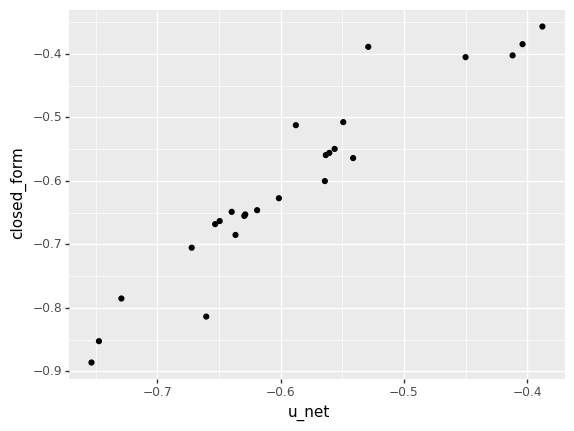

<ggplot: (8739375553301)>


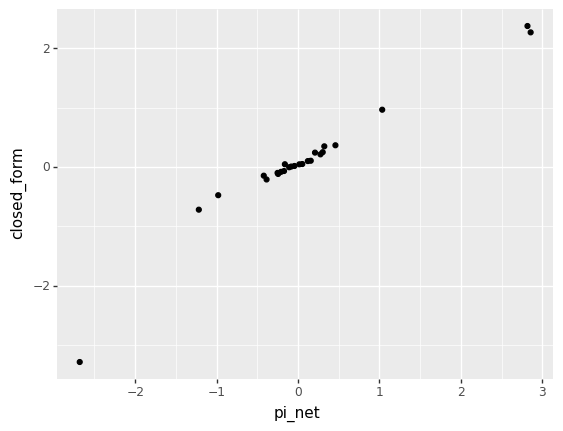

<ggplot: (8739376438173)>
Epoch 19999 - lr 0.0005 - key loss: 0.00925 - eqWeighted loss: 0.00925 - L1 loss 0.00925 - Max Loss 0.00805
internal loss: tensor(0.0080, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0741, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.5681, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.5570, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1487, device='cuda:0') max abs d2u_dx2: tensor(0.5316, device='cuda:0') min abs d2u_dx2: tensor(0.0076, device='cuda:0')
mean du_dx: tensor(0.4051, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5734, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1985, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0292, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0985, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0061

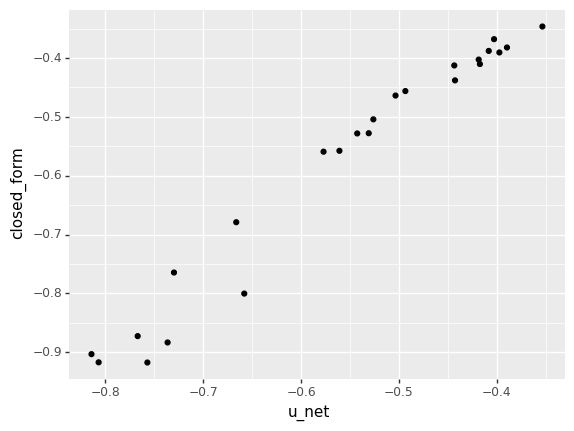

<ggplot: (8739372971529)>


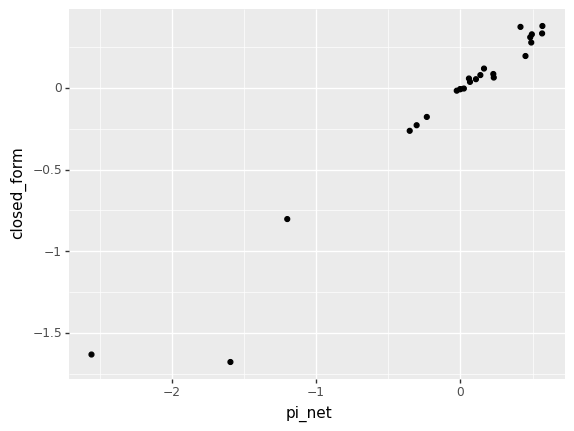

<ggplot: (8739372994097)>
Epoch 20199 - lr 0.0005 - key loss: 0.00622 - eqWeighted loss: 0.00622 - L1 loss 0.00622 - Max Loss 0.00549
internal loss: tensor(0.0055, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0267, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.0795, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.6189, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0237, device='cuda:0') max abs d2u_dx2: tensor(0.4303, device='cuda:0') min abs d2u_dx2: tensor(0.0085, device='cuda:0')
mean du_dx: tensor(0.3972, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5646, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1336, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0292, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0695, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0026

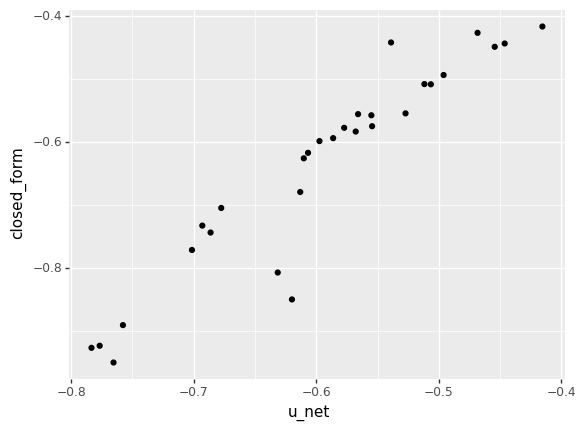

<ggplot: (8739372925549)>


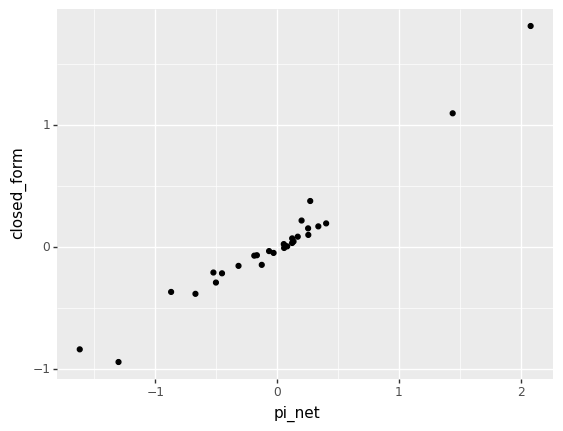

<ggplot: (8739372925541)>
Epoch 20399 - lr 0.0005 - key loss: 0.00863 - eqWeighted loss: 0.00863 - L1 loss 0.00863 - Max Loss 0.0061
internal loss: tensor(0.0061, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0025, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0123, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.5558, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.7811, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0913, device='cuda:0') max abs d2u_dx2: tensor(0.5788, device='cuda:0') min abs d2u_dx2: tensor(0.0065, device='cuda:0')
mean du_dx: tensor(0.3338, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5095, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0566, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0240, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0816, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0008,

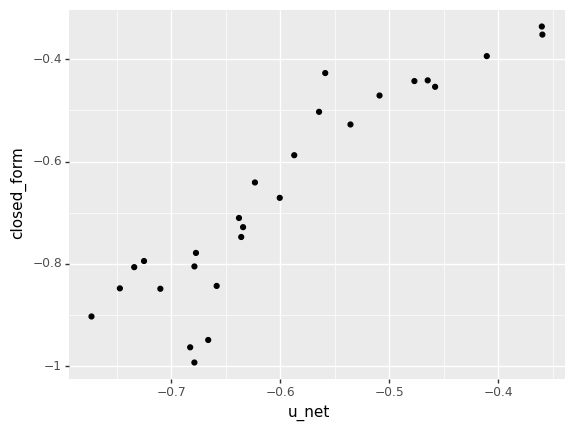

<ggplot: (8739372925581)>


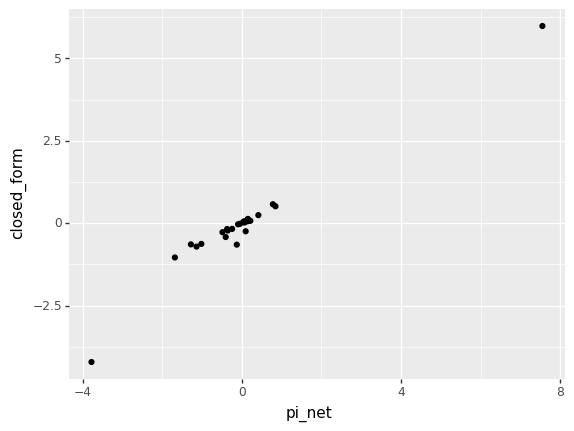

<ggplot: (8739373141685)>
Epoch 20599 - lr 0.0005 - key loss: 0.00663 - eqWeighted loss: 0.00663 - L1 loss 0.00663 - Max Loss 0.00493
internal loss: tensor(0.0049, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0098, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.5581, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.8074, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0177, device='cuda:0') max abs d2u_dx2: tensor(0.4522, device='cuda:0') min abs d2u_dx2: tensor(0.0090, device='cuda:0')
mean du_dx: tensor(0.3814, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4841, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1077, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0246, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0757, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0032, 

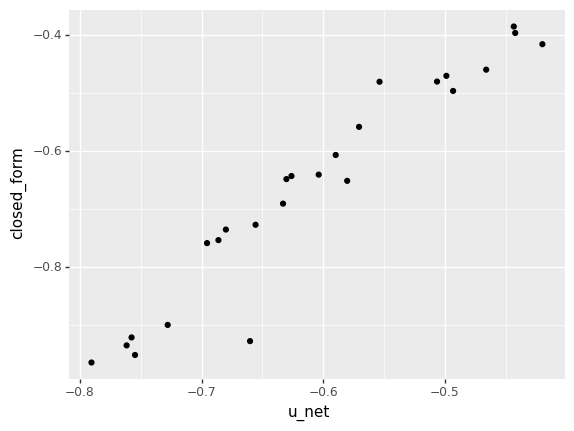

<ggplot: (8739373071345)>


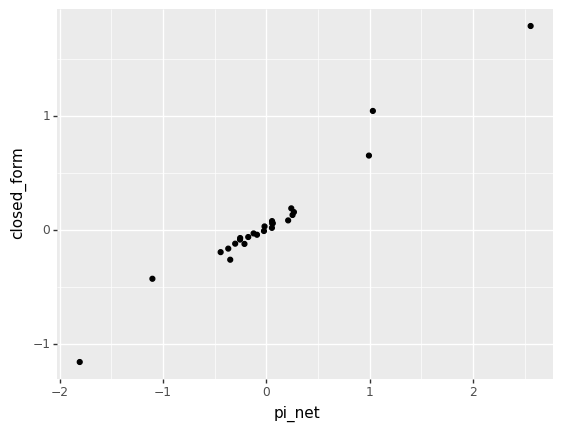

<ggplot: (8739373063549)>
Epoch 20799 - lr 0.0005 - key loss: 0.07846 - eqWeighted loss: 0.07846 - L1 loss 0.07846 - Max Loss 0.06756
internal loss: tensor(0.0109, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0676, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0795, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.3102, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.7424, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2796, device='cuda:0') max abs d2u_dx2: tensor(0.7484, device='cuda:0') min abs d2u_dx2: tensor(0.0273, device='cuda:0')
mean du_dx: tensor(0.5907, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8927, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2711, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0300, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0874, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0008,

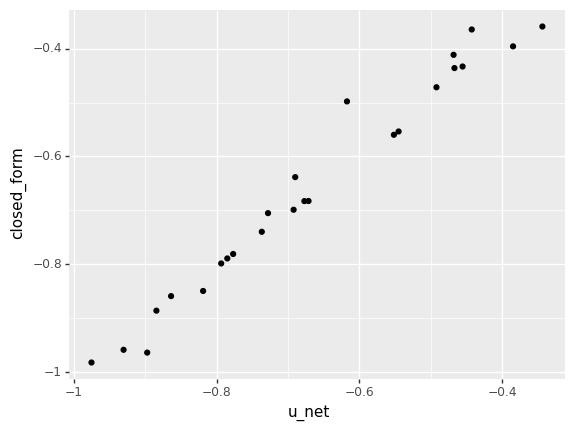

<ggplot: (8739372804285)>


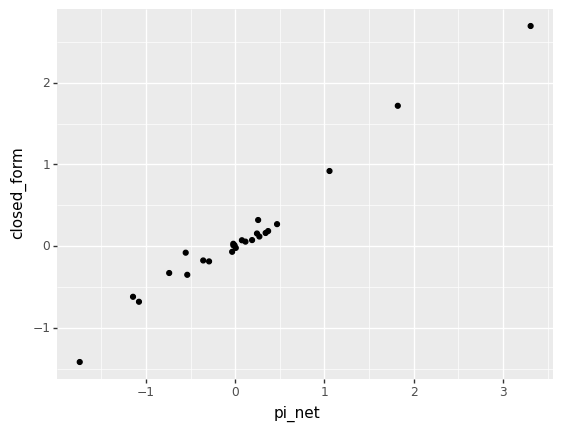

<ggplot: (8739373063641)>
Epoch 20999 - lr 0.0005 - key loss: 0.04519 - eqWeighted loss: 0.04519 - L1 loss 0.04519 - Max Loss 0.02855
internal loss: tensor(0.0286, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0166, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.0948, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.6493, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-17.5627, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3290, device='cuda:0') max abs d2u_dx2: tensor(0.8510, device='cuda:0') min abs d2u_dx2: tensor(0.0175, device='cuda:0')
mean du_dx: tensor(0.5566, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9042, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3011, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0543, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1892, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.002

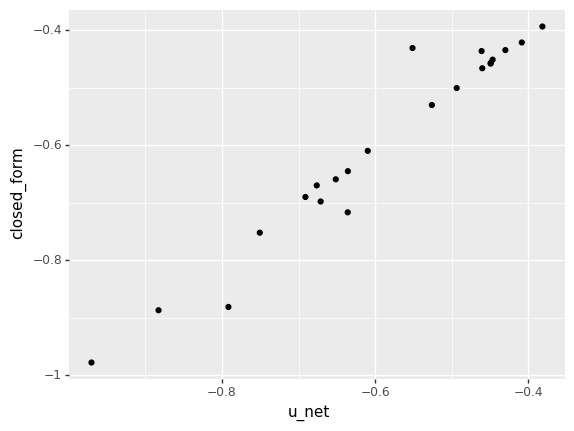

<ggplot: (8739372733149)>


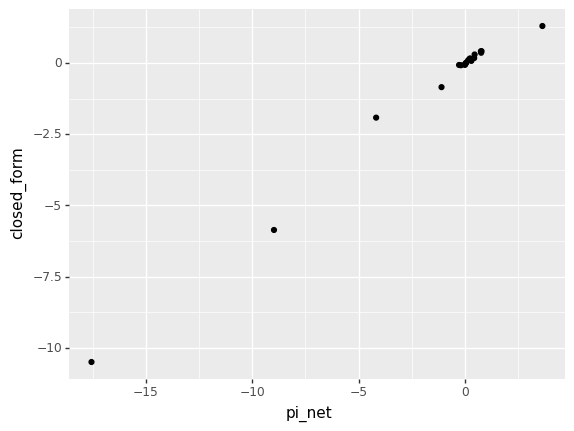

<ggplot: (8739373232529)>
Epoch 21199 - lr 0.0005 - key loss: 0.2039 - eqWeighted loss: 0.2039 - L1 loss 0.2039 - Max Loss 0.18001
internal loss: tensor(0.1800, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0239, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-1.0625, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(15.6635, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-17.8448, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0569, device='cuda:0') max abs d2u_dx2: tensor(1.2635, device='cuda:0') min abs d2u_dx2: tensor(0.0139, device='cuda:0')
mean du_dx: tensor(0.4418, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8003, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0262, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.1618, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5561, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0059,

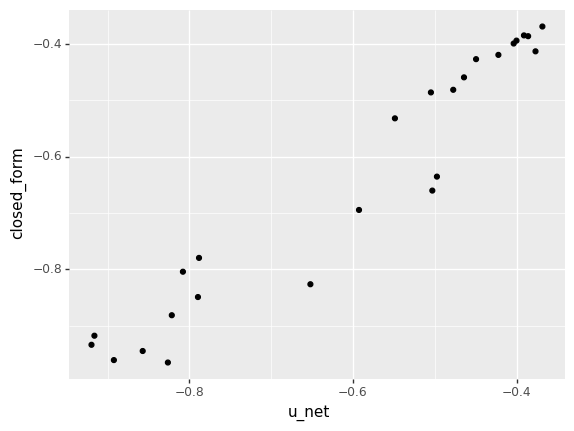

<ggplot: (8739372625625)>


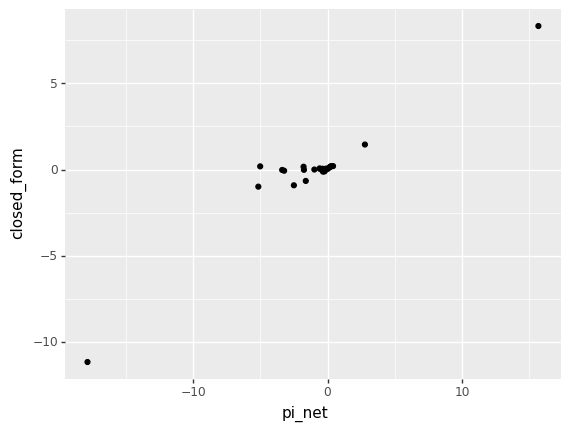

<ggplot: (8739372628321)>
Epoch 21399 - lr 0.0005 - key loss: 0.04884 - eqWeighted loss: 0.04884 - L1 loss 0.04884 - Max Loss 0.04539
internal loss: tensor(0.0454, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0035, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.4782, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(15.1861, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.4889, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5768, device='cuda:0') max abs d2u_dx2: tensor(0.9625, device='cuda:0') min abs d2u_dx2: tensor(0.2632, device='cuda:0')
mean du_dx: tensor(0.6291, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9121, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3222, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0565, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2999, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0161

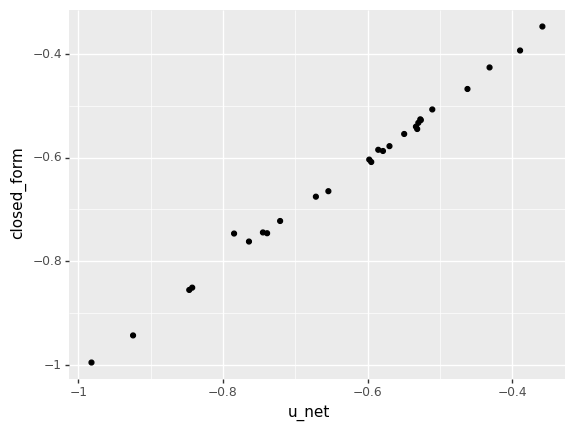

<ggplot: (8739372600825)>


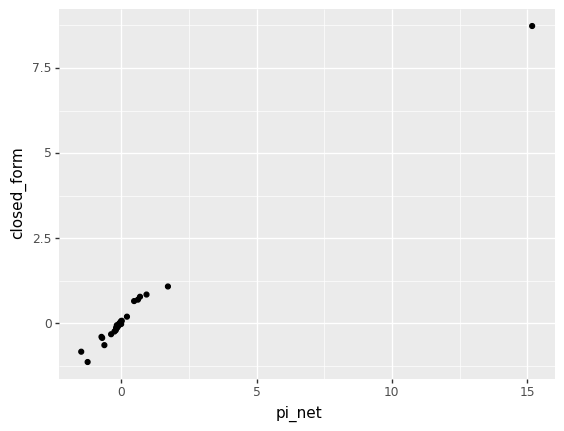

<ggplot: (8739373185045)>
Epoch 21599 - lr 0.0005 - key loss: 0.02006 - eqWeighted loss: 0.02006 - L1 loss 0.02006 - Max Loss 0.01663
internal loss: tensor(0.0166, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0034, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4095, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.0844, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.7800, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4650, device='cuda:0') max abs d2u_dx2: tensor(0.9377, device='cuda:0') min abs d2u_dx2: tensor(0.0451, device='cuda:0')
mean du_dx: tensor(0.6093, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9860, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3675, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0665, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2489, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0038

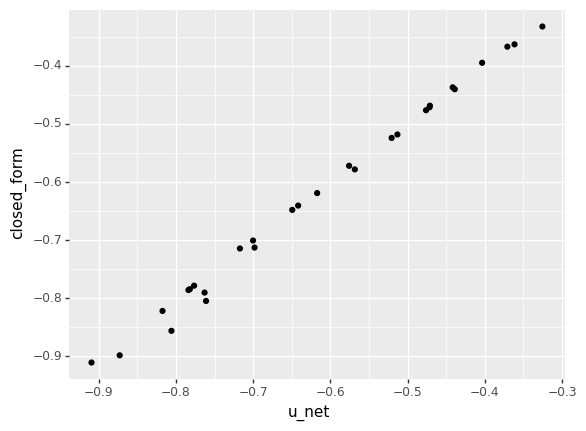

<ggplot: (8739372600757)>


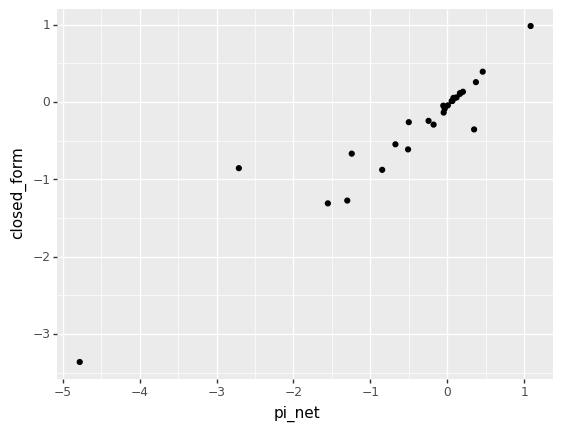

<ggplot: (8739372705369)>
Epoch 21799 - lr 0.0005 - key loss: 0.30666 - eqWeighted loss: 0.30666 - L1 loss 0.30666 - Max Loss 0.24803
internal loss: tensor(0.2480, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0586, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-2.8045, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.5655, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-10.0462, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.2046, device='cuda:0') max abs d2u_dx2: tensor(1.0979, device='cuda:0') min abs d2u_dx2: tensor(0.0114, device='cuda:0')
mean du_dx: tensor(0.2584, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4709, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0118, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.2107, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5617, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0063

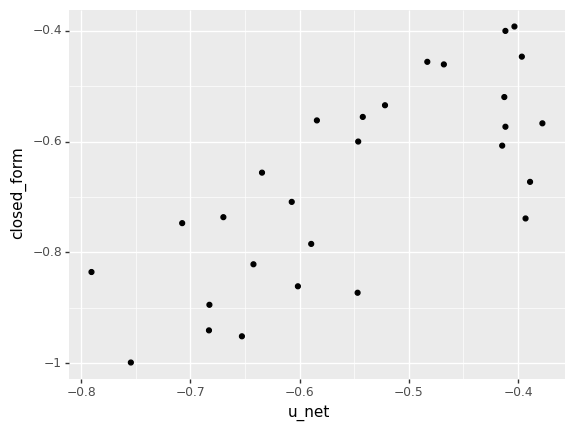

<ggplot: (8739372460001)>


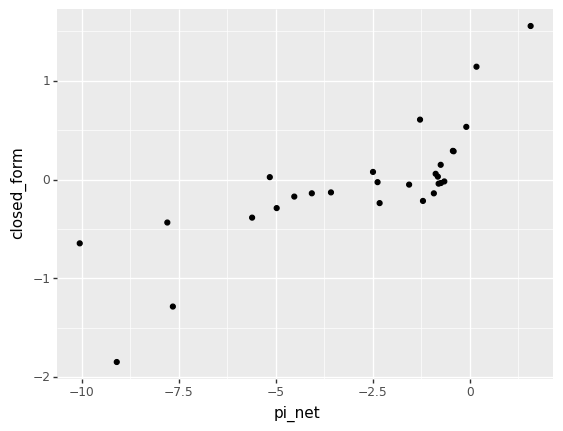

<ggplot: (8739372437405)>
Epoch 21999 - lr 0.0005 - key loss: 0.08122 - eqWeighted loss: 0.08122 - L1 loss 0.08122 - Max Loss 0.07114
internal loss: tensor(0.0711, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0101, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2767, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(16.1876, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.4636, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1367, device='cuda:0') max abs d2u_dx2: tensor(0.7637, device='cuda:0') min abs d2u_dx2: tensor(0.0399, device='cuda:0')
mean du_dx: tensor(0.4015, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7488, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0963, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.1143, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3753, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.000

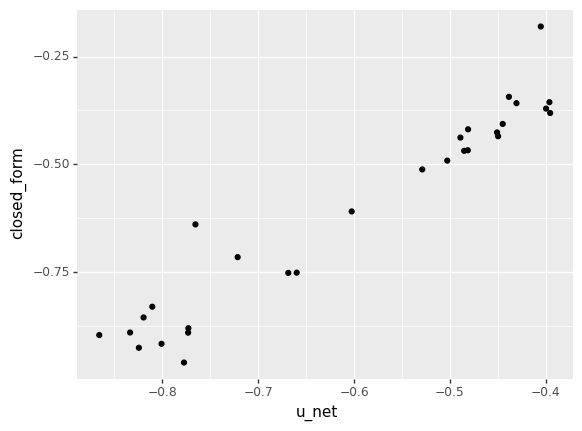

<ggplot: (8739372478809)>


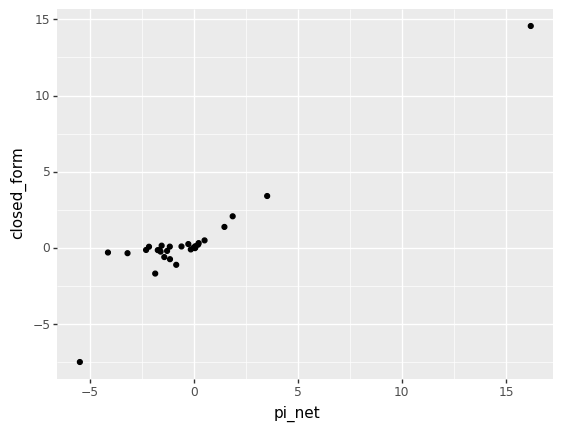

<ggplot: (8739373141597)>
Epoch 22199 - lr 0.0005 - key loss: 0.08736 - eqWeighted loss: 0.08736 - L1 loss 0.08736 - Max Loss 0.07803
internal loss: tensor(0.0780, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0093, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4580, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.1024, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.2146, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2808, device='cuda:0') max abs d2u_dx2: tensor(0.7327, device='cuda:0') min abs d2u_dx2: tensor(0.0718, device='cuda:0')
mean du_dx: tensor(0.5075, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8194, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2710, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0678, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2109, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0057

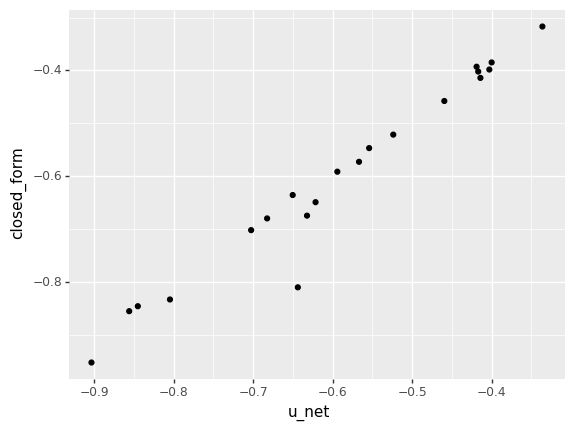

<ggplot: (8739372632137)>


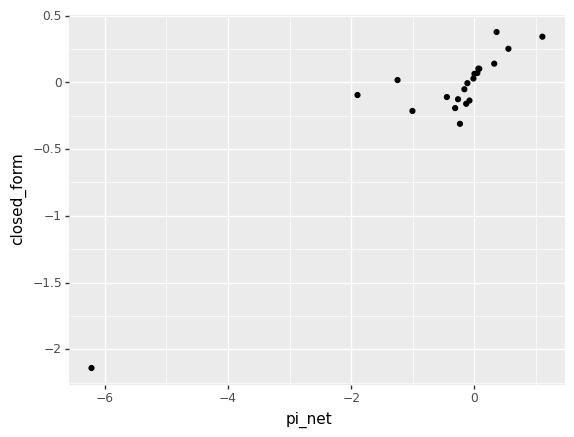

<ggplot: (8739372430313)>
Epoch 22399 - lr 0.0005 - key loss: 0.06025 - eqWeighted loss: 0.06025 - L1 loss 0.06025 - Max Loss 0.05533
internal loss: tensor(0.0553, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0049, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4713, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(4.6781, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-8.7525, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.3796, device='cuda:0') max abs d2u_dx2: tensor(0.7079, device='cuda:0') min abs d2u_dx2: tensor(0.0013, device='cuda:0')
mean du_dx: tensor(0.5399, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8444, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3352, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0689, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.5167, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0018

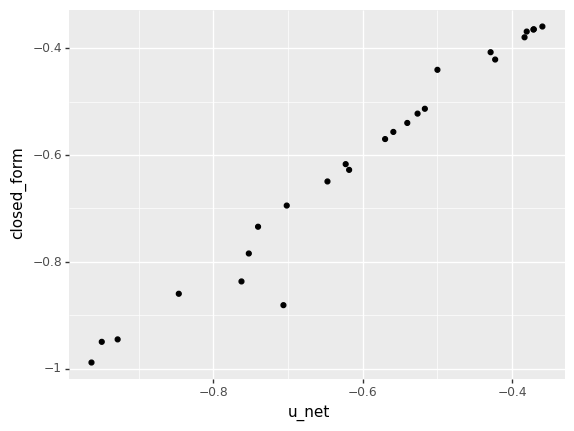

<ggplot: (8739372300513)>


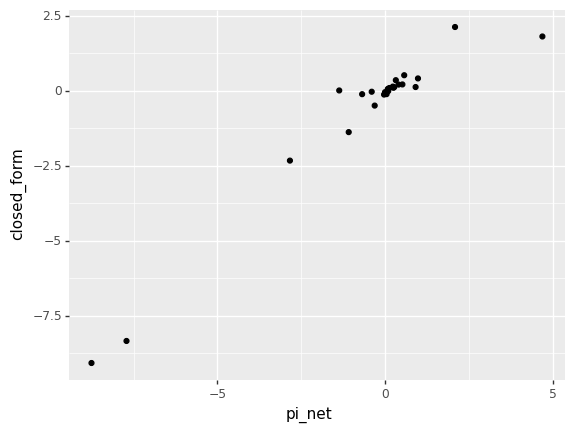

<ggplot: (8739372278953)>
Epoch 22599 - lr 0.0005 - key loss: 0.0332 - eqWeighted loss: 0.0332 - L1 loss 0.0332 - Max Loss 0.02489
internal loss: tensor(0.0249, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0083, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1556, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.1305, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.2019, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4522, device='cuda:0') max abs d2u_dx2: tensor(0.8806, device='cuda:0') min abs d2u_dx2: tensor(0.0121, device='cuda:0')
mean du_dx: tensor(0.5749, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9252, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0666, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0531, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3738, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0005, de

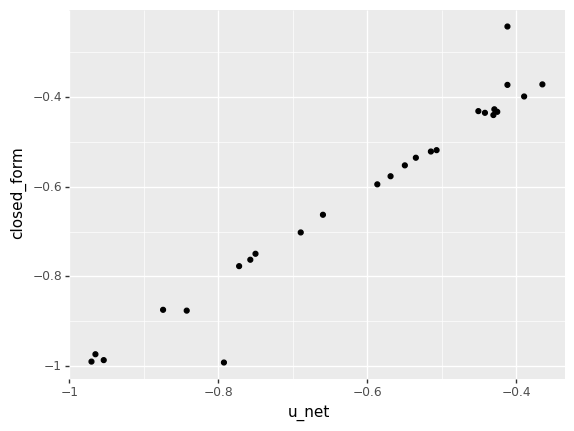

<ggplot: (8739372403613)>


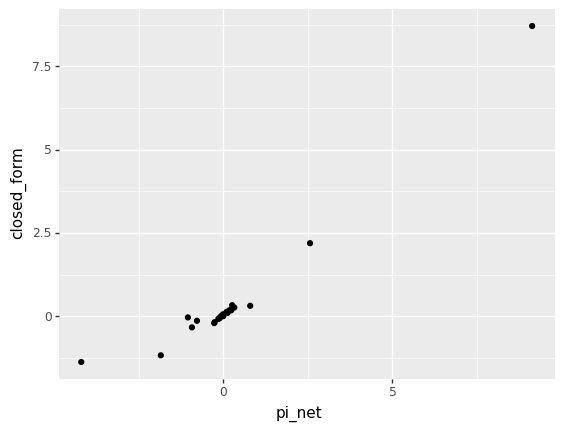

<ggplot: (8739372481913)>
Epoch 22799 - lr 0.0005 - key loss: 0.06633 - eqWeighted loss: 0.06633 - L1 loss 0.06633 - Max Loss 0.05855
internal loss: tensor(0.0586, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0078, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.4821, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.7793, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.5392, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5098, device='cuda:0') max abs d2u_dx2: tensor(1.0134, device='cuda:0') min abs d2u_dx2: tensor(0.0392, device='cuda:0')
mean du_dx: tensor(0.5722, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9329, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2726, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0463, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2528, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0018,

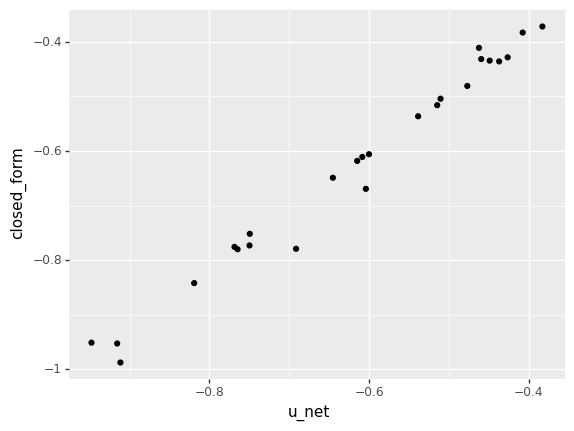

<ggplot: (8739372297709)>


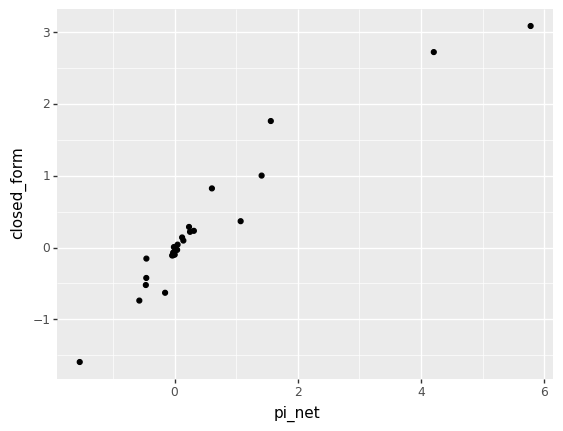

<ggplot: (8739372474425)>
Epoch 22999 - lr 0.0005 - key loss: 0.05721 - eqWeighted loss: 0.05721 - L1 loss 0.05721 - Max Loss 0.05168
internal loss: tensor(0.0517, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0055, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.2885, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.3321, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.9427, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4828, device='cuda:0') max abs d2u_dx2: tensor(0.9938, device='cuda:0') min abs d2u_dx2: tensor(0.0766, device='cuda:0')
mean du_dx: tensor(0.5402, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9818, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.2144, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0473, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1484, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0066

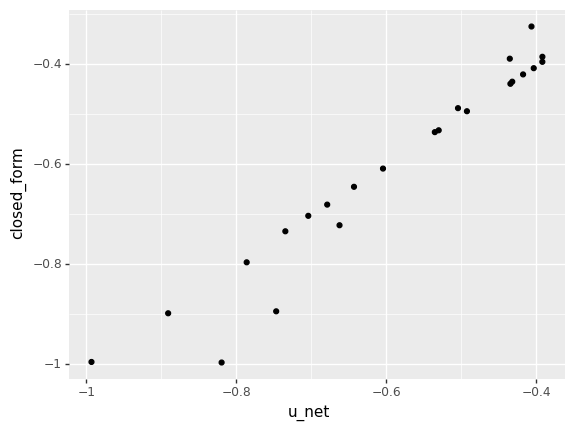

<ggplot: (8739372614697)>


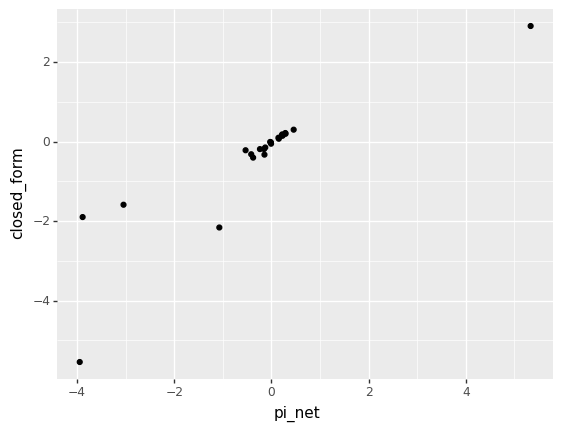

<ggplot: (8739372418933)>
Epoch 23199 - lr 0.0005 - key loss: 0.03409 - eqWeighted loss: 0.03409 - L1 loss 0.03409 - Max Loss 0.02723
internal loss: tensor(0.0272, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0069, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2799, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(15.3058, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.2989, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.5017, device='cuda:0') max abs d2u_dx2: tensor(0.9457, device='cuda:0') min abs d2u_dx2: tensor(0.0200, device='cuda:0')
mean du_dx: tensor(0.6240, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(1.0073, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.3396, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0535, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.3858, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0058

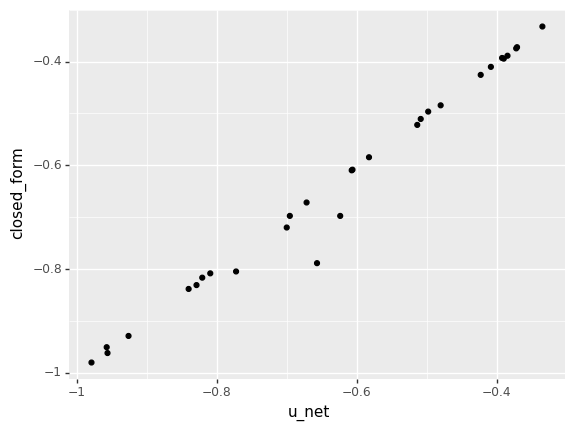

<ggplot: (8739372064937)>


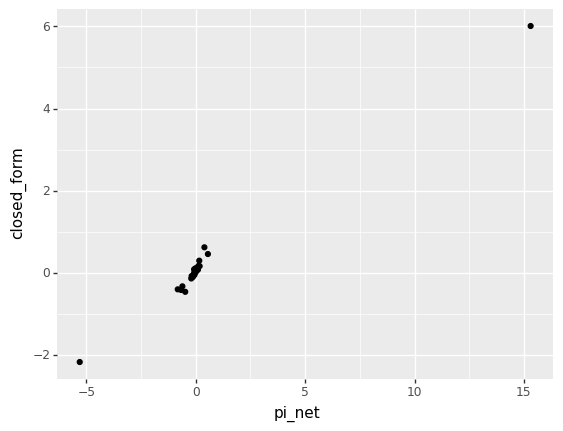

<ggplot: (8739372418949)>
Epoch 23399 - lr 0.0005 - key loss: 0.01758 - eqWeighted loss: 0.01758 - L1 loss 0.01758 - Max Loss 0.01434
internal loss: tensor(0.0143, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0032, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(1.4642, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(16.8643, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.0982, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4708, device='cuda:0') max abs d2u_dx2: tensor(0.8178, device='cuda:0') min abs d2u_dx2: tensor(0.0246, device='cuda:0')
mean du_dx: tensor(0.5526, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(1.0078, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1757, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0615, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2233, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0054

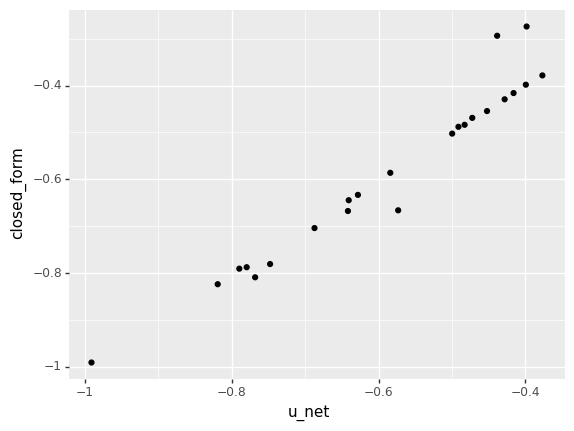

<ggplot: (8739372625621)>


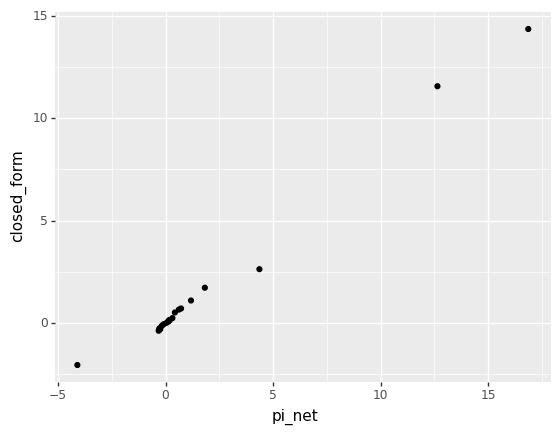

<ggplot: (8739372061477)>
Epoch 23599 - lr 0.0005 - key loss: 0.02395 - eqWeighted loss: 0.02395 - L1 loss 0.02395 - Max Loss 0.02066
internal loss: tensor(0.0207, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0033, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.9564, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.4119, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-11.6867, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4814, device='cuda:0') max abs d2u_dx2: tensor(0.8690, device='cuda:0') min abs d2u_dx2: tensor(0.1139, device='cuda:0')
mean du_dx: tensor(0.5558, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8488, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1853, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0619, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2526, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.009

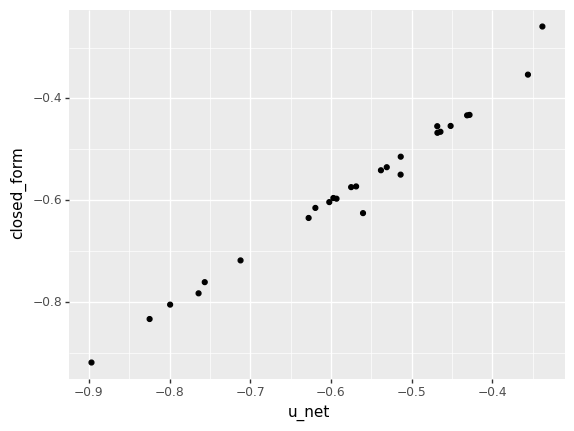

<ggplot: (8739371950373)>


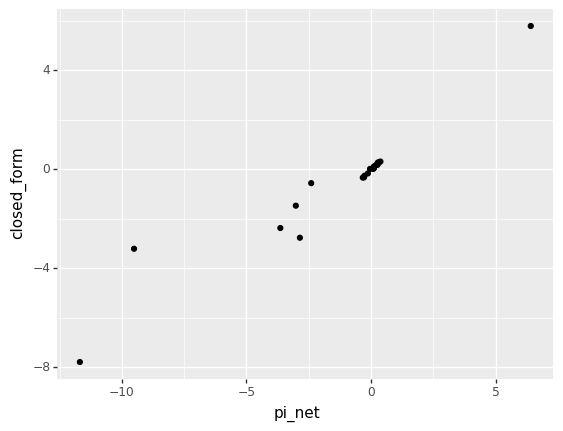

<ggplot: (8739372129125)>
Epoch 23799 - lr 0.0005 - key loss: 0.04384 - eqWeighted loss: 0.04384 - L1 loss 0.04384 - Max Loss 0.04039
internal loss: tensor(0.0404, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0034, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1409, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.0750, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.9272, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.4281, device='cuda:0') max abs d2u_dx2: tensor(0.9071, device='cuda:0') min abs d2u_dx2: tensor(0.0804, device='cuda:0')
mean du_dx: tensor(0.5704, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.9482, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.1896, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0420, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2161, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0016

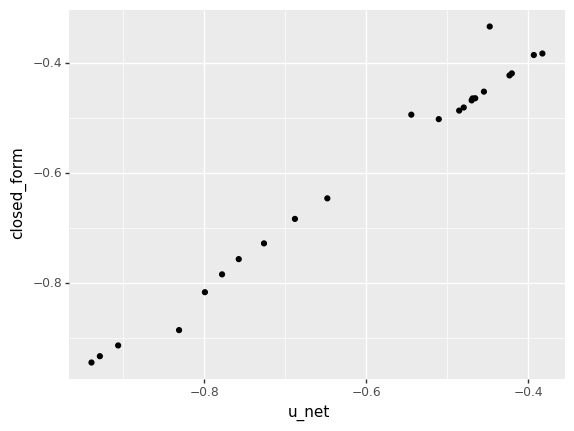

<ggplot: (8739372112453)>


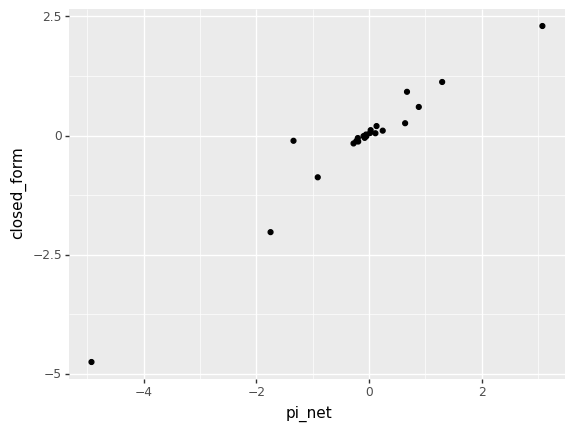

<ggplot: (8739371909273)>
Epoch 23999 - lr 0.0005 - key loss: 0.01966 - eqWeighted loss: 0.01966 - L1 loss 0.01966 - Max Loss 0.01235
internal loss: tensor(0.0124, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0073, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.7051, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.9313, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.3046, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.2172, device='cuda:0') max abs d2u_dx2: tensor(0.7827, device='cuda:0') min abs d2u_dx2: tensor(0.0176, device='cuda:0')
mean du_dx: tensor(0.3961, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7603, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0715, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0453, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.2192, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0008,

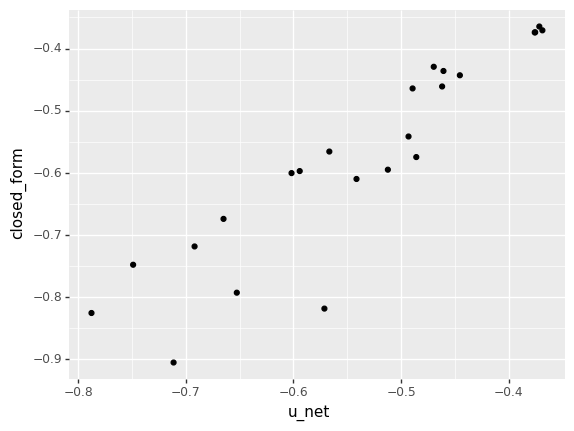

<ggplot: (8739371966229)>


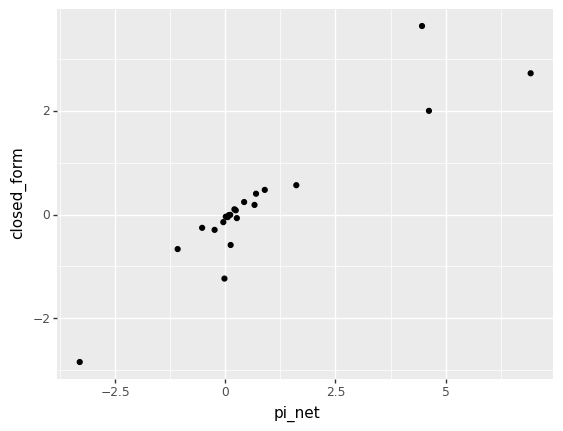

<ggplot: (8739371858145)>
Epoch 24199 - lr 0.0005 - key loss: 0.00845 - eqWeighted loss: 0.00845 - L1 loss 0.00845 - Max Loss 0.00775
internal loss: tensor(0.0078, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1503, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.2037, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.2118, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1225, device='cuda:0') max abs d2u_dx2: tensor(0.6072, device='cuda:0') min abs d2u_dx2: tensor(0.0103, device='cuda:0')
mean du_dx: tensor(0.3900, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.8470, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0435, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0434, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.1255, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0009,

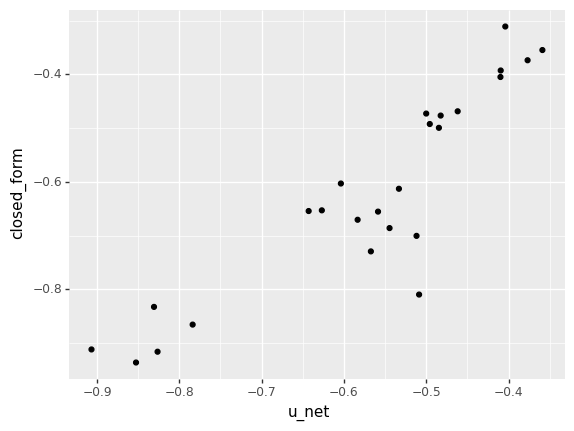

<ggplot: (8739372137821)>


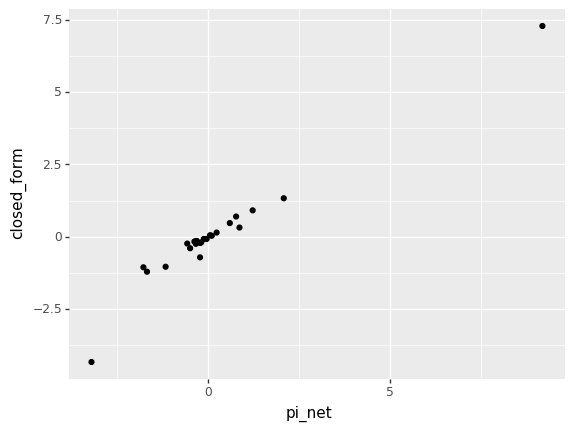

<ggplot: (8739372474417)>
Epoch 24399 - lr 0.0005 - key loss: 0.00651 - eqWeighted loss: 0.00651 - L1 loss 0.00651 - Max Loss 0.0052
internal loss: tensor(0.0052, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1547, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.7628, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.9374, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.1380, device='cuda:0') max abs d2u_dx2: tensor(0.5703, device='cuda:0') min abs d2u_dx2: tensor(0.0038, device='cuda:0')
mean du_dx: tensor(0.3895, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.6929, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0743, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0341, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0947, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0058,

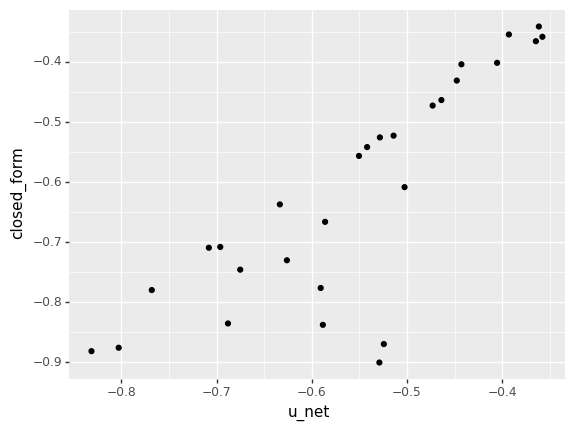

<ggplot: (8739371918957)>


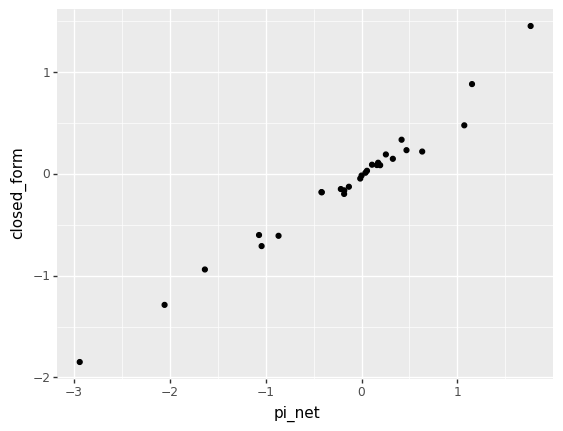

<ggplot: (8739371909177)>
Epoch 24599 - lr 0.0005 - key loss: 0.00752 - eqWeighted loss: 0.00752 - L1 loss 0.00752 - Max Loss 0.0059
internal loss: tensor(0.0059, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.3475, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.5182, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.8148, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0861, device='cuda:0') max abs d2u_dx2: tensor(0.5433, device='cuda:0') min abs d2u_dx2: tensor(0.0028, device='cuda:0')
mean du_dx: tensor(0.3557, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5803, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0490, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0344, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0891, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0015, 

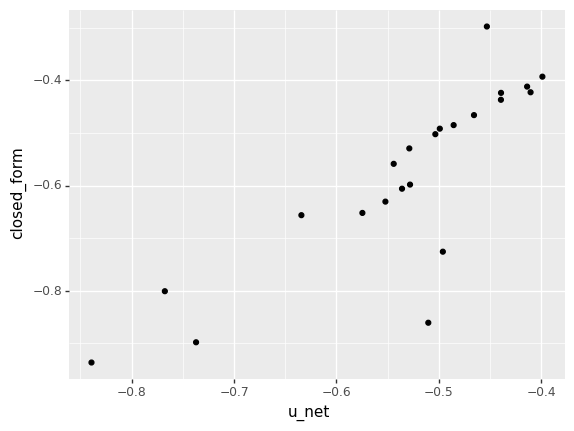

<ggplot: (8739371650529)>


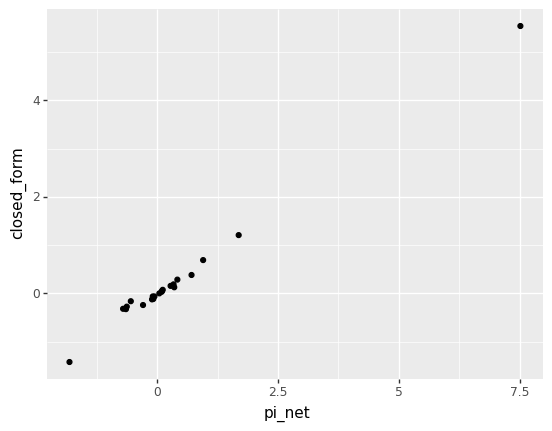

<ggplot: (8739371764373)>
Epoch 24799 - lr 0.0005 - key loss: 0.00524 - eqWeighted loss: 0.00524 - L1 loss 0.00524 - Max Loss 0.00405
internal loss: tensor(0.0041, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1988, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.9922, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.3208, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0663, device='cuda:0') max abs d2u_dx2: tensor(0.5207, device='cuda:0') min abs d2u_dx2: tensor(0.0041, device='cuda:0')
mean du_dx: tensor(0.3217, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.7379, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0202, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0322, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0861, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0018,

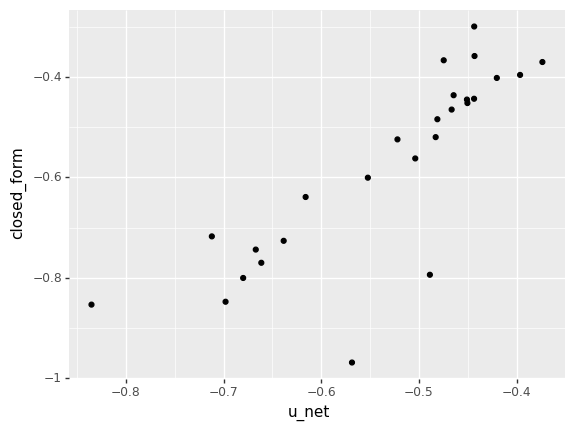

<ggplot: (8739371650457)>


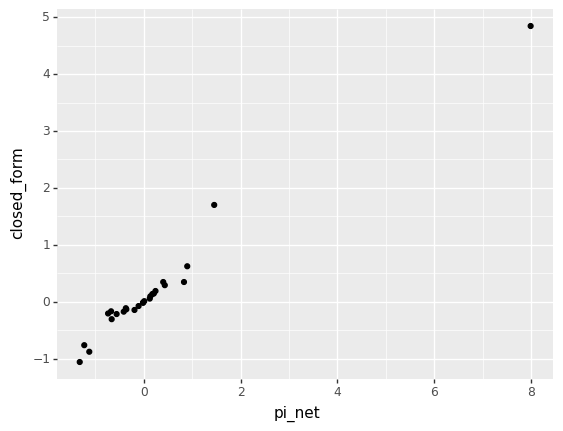

<ggplot: (8739371648889)>
Epoch 24999 - lr 0.0005 - key loss: 0.00703 - eqWeighted loss: 0.00703 - L1 loss 0.00703 - Max Loss 0.00501
internal loss: tensor(0.0050, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1438, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(9.9084, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-6.5332, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0041, device='cuda:0') max abs d2u_dx2: tensor(0.4813, device='cuda:0') min abs d2u_dx2: tensor(0.0012, device='cuda:0')
mean du_dx: tensor(0.2779, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5939, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0206, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0209, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0582, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0043, 

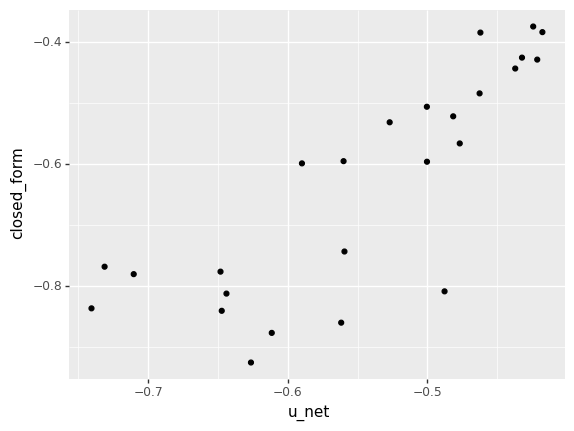

<ggplot: (8739371570573)>


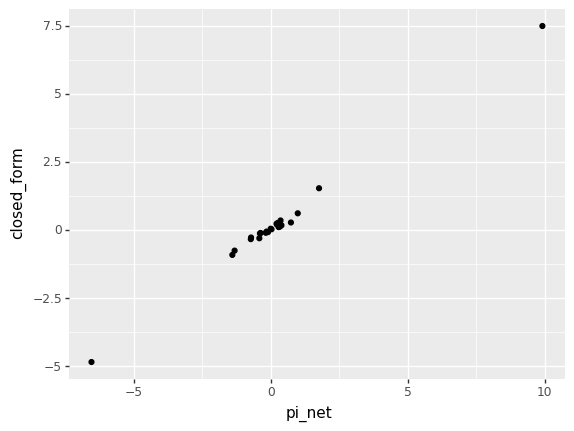

<ggplot: (8739371575157)>
Epoch 25199 - lr 0.0005 - key loss: 0.00497 - eqWeighted loss: 0.00497 - L1 loss 0.00497 - Max Loss 0.00362
internal loss: tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.4392, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.4857, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-9.0380, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0500, device='cuda:0') max abs d2u_dx2: tensor(0.5068, device='cuda:0') min abs d2u_dx2: tensor(0.0028, device='cuda:0')
mean du_dx: tensor(0.2916, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5764, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0167, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0266, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0692, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0024

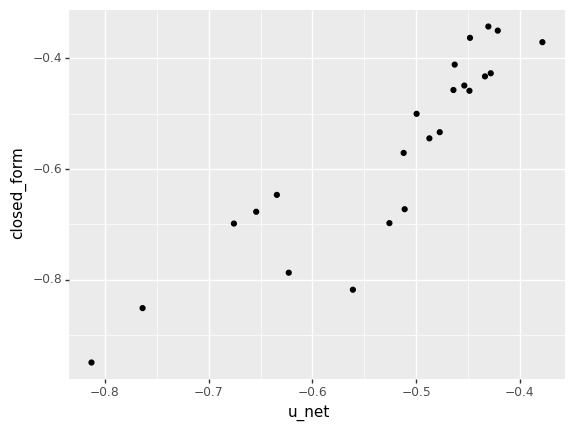

<ggplot: (8739371529281)>


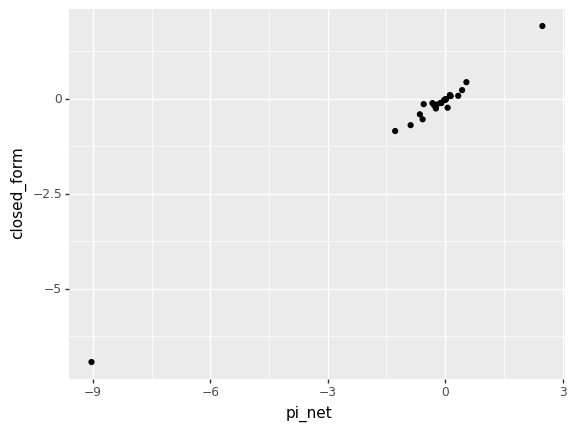

<ggplot: (8739371560573)>
Epoch 25399 - lr 0.0005 - key loss: 0.00624 - eqWeighted loss: 0.00624 - L1 loss 0.00624 - Max Loss 0.00508
internal loss: tensor(0.0051, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1217, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.8724, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.6193, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(-0.0583, device='cuda:0') max abs d2u_dx2: tensor(0.4828, device='cuda:0') min abs d2u_dx2: tensor(0.0031, device='cuda:0')
mean du_dx: tensor(0.2344, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5368, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0020, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0222, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0639, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0026

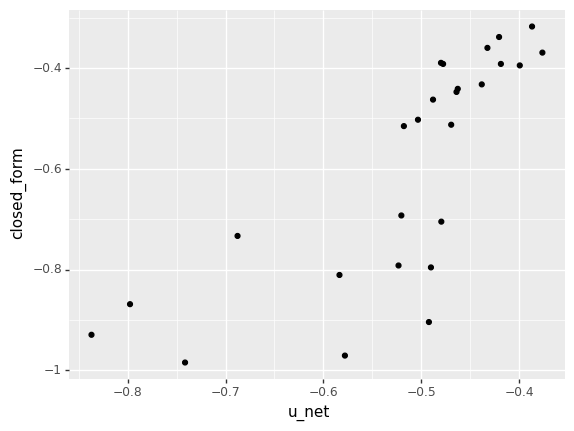

<ggplot: (8739371525673)>


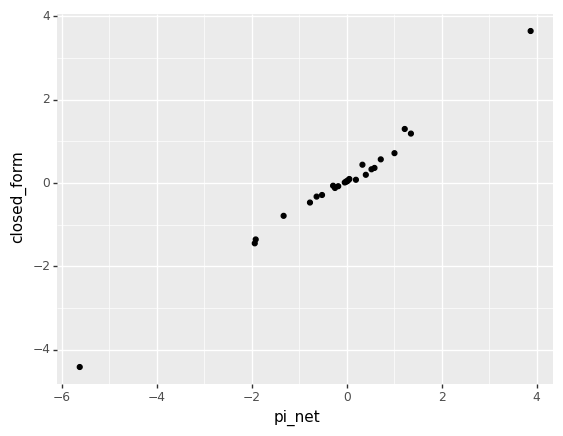

<ggplot: (8739372135713)>
Epoch 25599 - lr 0.0005 - key loss: 0.00574 - eqWeighted loss: 0.00574 - L1 loss 0.00574 - Max Loss 0.00391
internal loss: tensor(0.0039, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0138, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.6219, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.0551, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0174, device='cuda:0') max abs d2u_dx2: tensor(0.4012, device='cuda:0') min abs d2u_dx2: tensor(0.0040, device='cuda:0')
mean du_dx: tensor(0.1917, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5742, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0004, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0182, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0594, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0026,

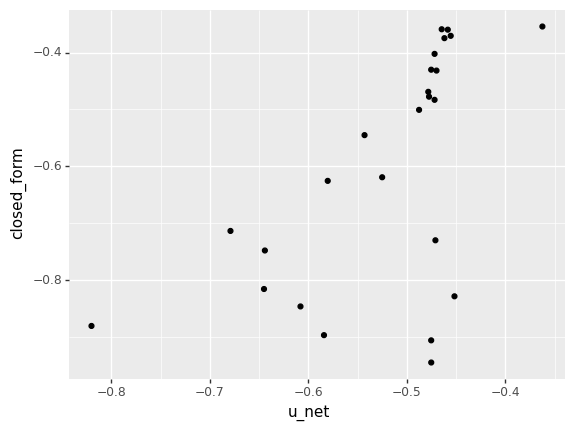

<ggplot: (8739364715025)>


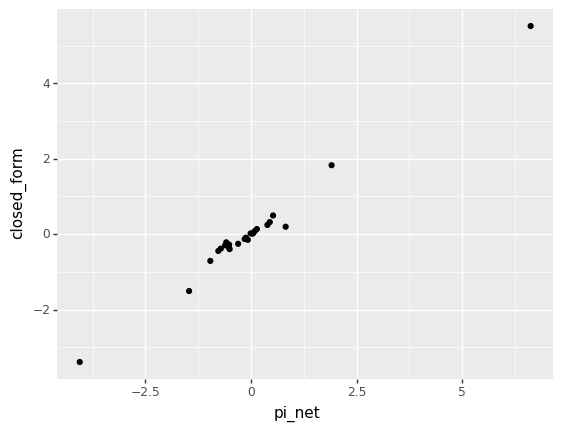

<ggplot: (8739364713205)>
Epoch 25799 - lr 0.0005 - key loss: 0.00416 - eqWeighted loss: 0.00416 - L1 loss 0.00416 - Max Loss 0.0031
internal loss: tensor(0.0031, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0011, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0023, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.4697, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.5665, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0627, device='cuda:0') max abs d2u_dx2: tensor(0.4018, device='cuda:0') min abs d2u_dx2: tensor(0.0035, device='cuda:0')
mean du_dx: tensor(0.2399, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5290, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0052, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0195, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0678, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0011, d

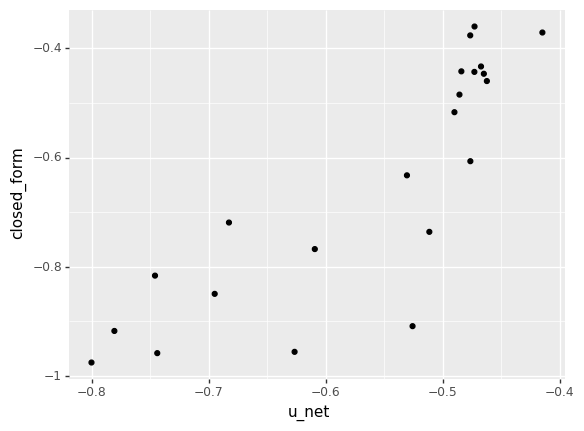

<ggplot: (8739371882161)>


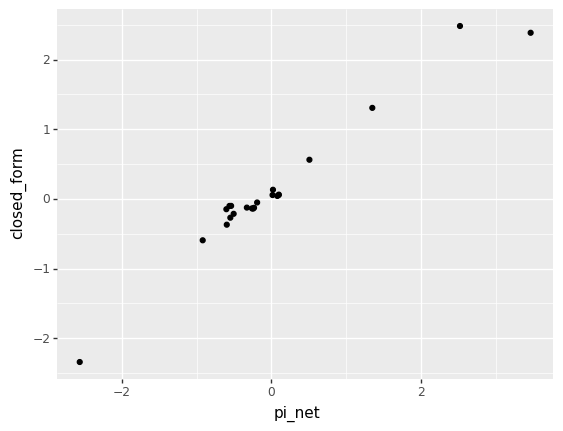

<ggplot: (8739371882169)>
Epoch 25999 - lr 0.0005 - key loss: 0.00594 - eqWeighted loss: 0.00594 - L1 loss 0.00594 - Max Loss 0.00529
internal loss: tensor(0.0053, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1298, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(0.8207, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.4340, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0639, device='cuda:0') max abs d2u_dx2: tensor(0.4847, device='cuda:0') min abs d2u_dx2: tensor(0.0012, device='cuda:0')
mean du_dx: tensor(0.2464, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4640, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0094, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0235, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0727, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0009,

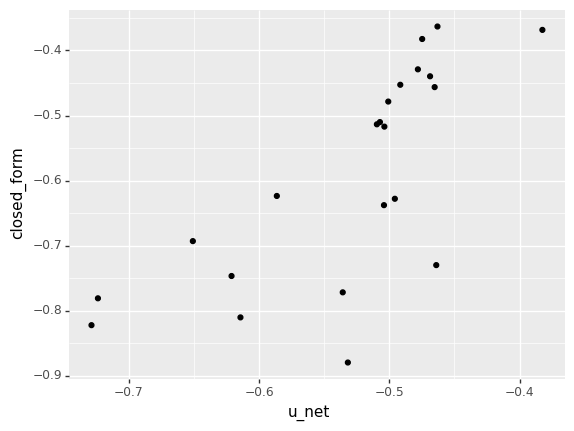

<ggplot: (8739364438997)>


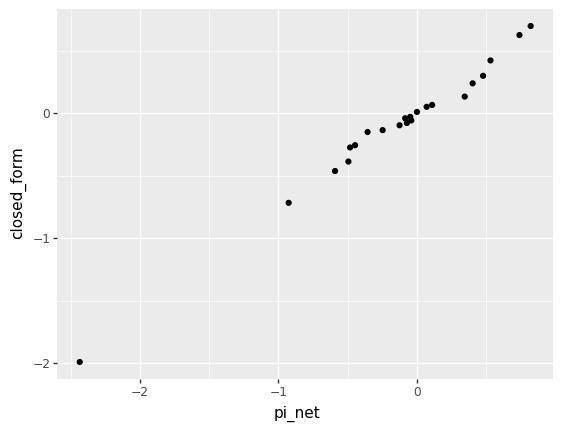

<ggplot: (8739371764385)>
Epoch 26199 - lr 0.0005 - key loss: 0.00475 - eqWeighted loss: 0.00475 - L1 loss 0.00475 - Max Loss 0.00406
internal loss: tensor(0.0041, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.7640, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.6584, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-2.6266, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0201, device='cuda:0') max abs d2u_dx2: tensor(0.3706, device='cuda:0') min abs d2u_dx2: tensor(0.0036, device='cuda:0')
mean du_dx: tensor(0.1426, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4865, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0004, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0107, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0527, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(7.3028e-

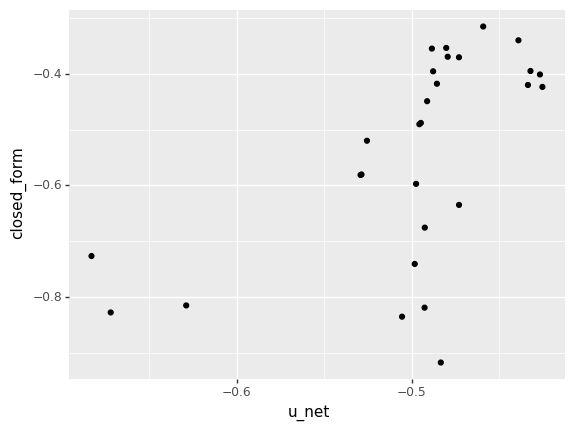

<ggplot: (8739356041641)>


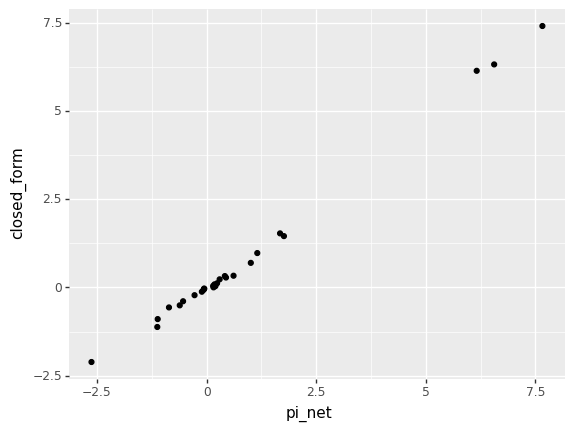

<ggplot: (8739364711329)>
Epoch 26399 - lr 0.0005 - key loss: 0.00514 - eqWeighted loss: 0.00514 - L1 loss 0.00514 - Max Loss 0.00358
internal loss: tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0976, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(8.4722, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.2940, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0156, device='cuda:0') max abs d2u_dx2: tensor(0.3560, device='cuda:0') min abs d2u_dx2: tensor(0.0009, device='cuda:0')
mean du_dx: tensor(0.1522, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5372, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0027, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0121, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0520, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0010,

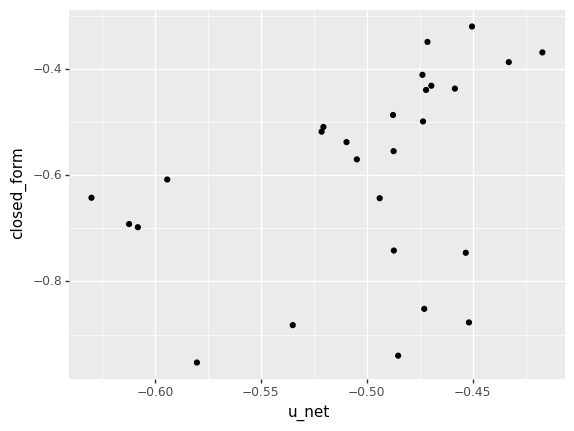

<ggplot: (8739364277757)>


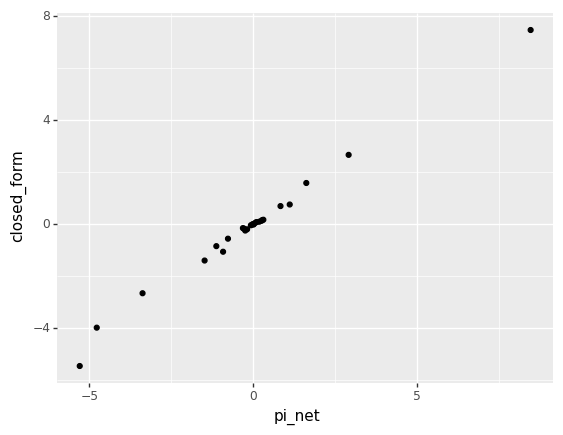

<ggplot: (8739364711185)>
Epoch 26599 - lr 0.0005 - key loss: 0.00483 - eqWeighted loss: 0.00483 - L1 loss 0.00483 - Max Loss 0.00386
internal loss: tensor(0.0039, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1967, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(2.7426, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.1140, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0840, device='cuda:0') max abs d2u_dx2: tensor(0.3417, device='cuda:0') min abs d2u_dx2: tensor(0.0023, device='cuda:0')
mean du_dx: tensor(0.2115, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.5071, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0014, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0130, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0610, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0005, 

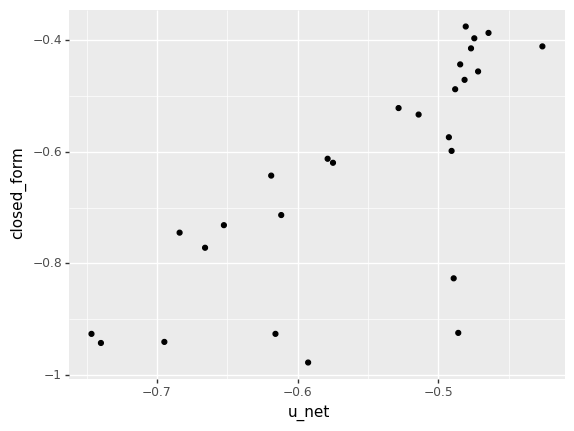

<ggplot: (8739364709713)>


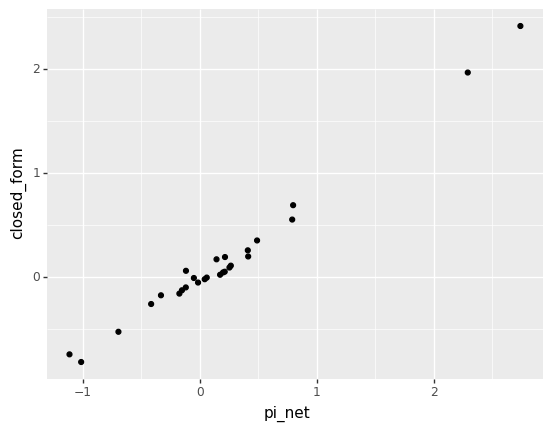

<ggplot: (8739356047153)>
Epoch 26799 - lr 0.0005 - key loss: 0.00689 - eqWeighted loss: 0.00689 - L1 loss 0.00689 - Max Loss 0.00618
internal loss: tensor(0.0062, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1337, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(6.0967, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-0.6504, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0338, device='cuda:0') max abs d2u_dx2: tensor(0.3328, device='cuda:0') min abs d2u_dx2: tensor(0.0099, device='cuda:0')
mean du_dx: tensor(0.2608, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4679, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0006, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0198, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0560, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(5.7033e-

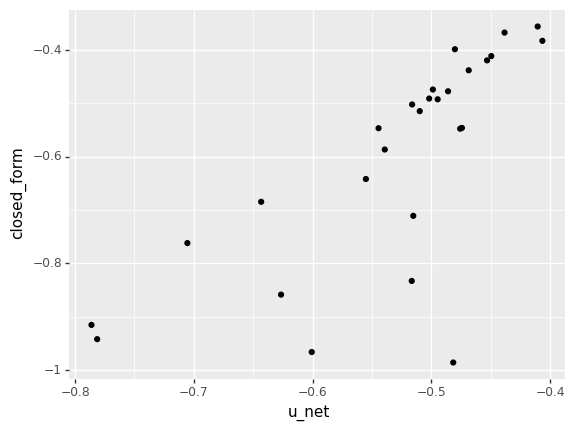

<ggplot: (8739347655813)>


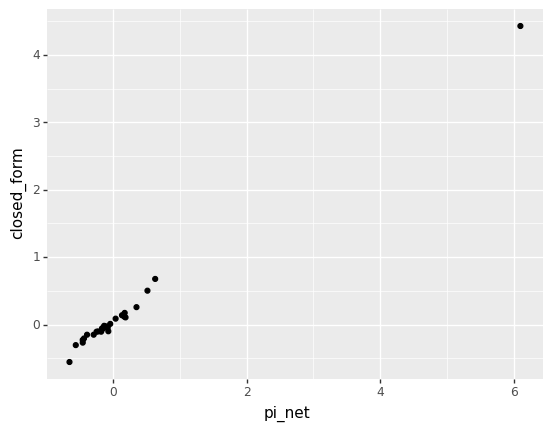

<ggplot: (8739364709693)>
Epoch 26999 - lr 0.0005 - key loss: 0.00549 - eqWeighted loss: 0.00549 - L1 loss 0.00549 - Max Loss 0.00305
internal loss: tensor(0.0030, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0024, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0698, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.0727, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.8261, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0129, device='cuda:0') max abs d2u_dx2: tensor(0.3210, device='cuda:0') min abs d2u_dx2: tensor(0.0041, device='cuda:0')
mean du_dx: tensor(0.1874, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4916, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0026, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0158, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0380, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(8.4500e

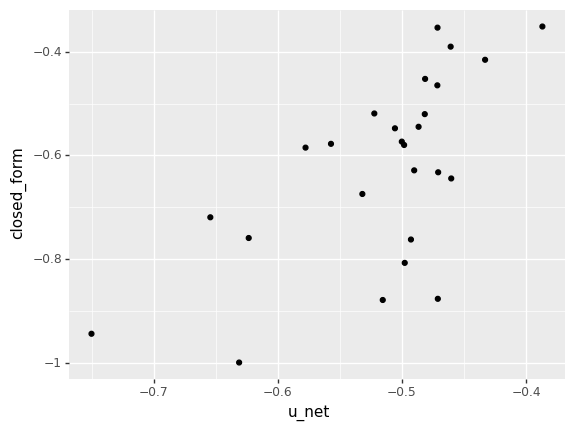

<ggplot: (8739344666765)>


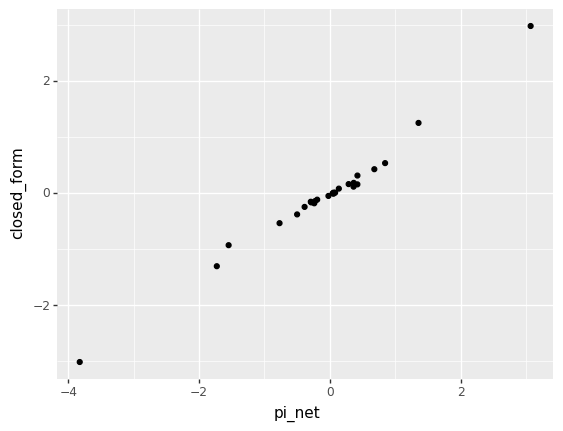

<ggplot: (8739348006453)>
Epoch 27199 - lr 0.0005 - key loss: 0.00364 - eqWeighted loss: 0.00364 - L1 loss 0.00364 - Max Loss 0.00314
internal loss: tensor(0.0031, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0534, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(5.8751, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.8426, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.1205, device='cuda:0') max abs d2u_dx2: tensor(0.3975, device='cuda:0') min abs d2u_dx2: tensor(0.0020, device='cuda:0')
mean du_dx: tensor(0.1392, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4136, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0060, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0118, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0520, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0007, 

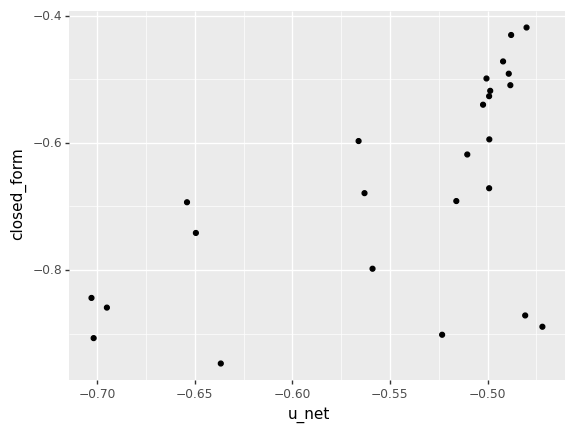

<ggplot: (8739364270461)>


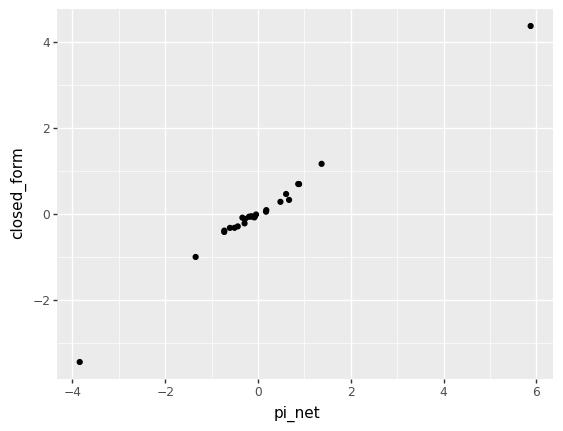

<ggplot: (8739364270565)>
Epoch 27399 - lr 0.0005 - key loss: 0.00508 - eqWeighted loss: 0.00508 - L1 loss 0.00508 - Max Loss 0.00265
internal loss: tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0024, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.3042, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.3261, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.0045, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0738, device='cuda:0') max abs d2u_dx2: tensor(0.4333, device='cuda:0') min abs d2u_dx2: tensor(0.0118, device='cuda:0')
mean du_dx: tensor(0.1623, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4050, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0003, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0118, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0398, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0005,

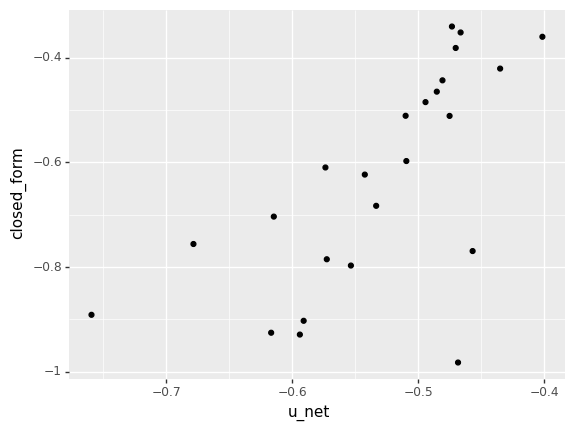

<ggplot: (8739339257477)>


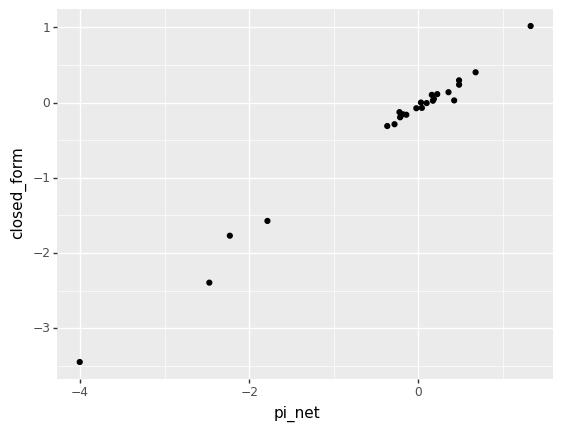

<ggplot: (8739347648949)>
Epoch 27599 - lr 0.0005 - key loss: 0.00311 - eqWeighted loss: 0.00311 - L1 loss 0.00311 - Max Loss 0.00211
internal loss: tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2295, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.0348, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.2504, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0321, device='cuda:0') max abs d2u_dx2: tensor(0.3217, device='cuda:0') min abs d2u_dx2: tensor(0.0010, device='cuda:0')
mean du_dx: tensor(0.1513, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.4283, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0004, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0142, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0732, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0004, 

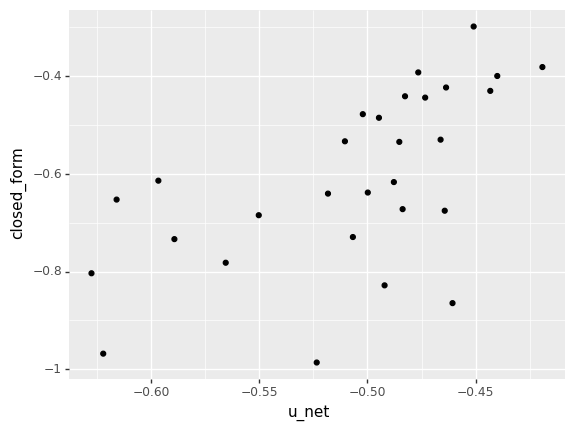

<ggplot: (8739336266181)>


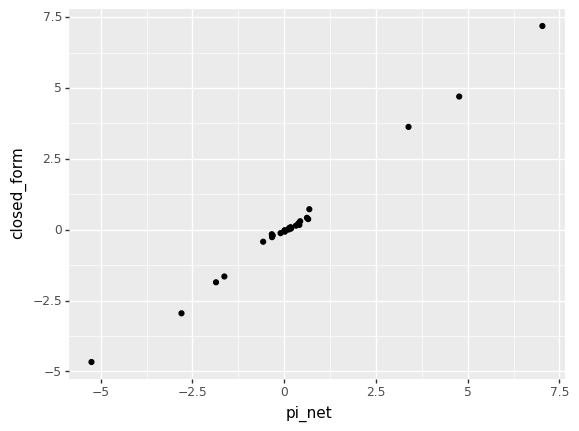

<ggplot: (8739339249257)>
Epoch 27799 - lr 0.0005 - key loss: 0.005 - eqWeighted loss: 0.005 - L1 loss 0.005 - Max Loss 0.00367
internal loss: tensor(0.0037, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.0761, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.3602, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.4175, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0941, device='cuda:0') max abs d2u_dx2: tensor(0.4218, device='cuda:0') min abs d2u_dx2: tensor(0.0016, device='cuda:0')
mean du_dx: tensor(0.1262, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3982, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0038, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0105, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0511, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0004, device

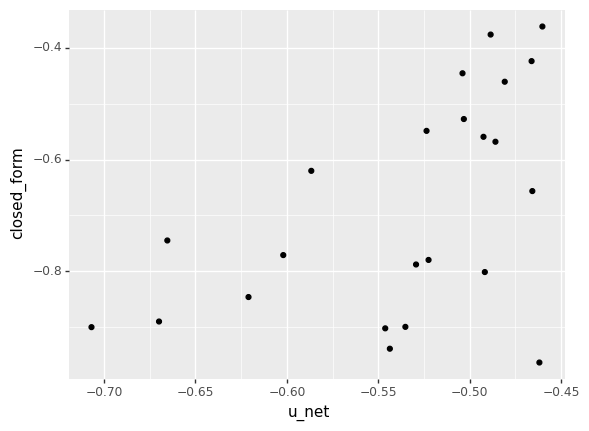

<ggplot: (8739339257457)>


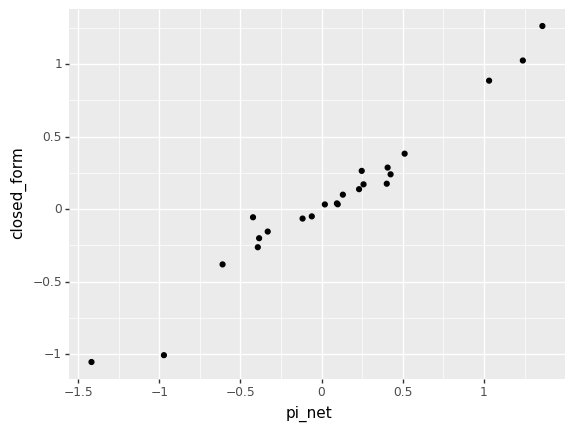

<ggplot: (8739344664909)>
Epoch 27999 - lr 0.0005 - key loss: 0.00349 - eqWeighted loss: 0.00349 - L1 loss 0.00349 - Max Loss 0.00284
internal loss: tensor(0.0028, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.8088, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.7737, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-9.0548, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0799, device='cuda:0') max abs d2u_dx2: tensor(0.2884, device='cuda:0') min abs d2u_dx2: tensor(0.0093, device='cuda:0')
mean du_dx: tensor(0.1436, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3955, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0006, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0114, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0656, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0001,

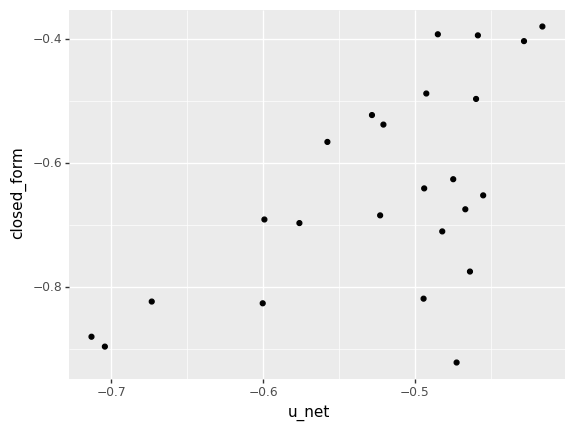

<ggplot: (8739330833037)>


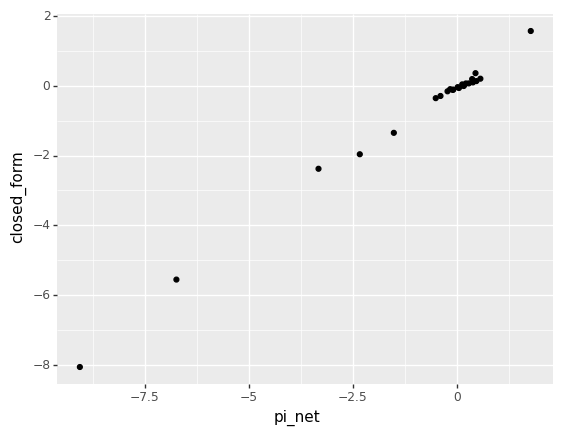

<ggplot: (8739336273797)>
Epoch 28199 - lr 0.0005 - key loss: 0.00378 - eqWeighted loss: 0.00378 - L1 loss 0.00378 - Max Loss 0.00256
internal loss: tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.3834, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(1.7690, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-9.2399, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0645, device='cuda:0') max abs d2u_dx2: tensor(0.2258, device='cuda:0') min abs d2u_dx2: tensor(0.0019, device='cuda:0')
mean du_dx: tensor(0.1147, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3815, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0021, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0101, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0521, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0010,

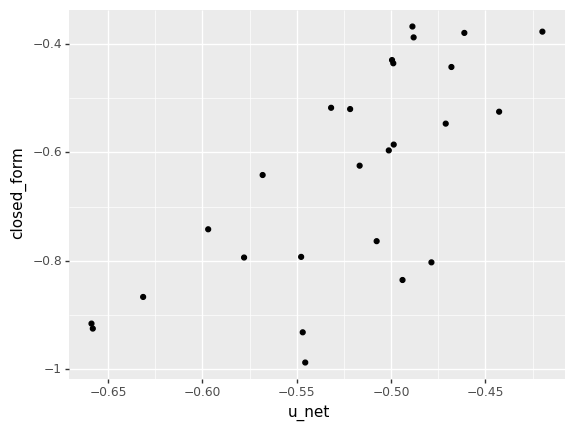

<ggplot: (8739330495569)>


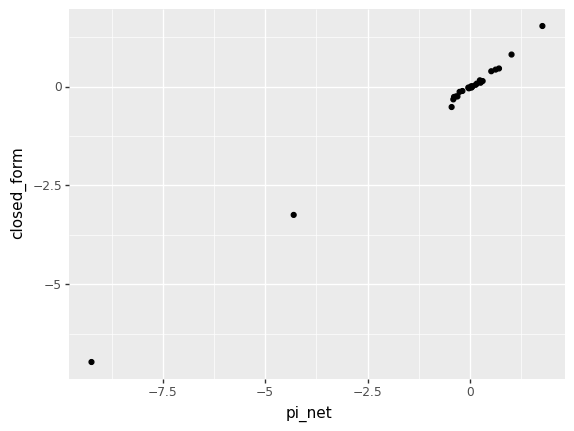

<ggplot: (8739356395093)>
Epoch 28399 - lr 0.0005 - key loss: 0.00339 - eqWeighted loss: 0.00339 - L1 loss 0.00339 - Max Loss 0.00173
internal loss: tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.1336, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(10.0479, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-13.2586, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0896, device='cuda:0') max abs d2u_dx2: tensor(0.3832, device='cuda:0') min abs d2u_dx2: tensor(0.0031, device='cuda:0')
mean du_dx: tensor(0.0961, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.2984, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0015, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0102, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0459, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0002

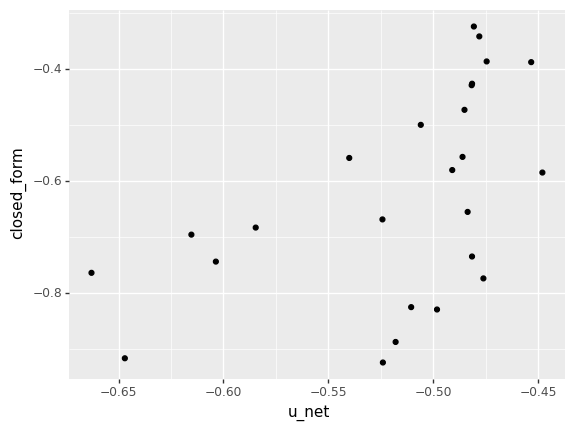

<ggplot: (8739330841513)>


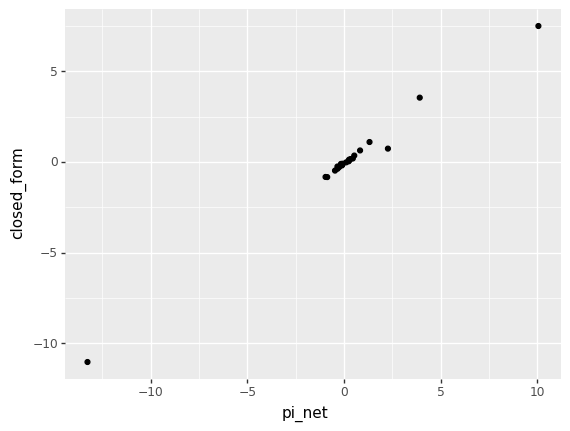

<ggplot: (8739330841429)>
Epoch 28599 - lr 0.0005 - key loss: 0.00347 - eqWeighted loss: 0.00347 - L1 loss 0.00347 - Max Loss 0.00188
internal loss: tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.0915, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(4.0723, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-3.5604, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0781, device='cuda:0') max abs d2u_dx2: tensor(0.2827, device='cuda:0') min abs d2u_dx2: tensor(0.0036, device='cuda:0')
mean du_dx: tensor(0.1180, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3375, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0025, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0094, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0552, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003,

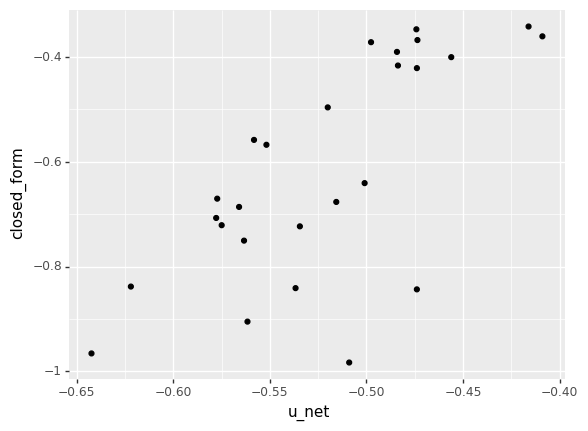

<ggplot: (8739322652109)>


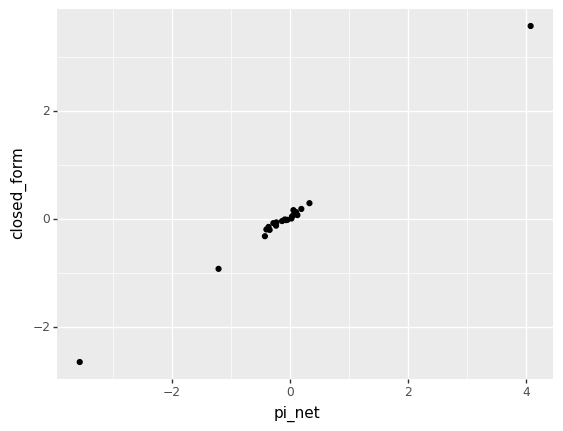

<ggplot: (8739339080789)>
Epoch 28799 - lr 0.0005 - key loss: 0.00382 - eqWeighted loss: 0.00382 - L1 loss 0.00382 - Max Loss 0.00212
internal loss: tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2128, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.4205, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-1.9242, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0738, device='cuda:0') max abs d2u_dx2: tensor(0.3341, device='cuda:0') min abs d2u_dx2: tensor(0.0024, device='cuda:0')
mean du_dx: tensor(0.1018, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3176, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0034, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0087, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0378, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(1.8314e-

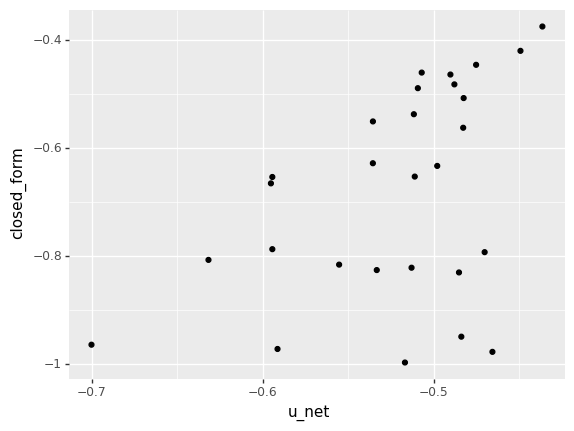

<ggplot: (8739322037473)>


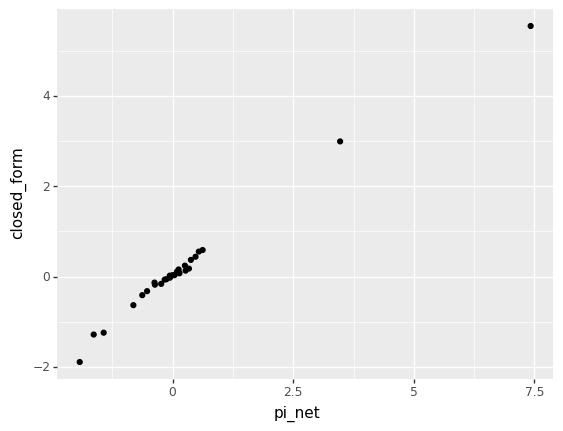

<ggplot: (8739322283089)>
Epoch 28999 - lr 0.0005 - key loss: 0.00281 - eqWeighted loss: 0.00281 - L1 loss 0.00281 - Max Loss 0.00158
internal loss: tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2969, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.1514, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-5.7471, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0555, device='cuda:0') max abs d2u_dx2: tensor(0.2374, device='cuda:0') min abs d2u_dx2: tensor(0.0015, device='cuda:0')
mean du_dx: tensor(0.0913, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3227, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0002, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0089, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0376, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0001, 

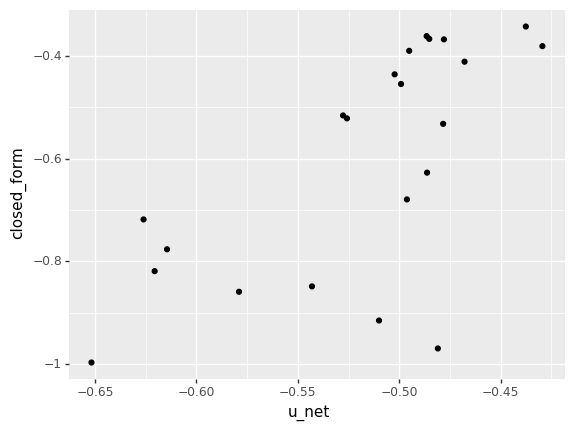

<ggplot: (8739316822193)>


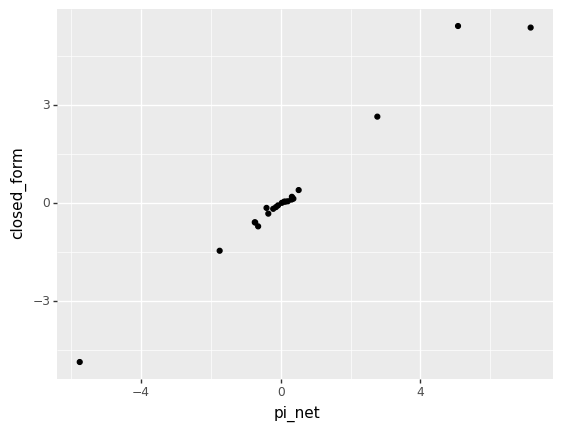

<ggplot: (8739322283017)>
Epoch 29199 - lr 0.0005 - key loss: 0.00342 - eqWeighted loss: 0.00342 - L1 loss 0.00342 - Max Loss 0.00269
internal loss: tensor(0.0027, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0007, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2007, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.4014, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.6240, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0709, device='cuda:0') max abs d2u_dx2: tensor(0.2676, device='cuda:0') min abs d2u_dx2: tensor(0.0094, device='cuda:0')
mean du_dx: tensor(0.1157, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.3410, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0050, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0081, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0401, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(8.1279e-

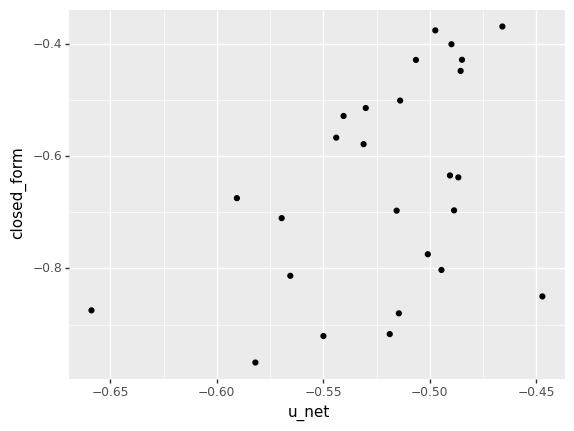

<ggplot: (8739331113865)>


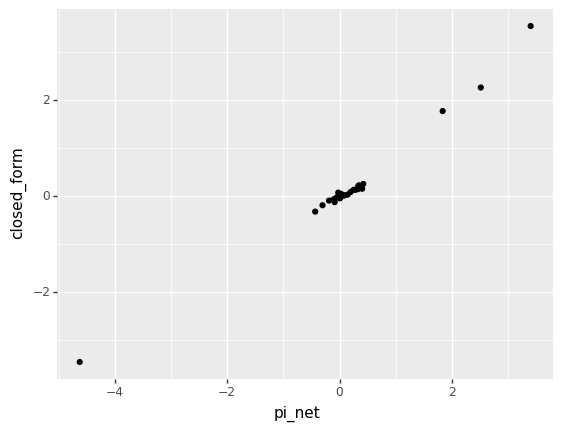

<ggplot: (8739322259601)>
Epoch 29399 - lr 0.0005 - key loss: 0.00334 - eqWeighted loss: 0.00334 - L1 loss 0.00334 - Max Loss 0.00232
internal loss: tensor(0.0023, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(0.2417, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(7.2609, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.1080, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0538, device='cuda:0') max abs d2u_dx2: tensor(0.1819, device='cuda:0') min abs d2u_dx2: tensor(0.0084, device='cuda:0')
mean du_dx: tensor(0.0633, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.2749, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(9.2771e-05, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0060, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0373, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.00

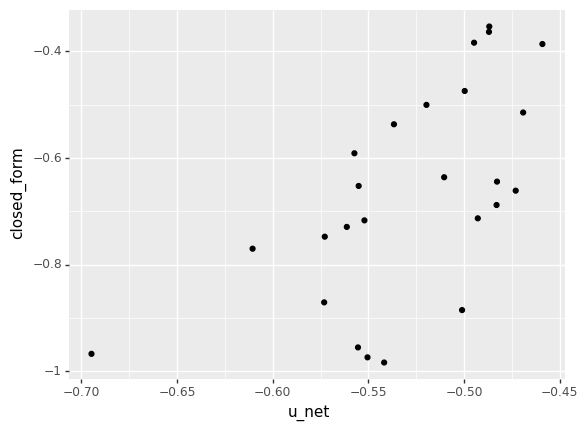

<ggplot: (8739311100277)>


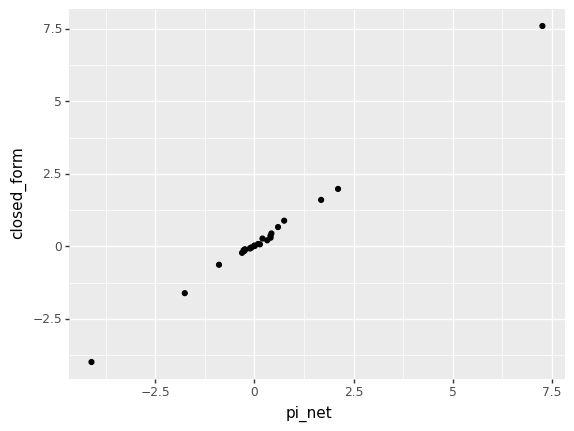

<ggplot: (8739322645801)>
Epoch 29599 - lr 0.0005 - key loss: 0.00287 - eqWeighted loss: 0.00287 - L1 loss 0.00287 - Max Loss 0.00154
internal loss: tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) terminal loss: tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>)
mean pi tensor(-0.1940, device='cuda:0', grad_fn=<MeanBackward0>) max pi tensor(3.6660, device='cuda:0', grad_fn=<MaxBackward1>) min pi tensor(-4.6498, device='cuda:0', grad_fn=<MinBackward1>)
mean d2u_dx2: tensor(0.0548, device='cuda:0') max abs d2u_dx2: tensor(0.2729, device='cuda:0') min abs d2u_dx2: tensor(0.0039, device='cuda:0')
mean du_dx: tensor(0.0900, device='cuda:0', grad_fn=<MeanBackward0>) max abs du_dx: tensor(0.2992, device='cuda:0', grad_fn=<MaxBackward1>) min abs du_dx: tensor(0.0020, device='cuda:0', grad_fn=<MinBackward1>)
mean du_dt: tensor(-0.0071, device='cuda:0', grad_fn=<MeanBackward0>) max abs d2u_dx2: tensor(0.0215, device='cuda:0', grad_fn=<MaxBackward1>) min abs d2u_dx2: tensor(0.0003,

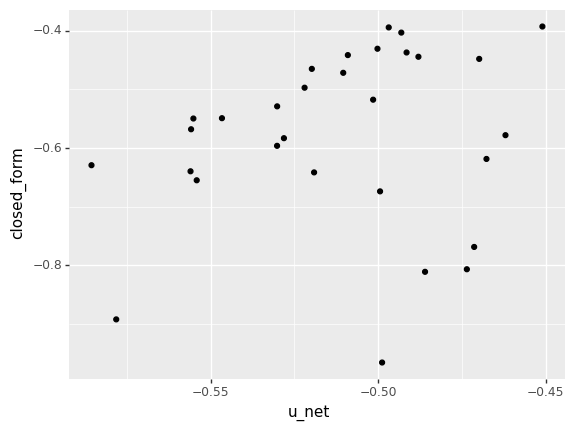

<ggplot: (8739308425037)>


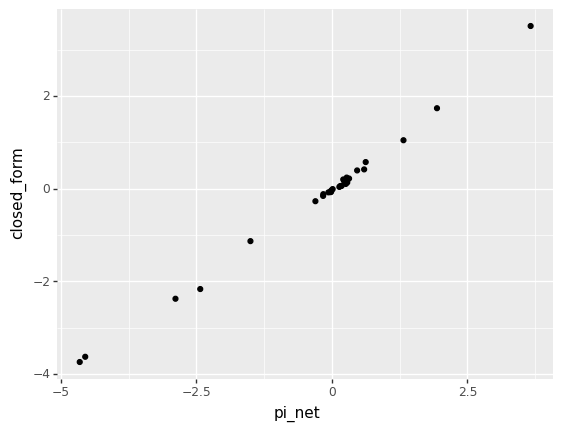

<ggplot: (8739316822021)>


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'sc
sample_method= "U"
lr = 0.0005
lr_for_pi = 0.0001
max_pi_epochs = 4 # has to be low!!!

u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net.to(torch.device("cuda:0")) 

pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net.to(torch.device("cuda:0")) 

pi_net_target = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10  )
pi_net_target.to(torch.device("cuda:0")) 
mequation = MertonEquation(u_net, pi_net, pi_net_target, max_pi_epochs, lr_for_pi)
mequation.adapt_pi_epochs = True

trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE = 2**5 , debug = False )
trainMertonAlloc.hook_interval = 200
trainMertonAlloc.use_early_stop = False
trainMertonAlloc.early_stop_patience = 1000

trainMertonAlloc.train(epoch = 30000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, key_loss_func=torch.abs)

List of params for successfull run



*   Loss = L1
*   Util Net + piNet: depth = 3, NN= 50
*   lr = 0.005
*   lr_for_pi = 0.002
*   max_pi_epochs = 5
*   trainMertonAlloc.use_early_stop = False
*   epoch = 6100
*   loss weights = 1\*intC + 1\*terminal







In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=2000, to_cpu=False)
mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
internal_sample = internal_sample[mask.reshape(-1),:]
# time, wealth, mu, r, sigma
time = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

In [ ]:
# closed form value function
def Htx(x, gamma=1):
  #  wealth * gamma * exp(r*(1-t))
  part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1)*(1.0 - x[:,0].reshape(-1,1)))
  
  #  0.5*(1-t)*[(mu - r)/sigma]^2
  part_b = 0.5*(1.0 - x[:,0].reshape(-1,1))* ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 

  return -1.0*torch.exp(-part_a - part_b)

In [ ]:
def Htx(x, gamma=1):
  #  wealth * gamma * exp(r*(1-t))
  part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1)*(1.0 - x[:,0].reshape(-1,1)))
  
  #  0.5*(1-t)*[(mu - r)/sigma]^2
  part_b = 0.5*(1.0 - x[:,0].reshape(-1,1))* ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 

  return -1.0*torch.exp(-part_a - part_b)
  
# plot the fitted value function vs the closed form (ideally straight line...)
u_internal_sample = torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1)
u_internal_sample = internal_sample

u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
g = ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
mequation = MertonEquation(MertonUtilityNet( NL = 1 , NN = 3 ), MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 100, depth=5 ), 1, 10000.0)
# val_sample_to_use = tuple([ x.cpu().detach() for x in mequation.sample(sample_method_X="U", size=1) ] )
val_sample_to_use = mequation.sample(sample_method_X="U", size=1) 
# # gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   
val_sample_to_use[0][0,0] = 0.0
val_sample_to_use[0][0,2] = 0.05
val_sample_to_use[0][0,3] = 0.02
val_sample_to_use[0][0,4] = 0.25

In [ ]:
import torch

def u(q):
  x = q[:,1]
  y = q[:, 0]
  return x**2 + y**2
x = torch.randn(3, requires_grad=True)
t = torch.randn(3, requires_grad=True)
u_val = u(torch.cat((x, t), axis=1))

print(x,t,u_val)
print(torch.cat((t,x)))
# 1st derivatives
dt = torch.autograd.grad(u_val, x, grad_outputs=torch.ones_like(u_val), create_graph=True, allow_unused=True)
print(dt[0])
dt = torch.autograd.grad(u_val.sum(), torch.cat((t,x)), create_graph=True)
print(dt[0])
dx = torch.autograd.grad(u_val.sum(), x, create_graph=True)[0]

# 2nd derivatives (higher orders require `create_graph=True`)
ddx = torch.autograd.grad(dx.sum(), x)[0]
ddx

In [ ]:
!nvidia-smi